# Attribute Information
* ***id: unique identifier***
* ***gender: "Male", "Female" or "Other"***
* ***age: age of the patient***
* ***hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension***
* ***heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease***
* ***ever_married: "No" or "Yes"***
* ***work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"***
* ***Residence_type: "Rural" or "Urban"***
* ***avg_glucose_level: average glucose level in blood***
* ***bmi: body mass index  => weight in kilograms / the square of height in meters***
* ***smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"***
* ***stroke: 1 if the patient had a stroke or 0 if not***

# Data Analysis and Visualization

In [10]:
import numpy as np  # Importing the NumPy library for numerical operations
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting graphs
import seaborn as sns  # Importing Seaborn for statistical data visualization
import pandas as pd  # Importing Pandas for data manipulation and analysis
from sklearn.model_selection import train_test_split  # Importing function to split data into training and testing sets
from sklearn.preprocessing import StandardScaler  # Importing StandardScaler for feature scaling
from sklearn.ensemble import RandomForestClassifier  # Importing RandomForestClassifier for classification tasks
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay  # Importing metrics for model evaluation
from sklearn.model_selection import cross_val_score  # Importing cross_val_score for cross-validation
from sklearn.model_selection import KFold  # Importing KFold for k-fold cross-validation
from sklearn.neighbors import KNeighborsClassifier  # Importing KNeighborsClassifier for k-NN classification
from sklearn.tree import DecisionTreeClassifier  # Importing DecisionTreeClassifier for decision tree classification
from sklearn import tree  # Importing tree module for decision tree operations
from sklearn.ensemble import RandomForestClassifier  # Importing RandomForestClassifier for classification tasks (redundant, already imported)
from sklearn.naive_bayes import ComplementNB  # Importing ComplementNB for Naive Bayes classification
import warnings  # Importing warnings to manage warning messages
warnings.filterwarnings('ignore')  # Ignoring all warning messages

# Load and Inspect Data


In [11]:
data = pd.read_csv('health_data.csv')

In [12]:
data.head()


Id  gender  age  hypertension  heart_disease ever_married work_type  \
0   1  Female   42             0              0           No   Private   
1   2    Male   31             0              0           No   Private   
2   3    Male   79             0              0          Yes   Private   
3   4  Female   58             0              0          Yes   Private   
4   5    Male   48             1              0          Yes   Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban              98.53  18.5     never smoked       0  
1          Urban              72.60  31.6     never smoked       0  
2          Urban             198.79  24.9     never smoked       0  
3          Urban             105.74  26.8  formerly smoked       0  
4          Urban             173.14  37.0           smokes       0

In [13]:
df= pd.DataFrame(data)

In [14]:
data.drop('Id', axis=1, inplace=True)  # Dropping the 'Id' column from the DataFrame to avoid using it in further analysis or modeling


In [15]:
data.info()  # Displaying a concise summary of the DataFrame, including the number of non-null entries, column names, data types, and memory usage


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             401 non-null    object 
 1   age                401 non-null    int64  
 2   hypertension       401 non-null    int64  
 3   heart_disease      401 non-null    int64  
 4   ever_married       401 non-null    object 
 5   work_type          401 non-null    object 
 6   Residence_type     401 non-null    object 
 7   avg_glucose_level  401 non-null    float64
 8   bmi                401 non-null    float64
 9   smoking_status     401 non-null    object 
 10  stroke             401 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 34.6+ KB


# Exploratory Data Analysis


In [16]:
data.describe()  # Generating descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset’s distribution, excluding NaN values


age  hypertension  heart_disease  avg_glucose_level         bmi  \
count  401.000000    401.000000     401.000000         401.000000  401.000000   
mean    58.723192      0.174564       0.107232         114.734040   30.703242   
std     15.000023      0.380068       0.309794          52.615029    7.031658   
min     31.000000      0.000000       0.000000          55.640000   11.300000   
25%     47.000000      0.000000       0.000000          78.740000   26.100000   
50%     57.000000      0.000000       0.000000          93.210000   29.500000   
75%     74.000000      0.000000       0.000000         129.430000   34.100000   
max     82.000000      1.000000       1.000000         267.610000   61.200000   

           stroke  
count  401.000000  
mean     0.276808  
std      0.447980  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000

# Pair Plot

<Figure size 1000x600 with 0 Axes>

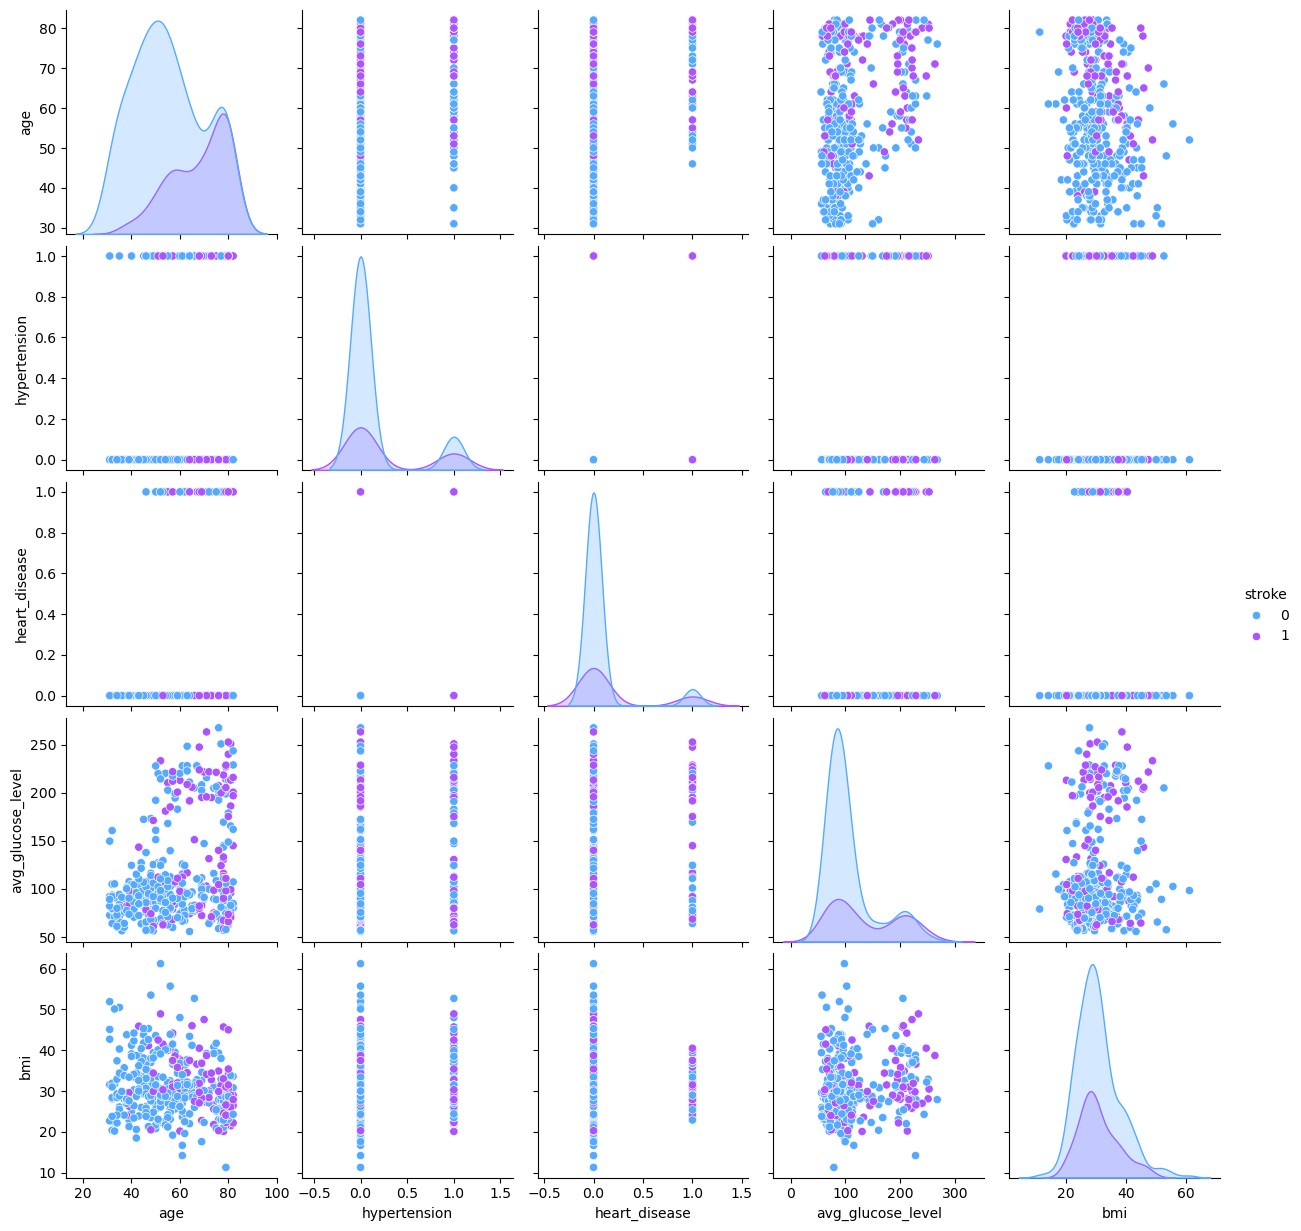

In [17]:
plt.figure(figsize=(10,6))  # Setting the size of the figure to 10 inches by 6 inches
sns.pairplot(data, hue='stroke', palette='cool')  # Creating a pair plot of the dataset, coloring the plots by the 'stroke' column using the 'cool' color palette


# Duplicate and Missing Values

In [18]:
data.duplicated().sum()  # Counting the number of duplicate rows in the DataFrame


3

In [19]:
data.isnull().sum()  # Calculating the number of missing (null) values in each column of the DataFrame


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [20]:
data.dtypes  # Displaying the data types of each column in the DataFrame


gender                object
age                    int64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [21]:
numerical = data.select_dtypes(include=['int64','float64']).columns.tolist()
numerical

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

([<matplotlib.patches.Wedge at 0x1ebefa2d790>,
 [Text(-1.1946980155913998, 0.729860706944806, 'No Hypertension'),
  Text(1.0240268705069142, -0.6255948916669762, 'Hypertension')],
 [Text(-0.7680201528801855, 0.46919616875023235, '82.5%'),
  Text(0.5973490077956999, -0.36493035347240277, '17.5%')])

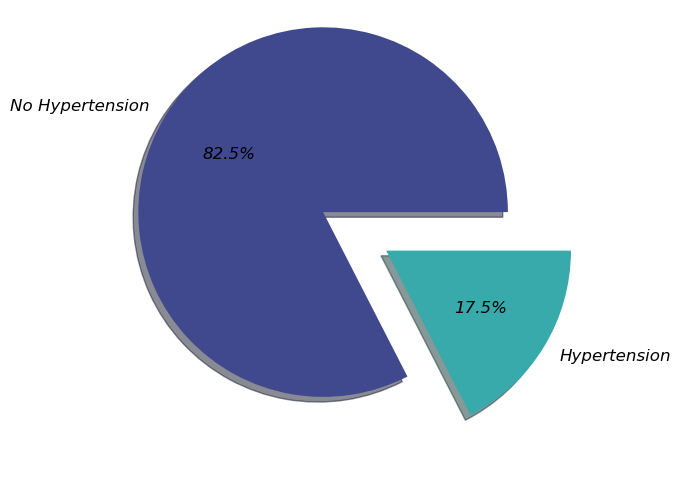

In [13]:
plt.figure(figsize=(10,6))  # Setting the size of the figure to 10 inches by 6 inches
plt.pie(data.hypertension.value_counts(),  # Creating a pie chart using the counts of the 'hypertension' column
        labels=['No Hypertension', 'Hypertension'],  # Setting labels for the pie chart segments
        autopct='%1.1f%%',  # Displaying the percentage of each segment on the pie chart
        colors=sns.color_palette('mako', 2),  # Using the 'mako' color palette from Seaborn for the pie chart segments
        explode=(0.3, 0.1),  # "Exploding" the segments to separate them for better visualization
        shadow=True,  # Adding a shadow to the pie chart for a 3D effect
        textprops={'fontsize': 12, 'style': 'italic'})  # Customizing the font properties of the text in the pie chart


([<matplotlib.patches.Wedge at 0x1ebfaa9df10>,
 [Text(-1.321307241428163, 0.46276038480999926, 'No Heart Disease'),
  Text(1.1325490733655865, -0.3966517318993466, 'Heart Disease')],
 [Text(-0.8494117980609617, 0.2974888188064281, '89.3%'),
  Text(0.6606536261299255, -0.2313801769412855, '10.7%')])

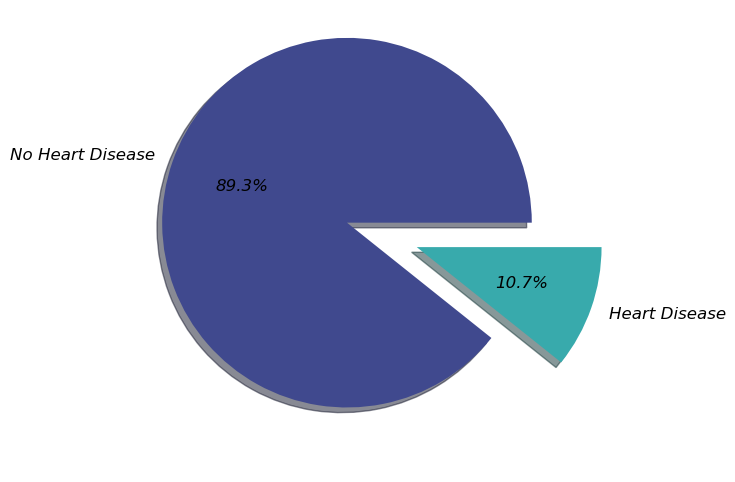

In [14]:
plt.figure(figsize=(10,6))  # Setting the size of the figure to 10 inches by 6 inches
plt.pie(data.heart_disease.value_counts(),  # Creating a pie chart using the counts of the 'heart_disease' column
        labels=['No Heart Disease', 'Heart Disease'],  # Setting labels for the pie chart segments
        autopct='%1.1f%%',  # Displaying the percentage of each segment on the pie chart
        colors=sns.color_palette('mako', 2),  # Using the 'mako' color palette from Seaborn for the pie chart segments
        explode=(0.3, 0.1),  # "Exploding" the segments to separate them for better visualization
        shadow=True,  # Adding a shadow to the pie chart for a 3D effect
        textprops={'fontsize': 12, 'style': 'italic'})  # Customizing the font properties of the text in the pie chart


<Axes: xlabel='avg_glucose_level', ylabel='Count'>

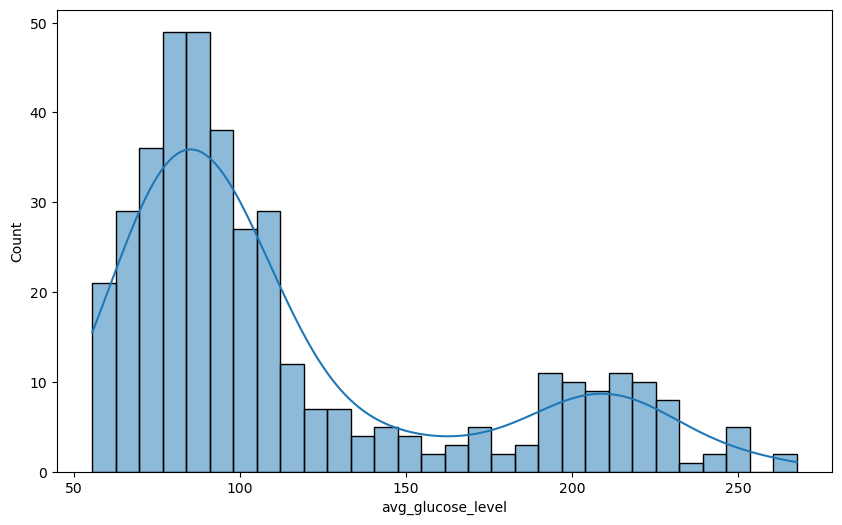

In [15]:
plt.figure(figsize=(10,6))  # Setting the size of the figure to 10 inches by 6 inches
sns.histplot(data.avg_glucose_level, kde=True, bins=30)  # Creating a histogram plot of the 'avg_glucose_level' column with a kernel density estimate and 30 bins


# Categorical Data Visualization

# Function for Plotting

In [16]:
def plot_categorical_data(column_name, color_palette, color1, color2, df):
    """
    Plot bar and pie charts for categorical data.

    Parameters:
    - column_name: Name of the column in the DataFrame to plot.
    - color_palette: Seaborn color palette name or list of colors.
    - color1, color2: Colors for the pie chart segments.
    - df: DataFrame containing the data.

    Returns:
    - None (plots the charts directly).
    """

    plt.figure(figsize=(10, 8))  # Setting the size of the figure
    plt.suptitle(column_name, fontsize=20)  # Adding a title to the figure
    plt.style.use('seaborn')  # Setting the plot style

    # Plotting the bar chart
    plt.subplot(1, 2, 1)
    df[column_name].value_counts().plot(kind='bar', color=sns.color_palette(color_palette))
    plt.title('Bar Chart')

    # Plotting the pie chart
    plt.subplot(1, 2, 2)
    df[column_name].value_counts().plot(kind='pie', autopct="%.2f%%", colors=[color1, color2])
    plt.title('Pie Chart')

    # Adding a white circle in the center of the pie chart
    centre_circle = plt.Circle((0, 0), 0.5, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.show()


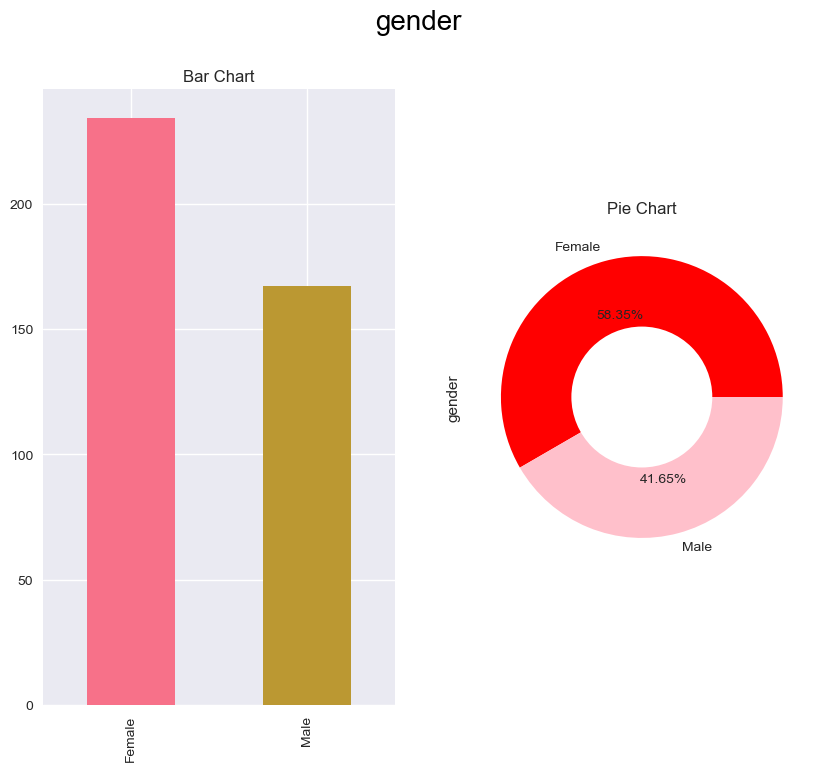

Unique values of Gender:

['Female' 'Male']

----------------------------------------

The count of each value of Gender:

Female    234
Male      167
Name: gender, dtype: int64


In [17]:

# Example usage
plot_categorical_data("gender", "husl", "red", "pink", df)

# Print additional information
print("Unique values of Gender:\n")
print(df["gender"].unique())
print("\n" + "-"*40)
print("\nThe count of each value of Gender:\n")
print(df["gender"].value_counts())

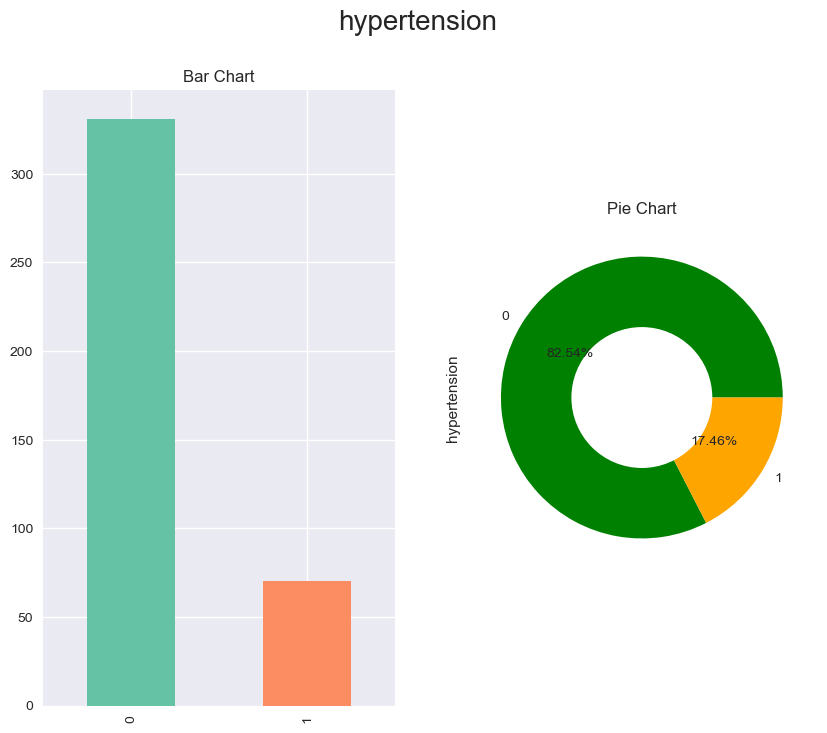

the unique value of Hypertension : 

[0 1]

----------------------------------------
The number of each value of Hypertension : 

0    331
1     70
Name: hypertension, dtype: int64


In [18]:
plot_categorical_data ("hypertension","Set2","green","orange",df)

print("the unique value of Hypertension : ")
print("")
print(df["hypertension"].unique())
print("")
print("-"*40)
print("The number of each value of Hypertension : ")
print("")
print(df["hypertension"].value_counts())

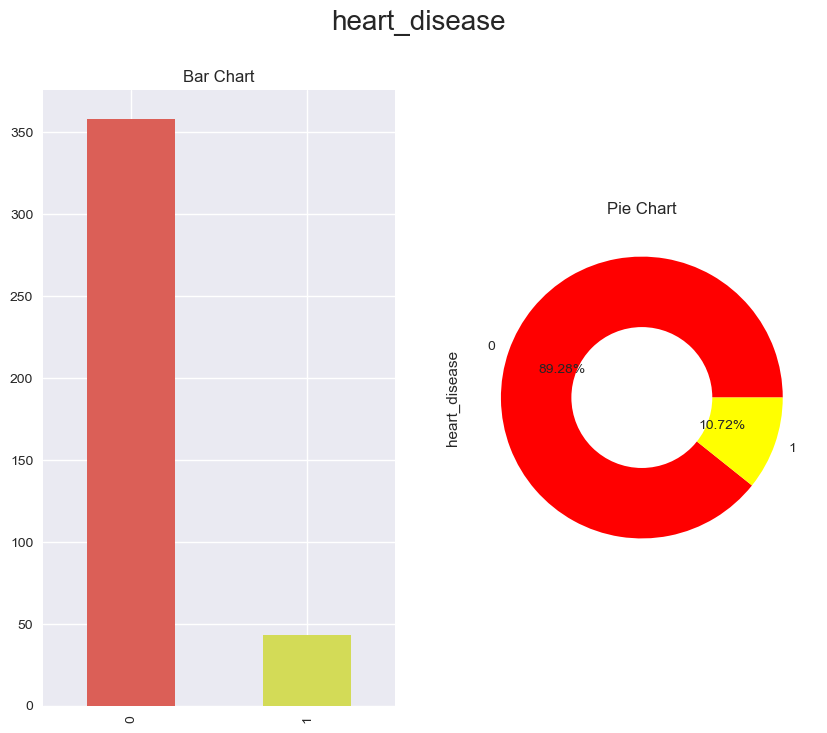

the unique value of Heart Disease : 

[0 1]

----------------------------------------
The number of each value of Heart Disease : 

0    358
1     43
Name: heart_disease, dtype: int64


In [19]:
plot_categorical_data ("heart_disease","hls","red","yellow", df)

print("the unique value of Heart Disease : ")
print("")
print(df["heart_disease"].unique())
print("")
print("-"*40)
print("The number of each value of Heart Disease : ")
print("")
print(df["heart_disease"].value_counts())

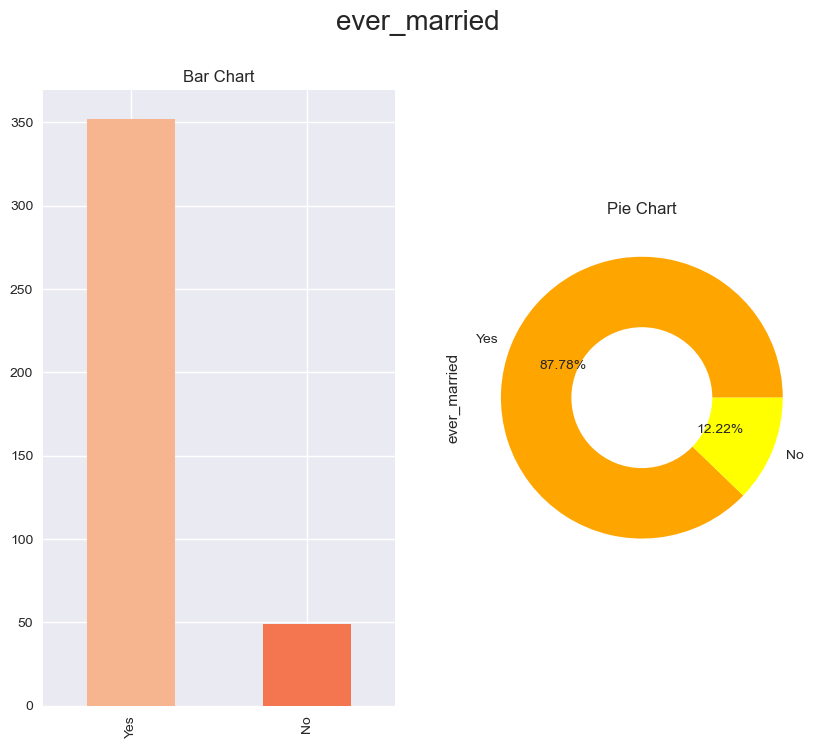

the unique value of Ever_Married : 

['No' 'Yes']

----------------------------------------
The number of each value of Ever_Married : 

Yes    352
No      49
Name: ever_married, dtype: int64


In [20]:
plot_categorical_data ("ever_married","rocket_r","orange","yellow", df)

print("the unique value of Ever_Married : ")
print("")
print(df["ever_married"].unique())
print("")
print("-"*40)
print("The number of each value of Ever_Married : ")
print("")
print(df["ever_married"].value_counts())

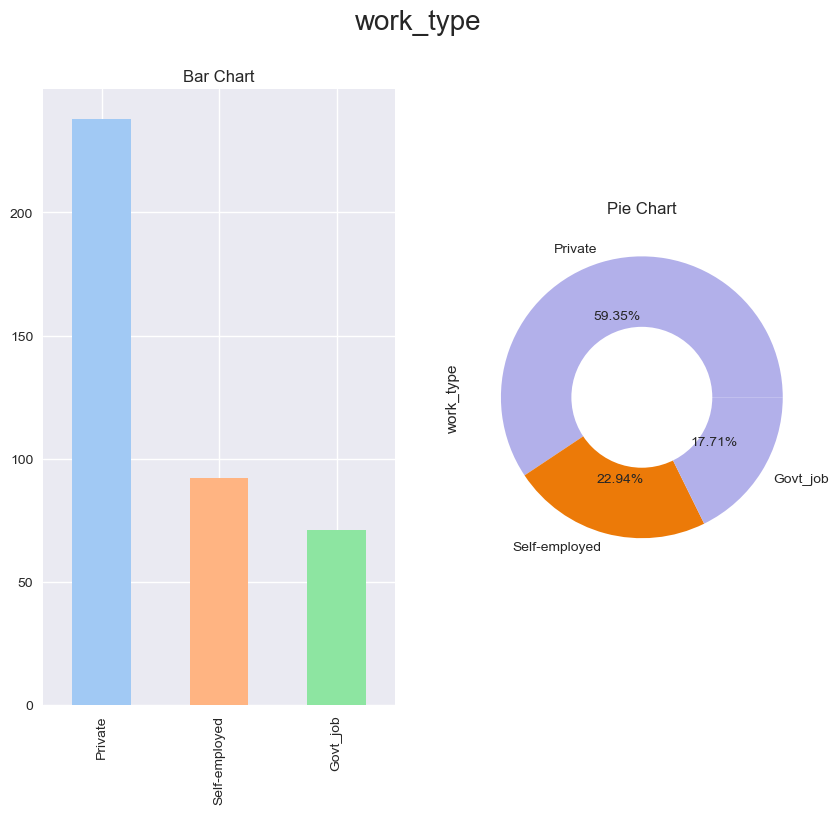

the unique value of Work_Type : 

['Private' 'Self-employed' 'Govt_job']

----------------------------------------
The number of each value of Work_Type : 

Private          238
Self-employed     92
Govt_job          71
Name: work_type, dtype: int64


In [21]:
plot_categorical_data ("work_type","pastel","#B2B0EA","#EC7A08",df)

print("the unique value of Work_Type : ")
print("")
print(df["work_type"].unique())
print("")
print("-"*40)
print("The number of each value of Work_Type : ")
print("")
print(df["work_type"].value_counts())


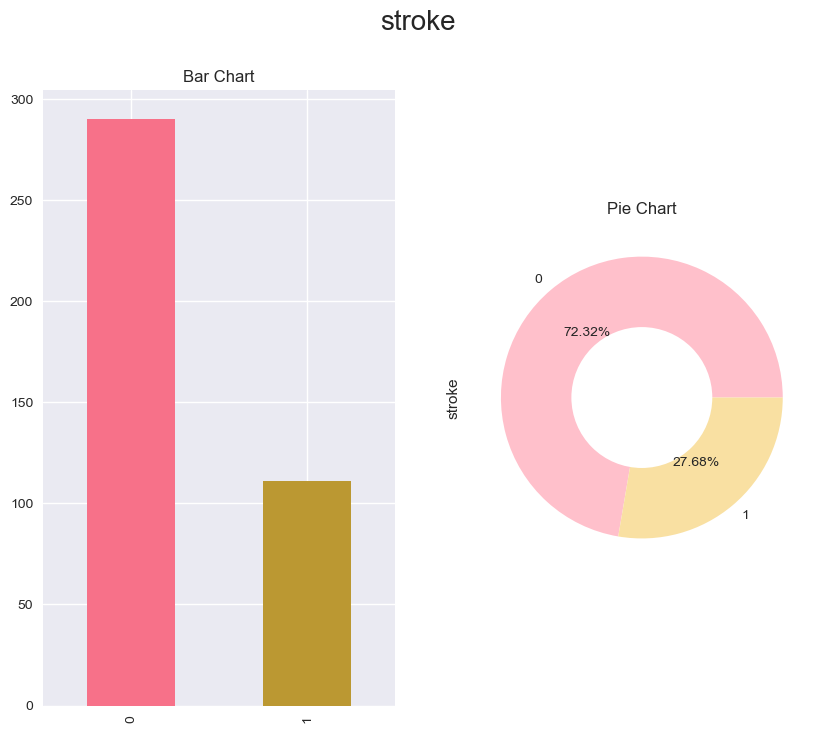

the unique value of Stroke : 

[0 1]

----------------------------------------
The number of each value of Stroke : 

0    290
1    111
Name: stroke, dtype: int64


In [22]:
plot_categorical_data ("stroke","husl","pink","#F9E0A2", df)

print("the unique value of Stroke : ")
print("")
print(df["stroke"].unique())
print("")
print("-"*40)
print("The number of each value of Stroke : ")
print("")
print(df["stroke"].value_counts())

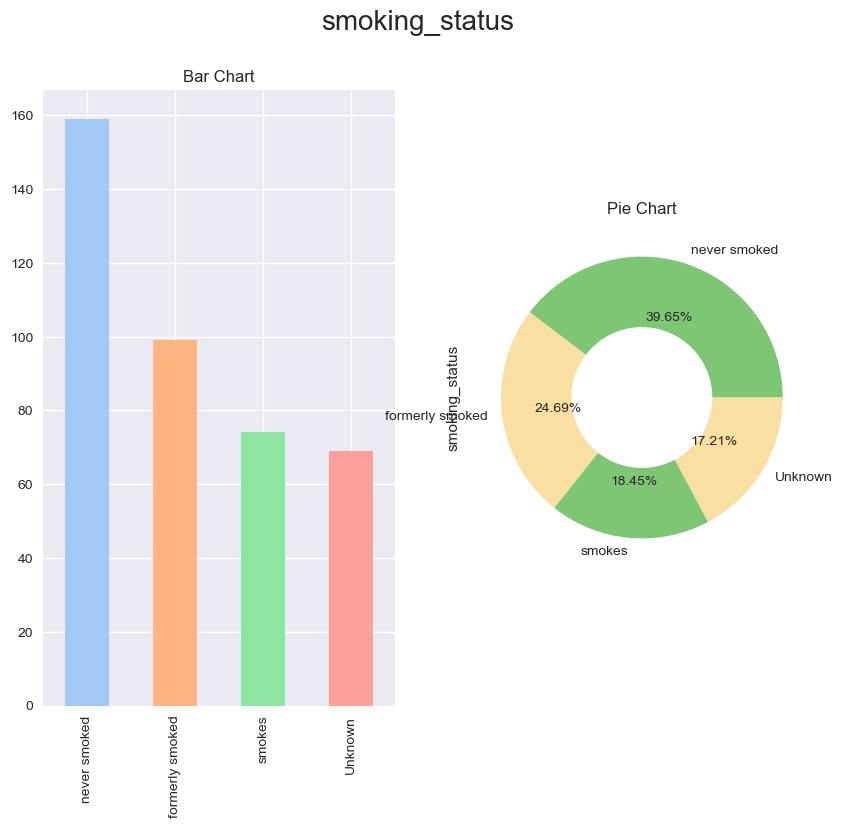

the unique value of Smoking Status : 

['never smoked' 'formerly smoked' 'smokes' 'Unknown']

----------------------------------------
The number of each value of Smoking Status : 

never smoked       159
formerly smoked     99
smokes              74
Unknown             69
Name: smoking_status, dtype: int64


In [23]:
plot_categorical_data ("smoking_status","pastel","#7CC674","#F9E0A2", df)

print("the unique value of Smoking Status : ")
print("")
print(df["smoking_status"].unique())
print("")
print("-"*40)
print("The number of each value of Smoking Status : ")
print("")
print(df["smoking_status"].value_counts())

# Numerical Data Visualization

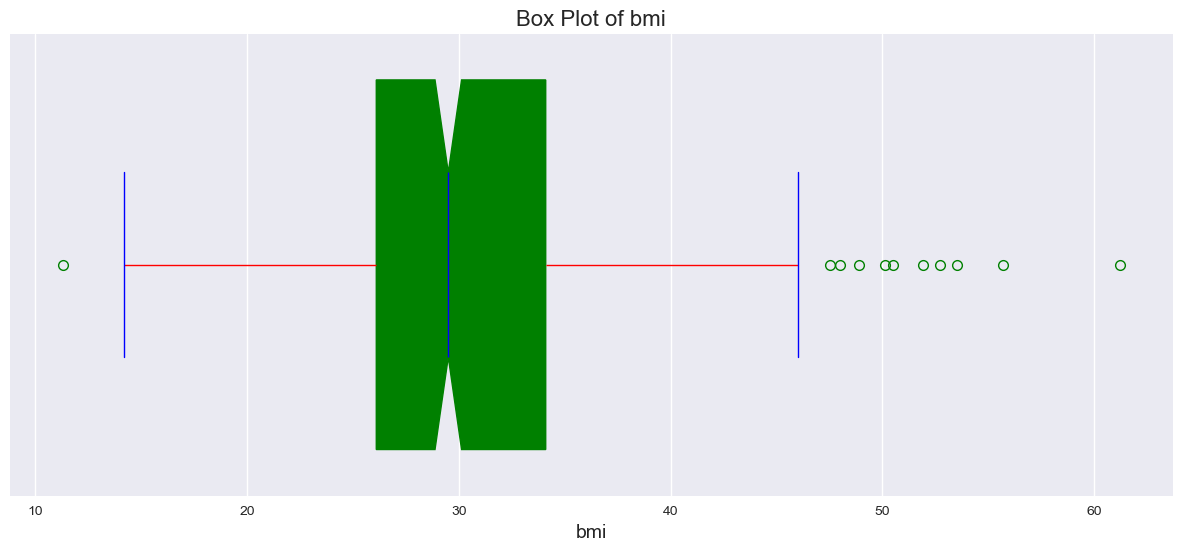

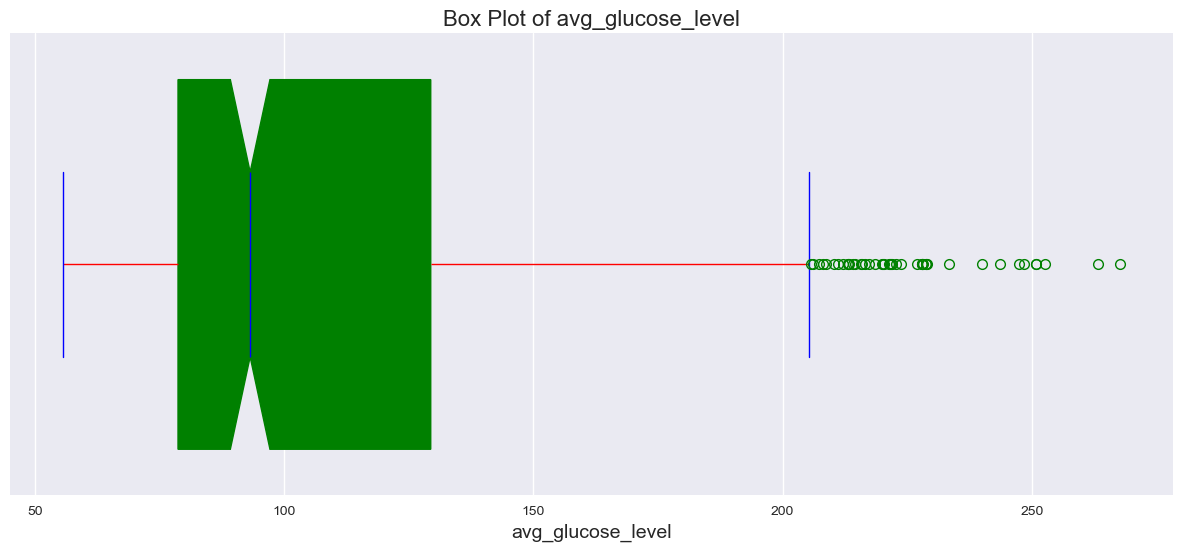

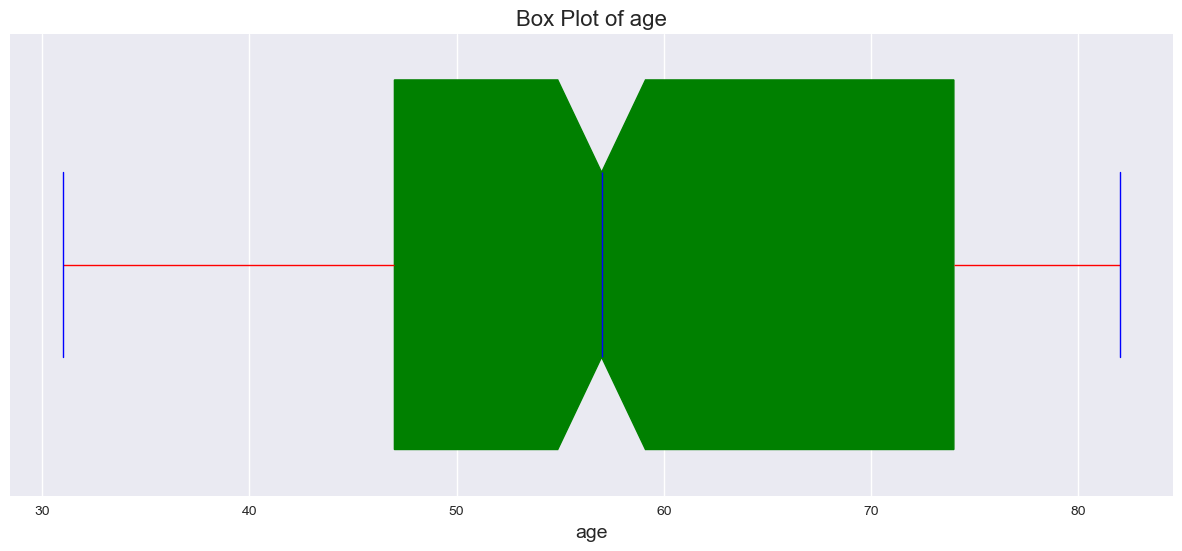

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical variables
Numerical = ['bmi', 'avg_glucose_level', 'age']

# Define colors for box plot components
c1 = "blue"
c2 = "red"
c3 = "green"

# Loop through each numerical variable and create a box plot
for var in Numerical:
    plt.figure(figsize=(15, 6))
    
    # Create box plot using Seaborn
    sns.boxplot(x=var, data=df,
                notch=True,
                boxprops=dict(facecolor=c2, color=c3),
                capprops=dict(color=c1),
                whiskerprops=dict(color=c2),
                flierprops=dict(color=c1, markeredgecolor=c3),
                medianprops=dict(color=c1))
    
    # Set plot title and labels
    plt.title(f'Box Plot of {var}', fontsize=16)
    plt.xlabel(var, fontsize=14)
    
    plt.show()


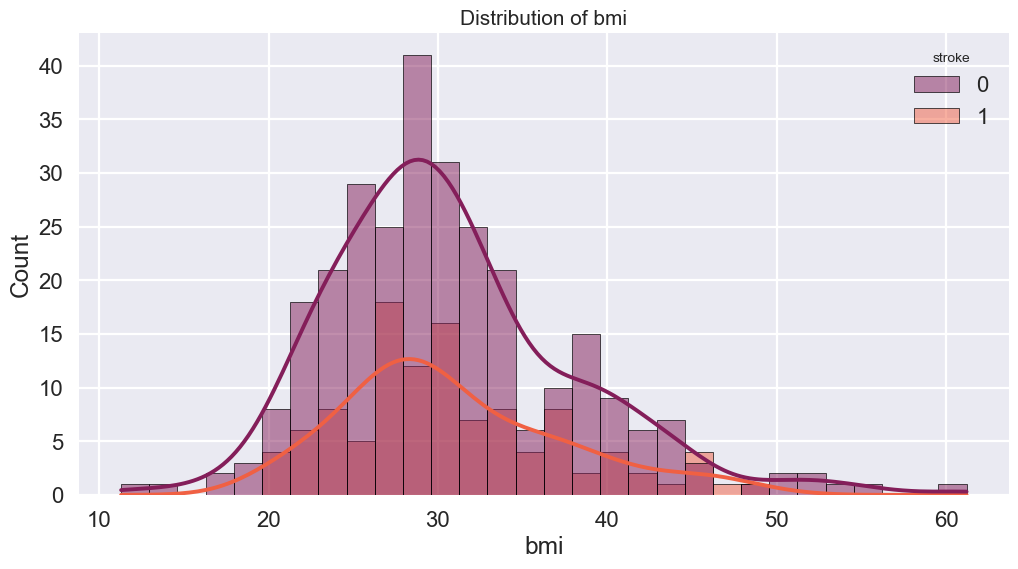

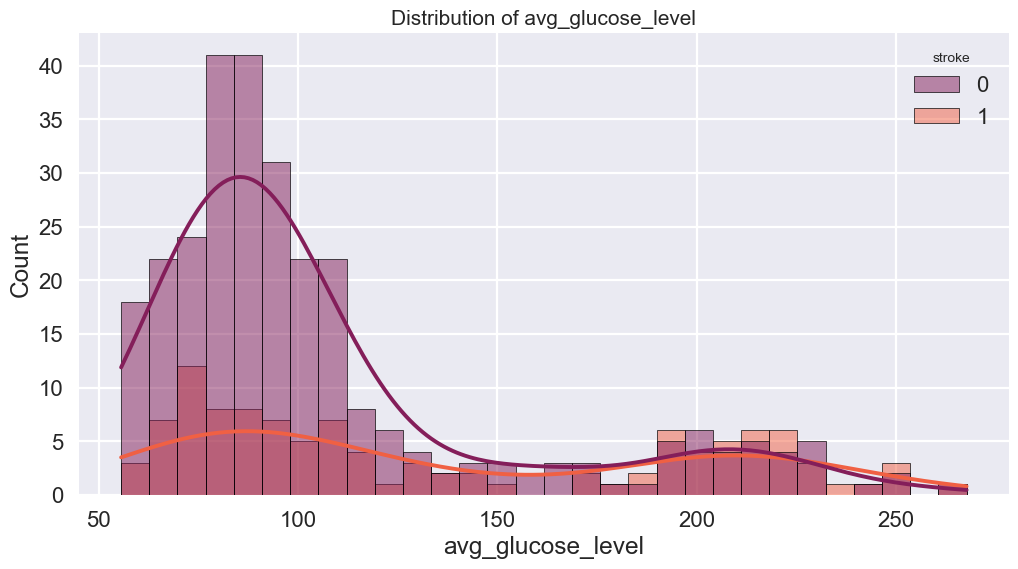

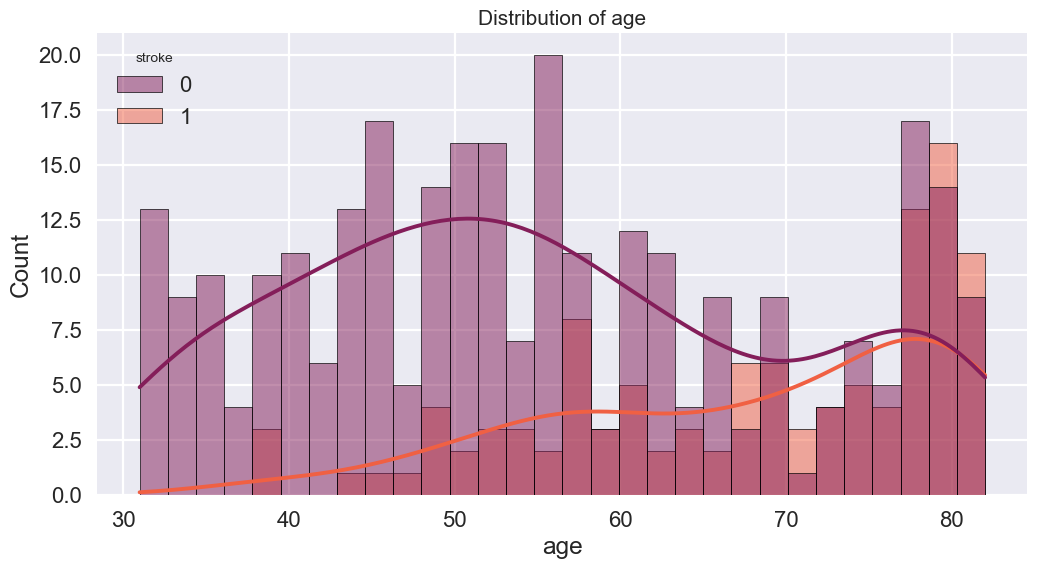

In [25]:
for col in Numerical:
    plt.figure(figsize=(12, 6))
    plt.style.use('seaborn-poster')
    colors_gender = sns.color_palette("rocket", n_colors=len(df['stroke'].unique()))
    sns.histplot(data=df, x=col, kde=True, bins=30,hue="stroke",palette=colors_gender)
    plt.title(f'Distribution of {col}', fontsize =15)
    plt.show()

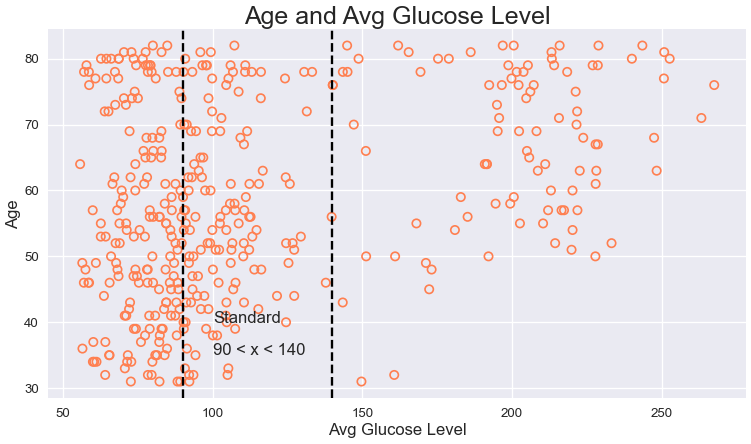

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8), dpi=60)

# Scatter plot
plt.scatter(df["avg_glucose_level"], df["age"], marker="o", s=100, facecolors='none', edgecolors='coral', lw=2)

# Title and labels
plt.title("Age and Avg Glucose Level", fontsize=30)
plt.xlabel("Avg Glucose Level", fontsize=20)
plt.ylabel("Age", fontsize=20)

# Vertical lines and text annotations
plt.axvline(x=90, color='black', linestyle='--')
plt.axvline(x=140, color='black', linestyle='--')
plt.text(100, 40, 'Standard', fontsize=20)
plt.text(100, 35, '90 < x < 140', fontsize=20)

plt.show()


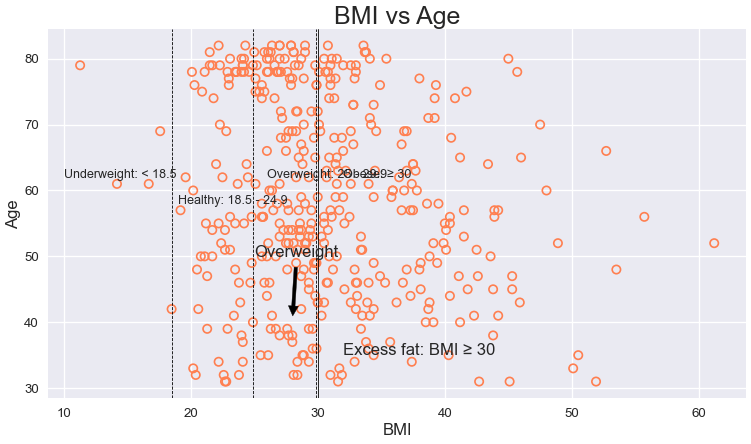

In [27]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(15, 8), dpi=60)
plt.scatter(df["bmi"], df["age"], marker="o", s=100, facecolors='none', edgecolors='coral', lw=2)
plt.title("BMI vs Age", fontsize=30)
plt.xlabel("BMI", fontsize=20)
plt.ylabel("Age", fontsize=20)

# Adding vertical lines for BMI ranges
plt.axvline(x=18.5, color='black', linestyle='--', lw=1)
plt.axvline(x=24.9, color='black', linestyle='--', lw=1)
plt.axvline(x=29.9, color='black', linestyle='--', lw=1)
plt.axvline(x=30, color='black', lw=1)

# Adding annotations for BMI ranges
plt.text(10, 62, 'Underweight: < 18.5', fontsize=15)
plt.text(19, 58, 'Healthy: 18.5 - 24.9', fontsize=15)
plt.text(26, 62, 'Overweight: 25 - 29.9', fontsize=15)
plt.text(32, 62, 'Obese: ≥ 30', fontsize=15)

# Specific annotations and text for clarity
plt.annotate('Overweight', xy=(28, 40), xytext=(25, 50), arrowprops=dict(facecolor='black', shrink=0.1), fontsize=20)
plt.text(32, 35, 'Excess fat: BMI ≥ 30', fontsize=20)

# Display the plot
plt.show()


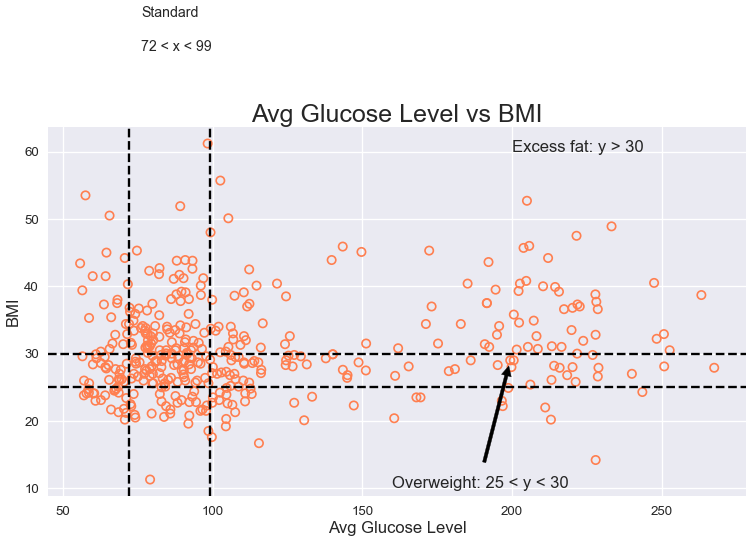

In [28]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(15, 8), dpi=60)
plt.scatter(df["avg_glucose_level"], df["bmi"], marker="o", s=100, facecolors='none', edgecolors='coral', lw=2)
plt.title("Avg Glucose Level vs BMI", fontsize=30)
plt.xlabel("Avg Glucose Level", fontsize=20)
plt.ylabel("BMI", fontsize=20)

# Vertical lines and annotations for Avg Glucose Level ranges
plt.axvline(x=72, color='black', linestyle='--')
plt.axvline(x=99, color='black', linestyle='--')
plt.text(76, 80, 'Standard', fontsize=17)
plt.text(76, 75, '72 < x < 99', fontsize=17)

# Horizontal lines and annotations for BMI ranges
plt.axhline(y=25, color='black', linestyle='--')
plt.axhline(y=30, color='black', linestyle='--')
plt.annotate('Overweight: 25 < y < 30', xy=(200, 30), xytext=(160, 10), arrowprops=dict(facecolor='black', shrink=0.1), fontsize=20)
plt.text(200, 60, 'Excess fat: y > 30', fontsize=20)

# Display the plot
plt.show()


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

def feature_relationship(a, b, c):
    """
    Plots a KDE plot to visualize the relationship between variables in the DataFrame.

    Parameters:
    - a (str): Name of the variable to plot on the x-axis.
    - b (str): Name of the variable to use for coloring different categories.
    - c (str): Name of the variable to create separate plots in columns.

    Returns:
    None
    """
    # Setting the figure size and style
    plt.figure(figsize=(15, 10))
    plt.style.use('seaborn-poster')
    
    # Creating a KDE plot with seaborn displot
    sns.displot(data=df, x=a, hue=b, col=c, kind="kde", fill=True, palette="husl")
    
    # Display the plot
    plt.show()


<Figure size 1500x1000 with 0 Axes>

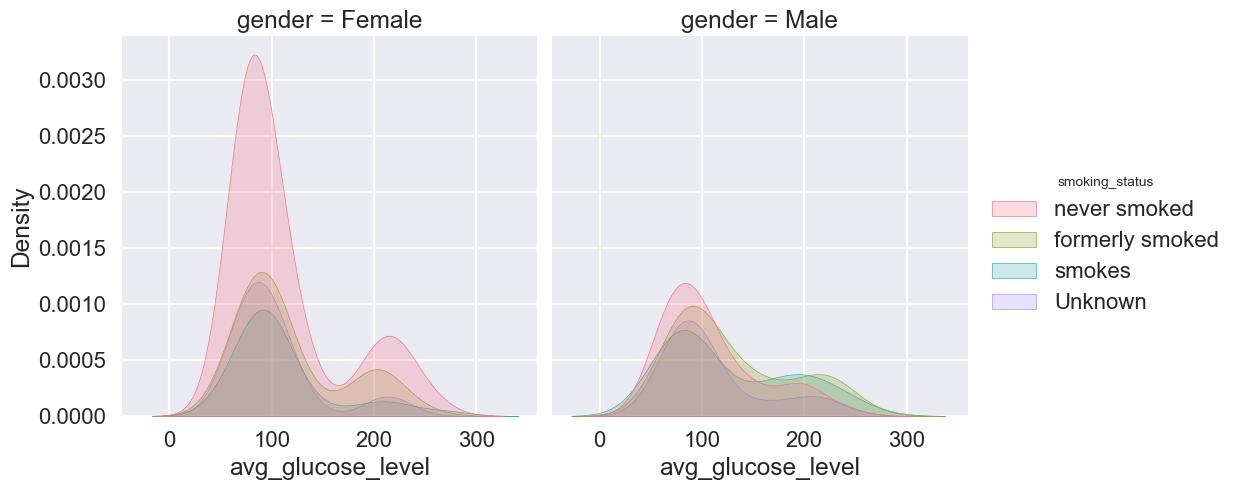

<Figure size 1500x1000 with 0 Axes>

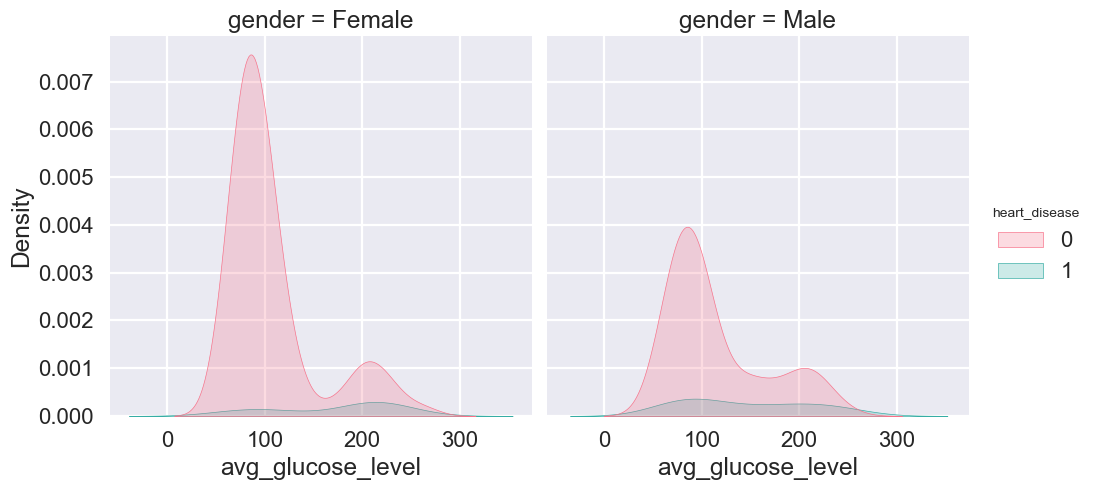

<Figure size 1500x1000 with 0 Axes>

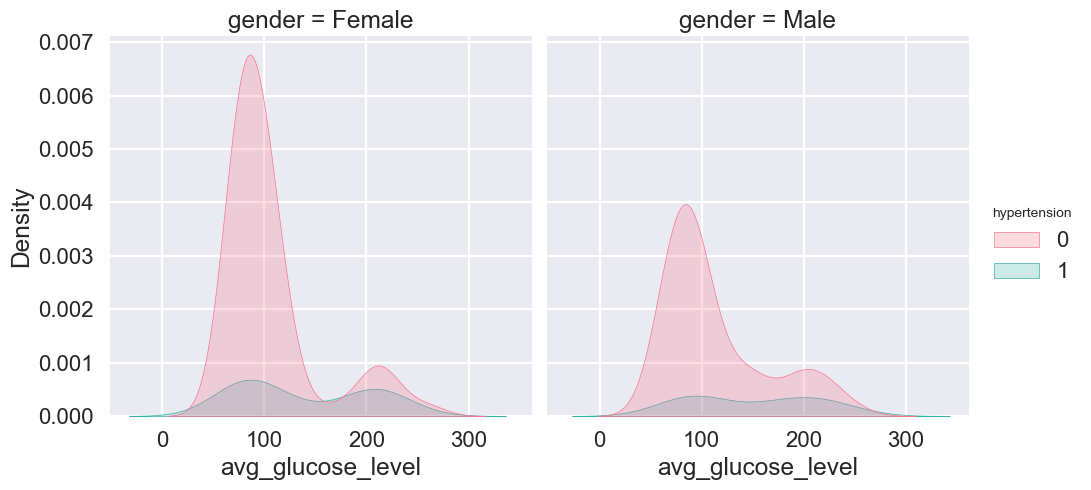

<Figure size 1500x1000 with 0 Axes>

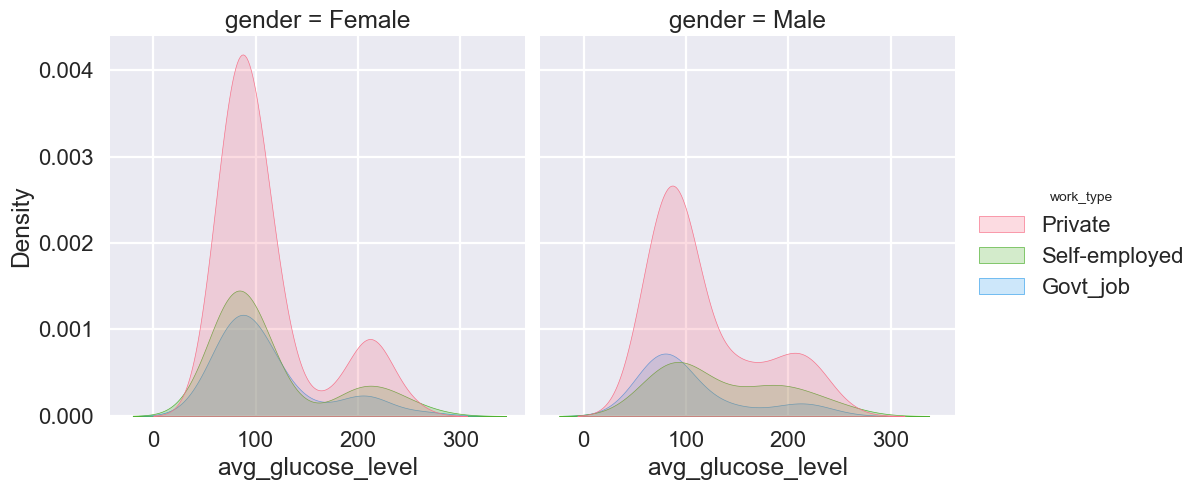

<Figure size 1500x1000 with 0 Axes>

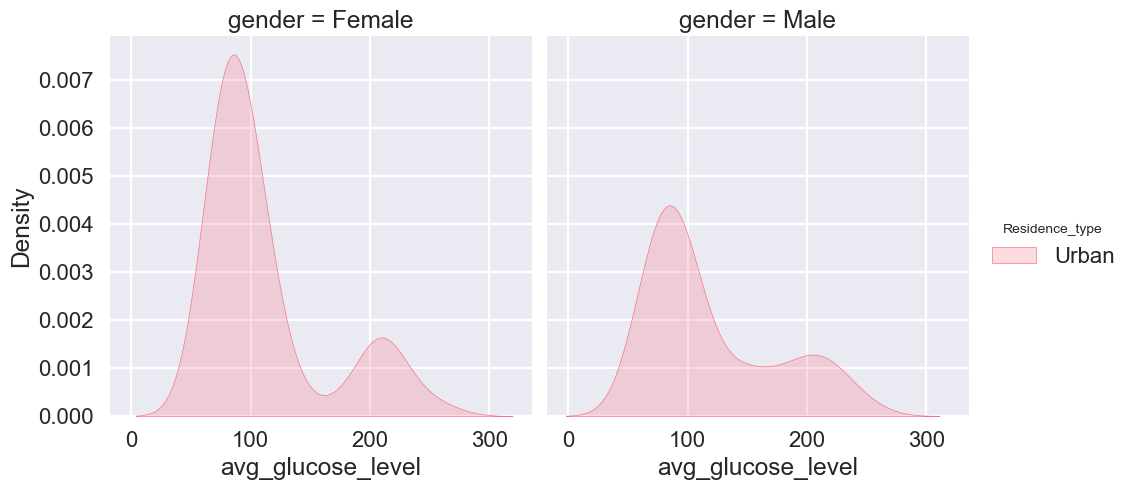

<Figure size 1500x1000 with 0 Axes>

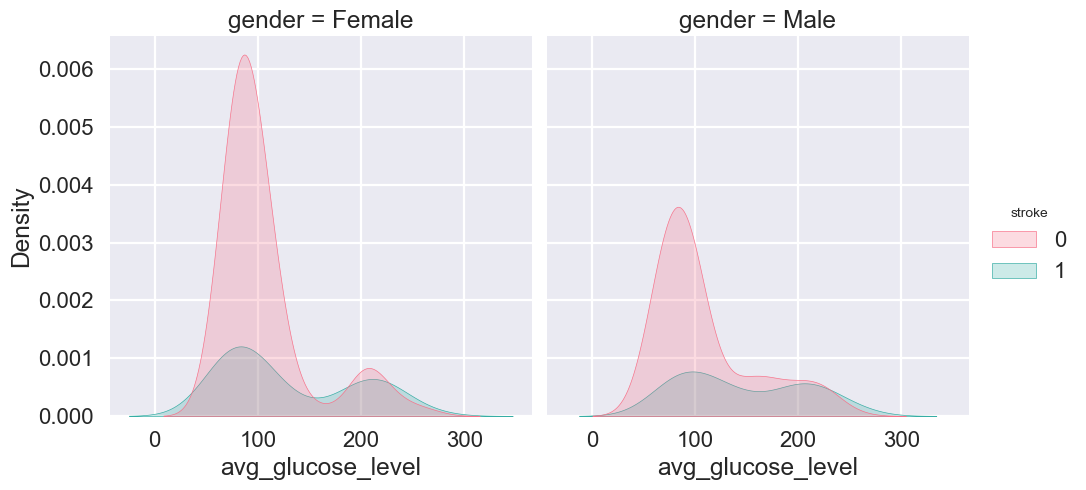

In [30]:
lst1 = ["smoking_status","heart_disease","hypertension","work_type","Residence_type","stroke"]
for i in range (len(lst1)):
    feature_relationship ("avg_glucose_level",lst1[i],"gender")

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

def feature_relationship_bmi(a, b, c):
    """
    Plots a scatter plot to visualize the relationship between two variables with hue representing another variable.

    Parameters:
    - a (str): Name of the variable to plot on the x-axis.
    - b (str): Name of the variable to plot on the y-axis.
    - c (str): Name of the variable to use for coloring different categories (hue).

    Returns:
    None
    """
    # Define colors based on the unique values in the 'gender' column
    colors_gender = sns.color_palette("rocket", n_colors=len(df['gender'].unique()))
    
    # Set figure size and style
    plt.figure(figsize=(8, 6))
    plt.style.use('seaborn-poster')
    
    # Create scatter plot with seaborn scatterplot
    sns.scatterplot(data=df, x=a, y=b, hue=c, palette=colors_gender)
    
    # Display the plot
    plt.show()


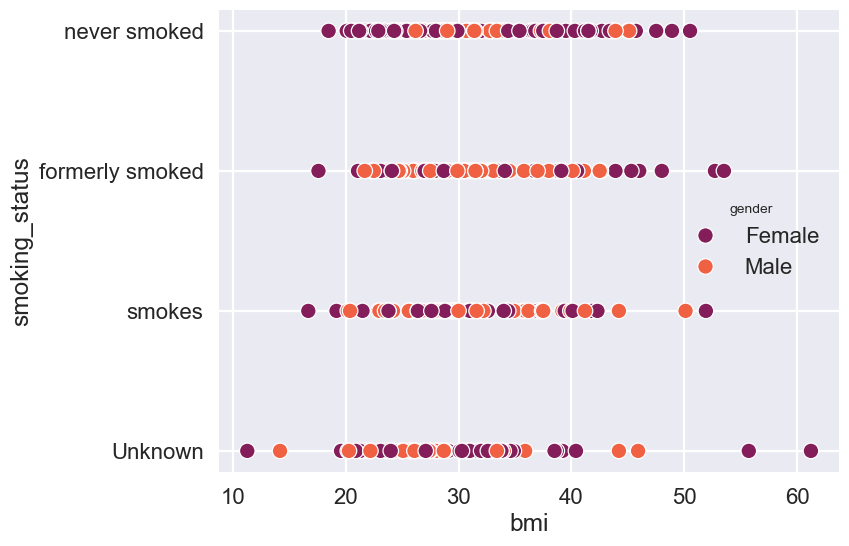

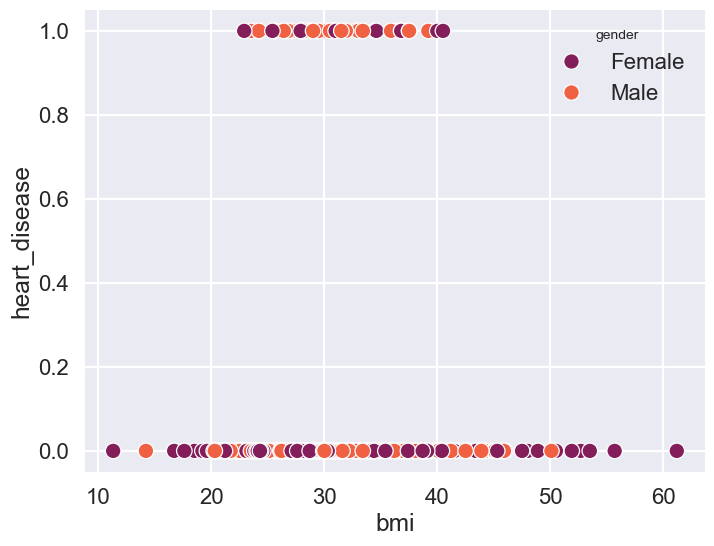

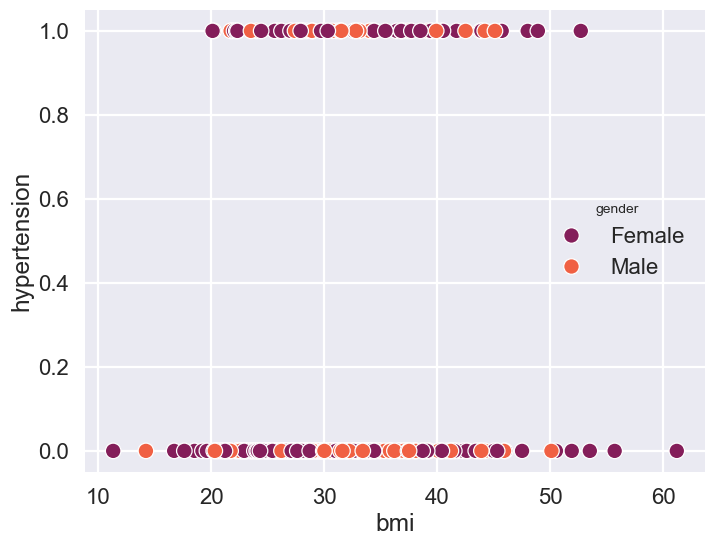

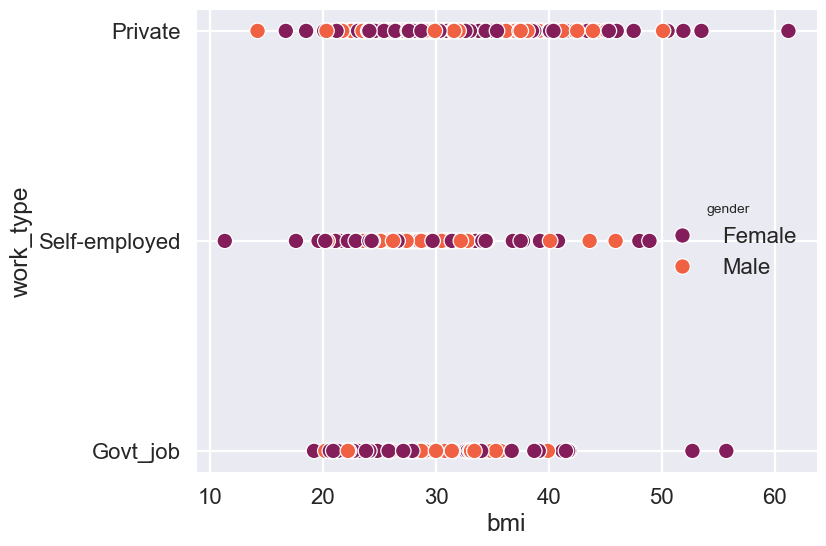

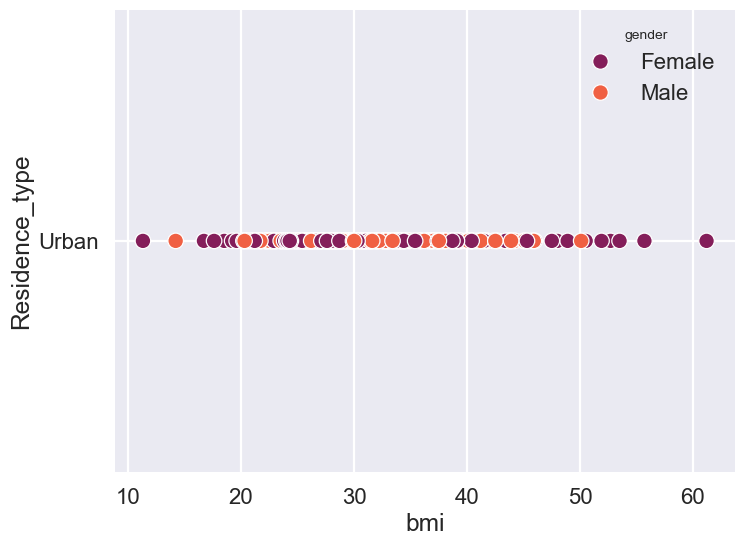

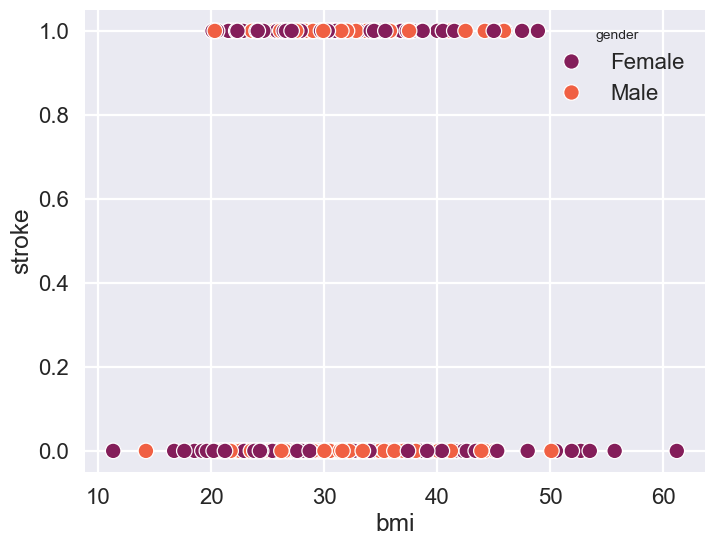

In [32]:
lst1 = ["smoking_status","heart_disease","hypertension","work_type","Residence_type","stroke"]
for i in range (len(lst1)):
    feature_relationship_bmi("bmi",lst1[i],"gender")

In [33]:
import seaborn as sns

def target_features_relation(a, b):
    """
    Plots a categorical plot to visualize the relationship between two variables using counts, with hue representing another variable.

    Parameters:
    - a (str): Name of the variable to plot on the y-axis.
    - b (str): Name of the variable to use for coloring different categories (hue).

    Returns:
    None
    """
    # Create a categorical plot with seaborn catplot
    sns.catplot(
        data=df, y=a, hue=b, kind="count",
        palette="husl", edgecolor=".6", height=4,
        aspect=2
    ).map(sns.histplot, binwidth=0.1)


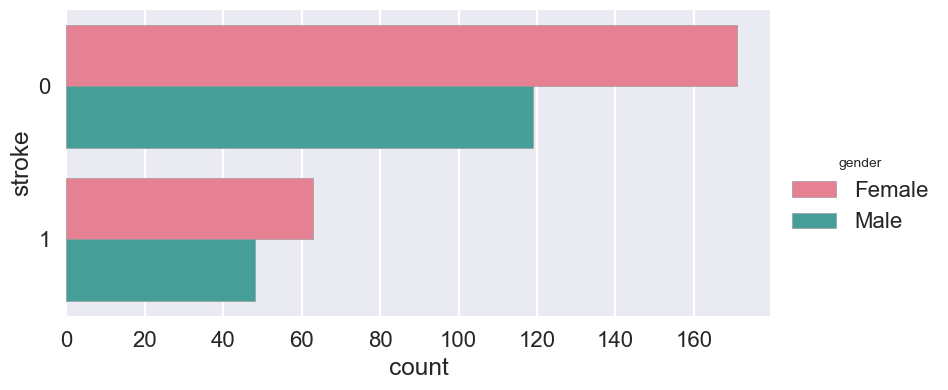

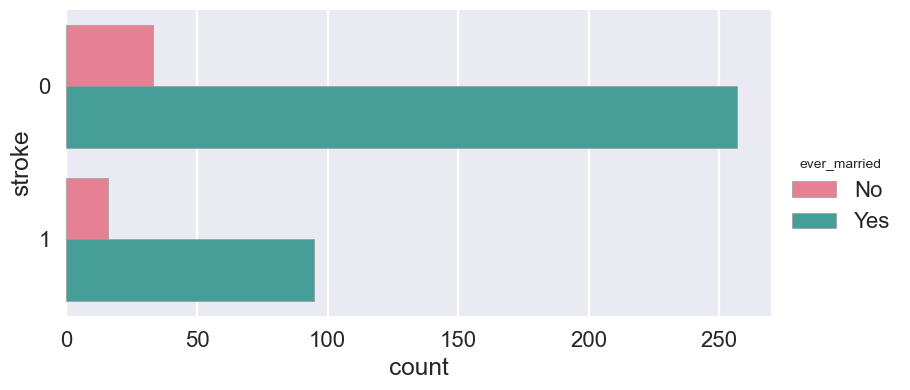

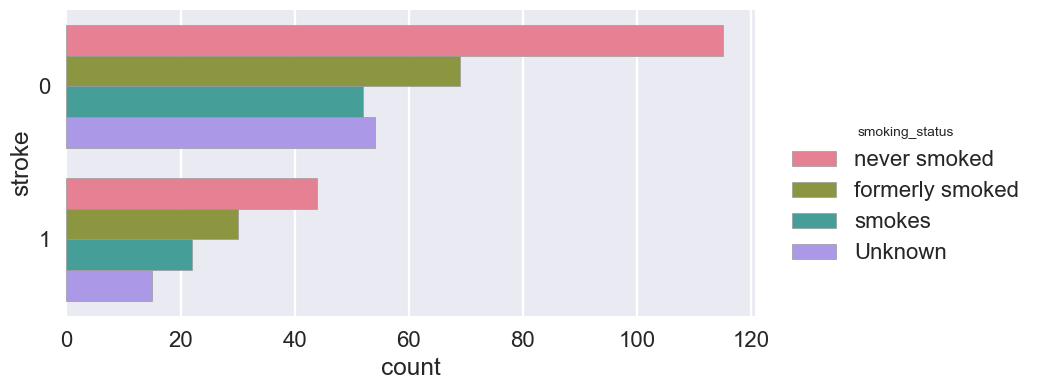

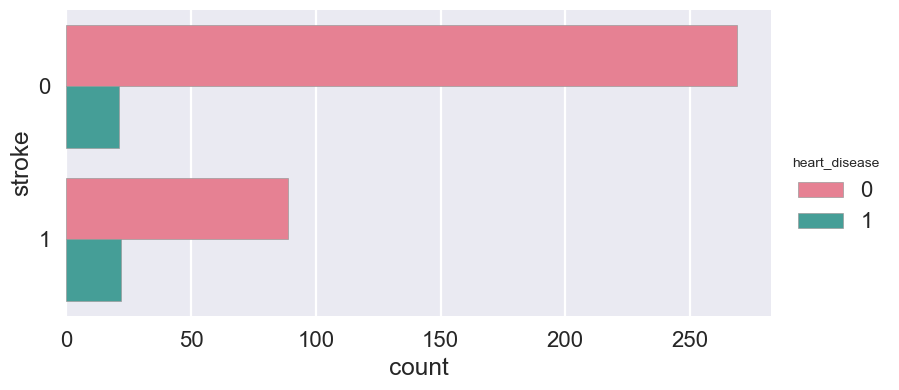

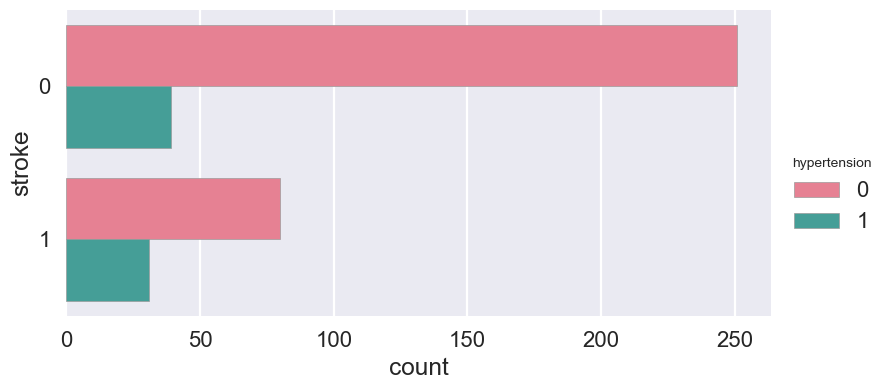

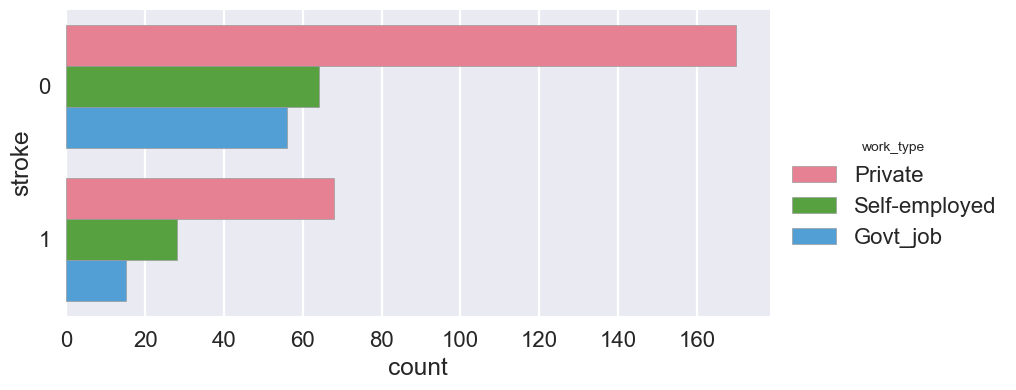

In [34]:
lst2 = ["gender","ever_married","smoking_status","heart_disease","hypertension","work_type","Residence_type"]
for i in range (len(lst1)):
    target_features_relation ("stroke",lst2[i])

In [8]:
data.describe()

age  hypertension  heart_disease  avg_glucose_level         bmi  \
count  401.000000    401.000000     401.000000         401.000000  401.000000   
mean    58.723192      0.174564       0.107232         114.734040   30.703242   
std     15.000023      0.380068       0.309794          52.615029    7.031658   
min     31.000000      0.000000       0.000000          55.640000   11.300000   
25%     47.000000      0.000000       0.000000          78.740000   26.100000   
50%     57.000000      0.000000       0.000000          93.210000   29.500000   
75%     74.000000      0.000000       0.000000         129.430000   34.100000   
max     82.000000      1.000000       1.000000         267.610000   61.200000   

           stroke  
count  401.000000  
mean     0.276808  
std      0.447980  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000

In [10]:
data.describe(include='all')

gender         age  hypertension  heart_disease ever_married  \
count      401  401.000000    401.000000     401.000000          401   
unique       2         NaN           NaN            NaN            2   
top     Female         NaN           NaN            NaN          Yes   
freq       234         NaN           NaN            NaN          352   
mean       NaN   58.723192      0.174564       0.107232          NaN   
std        NaN   15.000023      0.380068       0.309794          NaN   
min        NaN   31.000000      0.000000       0.000000          NaN   
25%        NaN   47.000000      0.000000       0.000000          NaN   
50%        NaN   57.000000      0.000000       0.000000          NaN   
75%        NaN   74.000000      0.000000       0.000000          NaN   
max        NaN   82.000000      1.000000       1.000000          NaN   

       work_type Residence_type  avg_glucose_level         bmi smoking_status  \
count        401            401         401.000000  401.000000            401   
unique         3              1                NaN         NaN              4   
top      Private          Urban                NaN         NaN   never smoked   
freq         238            401                NaN         NaN            159   
mean         NaN            NaN         114.734040   30.703242            NaN   
std          NaN            NaN          52.615029    7.031658            NaN   
min          NaN            NaN          55.640000   11.300000            NaN   
25%          NaN            NaN          78.740000   26.100000            NaN   
50%          NaN            NaN          93.210000   29.500000            NaN   
75%          NaN            NaN         129.430000   34.100000            NaN   
max          NaN            NaN         267.610000   61.200000            NaN   

            stroke  
count   401.000000  
unique         NaN  
top            NaN  
freq           NaN  
mean      0.276808  
std       0.447980  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

In [12]:
data.work_type.value_counts()

work_type
Private          238
Self-employed     92
Govt_job          71
Name: count, dtype: int64

# Data Preprocessing

# Encoding and Scaling

In [23]:

from sklearn.preprocessing import LabelEncoder, StandardScaler

In [24]:
df

Id  gender  age  hypertension  heart_disease ever_married work_type  \
0      1  Female   42             0              0           No   Private   
1      2    Male   31             0              0           No   Private   
2      3    Male   79             0              0          Yes   Private   
3      4  Female   58             0              0          Yes   Private   
4      5    Male   48             1              0          Yes   Private   
..   ...     ...  ...           ...            ...          ...       ...   
396  397  Female   45             0              0          Yes   Private   
397  398  Female   53             1              0          Yes   Private   
398  399    Male   76             0              0          Yes   Private   
399  400    Male   64             0              1          Yes   Private   
400  401    Male   43             0              0           No  Govt_job   

    Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0            Urban              98.53  18.5     never smoked       0  
1            Urban              72.60  31.6     never smoked       0  
2            Urban             198.79  24.9     never smoked       0  
3            Urban             105.74  26.8  formerly smoked       0  
4            Urban             173.14  37.0           smokes       0  
..             ...                ...   ...              ...     ...  
396          Urban             172.33  45.3  formerly smoked       0  
397          Urban              62.55  30.3          Unknown       1  
398          Urban             140.10  29.9  formerly smoked       1  
399          Urban             191.61  37.5           smokes       1  
400          Urban              84.43  30.0           smokes       0  

[401 rows x 12 columns]

In [25]:
import joblib

# Fit and transform using LabelEncoder
label_encoder_gender = LabelEncoder()
label_encoder_work_type = LabelEncoder()
label_encoder_ever_married = LabelEncoder()
label_encoder_smoking_status=LabelEncoder()

df['gender'] = label_encoder_gender.fit_transform(df['gender'])
df['work_type'] = label_encoder_work_type.fit_transform(df['work_type'])
df['ever_married'] = label_encoder_ever_married.fit_transform(df['ever_married'])
df['smoking_status'] = label_encoder_smoking_status.fit_transform(df['smoking_status'])

# # Save the fitted LabelEncoders
# joblib.dump(label_encoder_gender, 'label_encoder_gender.joblib')
# joblib.dump(label_encoder_work_type, 'label_encoder_work_type.joblib')
# joblib.dump(label_encoder_ever_married, 'label_encoder_ever_married.joblib')
# joblib.dump(label_encoder_smoking_status, 'label_encoder_smoking_status.joblib')



df.drop(columns=['Residence_type'], inplace=True)

df.drop(columns=['Id'], inplace=True)

# Fit and transform using StandardScaler
scaler = StandardScaler()
numerical_features = ['age', 'avg_glucose_level', 'bmi']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Save the fitted StandardScaler
# joblib.dump(scaler, 'scaler.joblib')



In [98]:


df

gender       age  hypertension  heart_disease  ever_married  work_type  \
0         0 -1.116270             0              0             0          1   
1         1 -1.850519             0              0             0          1   
2         1  1.353474             0              0             1          1   
3         0 -0.048273             0              0             1          1   
4         1 -0.715771             1              0             1          1   
..      ...       ...           ...            ...           ...        ...   
396       0 -0.916021             0              0             1          1   
397       0 -0.382022             1              0             1          1   
398       1  1.153224             0              0             1          1   
399       1  0.352226             0              1             1          1   
400       1 -1.049521             0              0             0          0   

     avg_glucose_level       bmi  smoking_status  stroke  
0            -0.308358 -1.737639               2       0  
1            -0.801799  0.127691               2       0  
2             1.599561 -0.826333               2       0  
3            -0.171154 -0.555789               1       0  
4             1.111449  0.896606               3       0  
..                 ...       ...             ...     ...  
396           1.096035  2.078456               1       0  
397          -0.993048 -0.057418               0       1  
398           0.482707 -0.114375               1       1  
399           1.462928  0.967801               3       1  
400          -0.576677 -0.100136               3       0  

[401 rows x 10 columns]

In [27]:
df.head()

gender       age  hypertension  heart_disease  ever_married  work_type  \
0       0 -1.116270             0              0             0          1   
1       1 -1.850519             0              0             0          1   
2       1  1.353474             0              0             1          1   
3       0 -0.048273             0              0             1          1   
4       1 -0.715771             1              0             1          1   

   avg_glucose_level       bmi  smoking_status  stroke  
0          -0.308358 -1.737639               2       0  
1          -0.801799  0.127691               2       0  
2           1.599561 -0.826333               2       0  
3          -0.171154 -0.555789               1       0  
4           1.111449  0.896606               3       0

In [40]:
df.drop(columns=['Id'], inplace=True)

<Axes: >

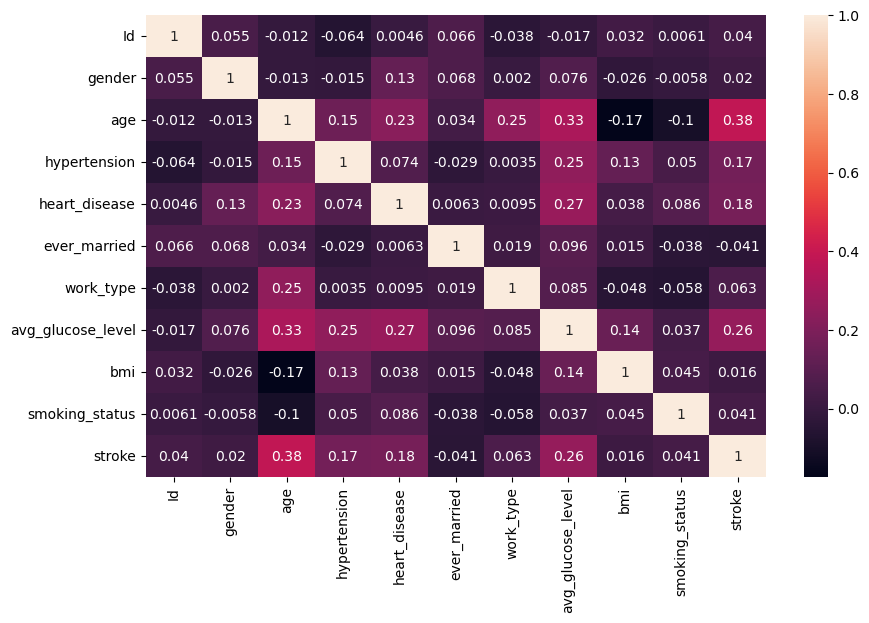

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

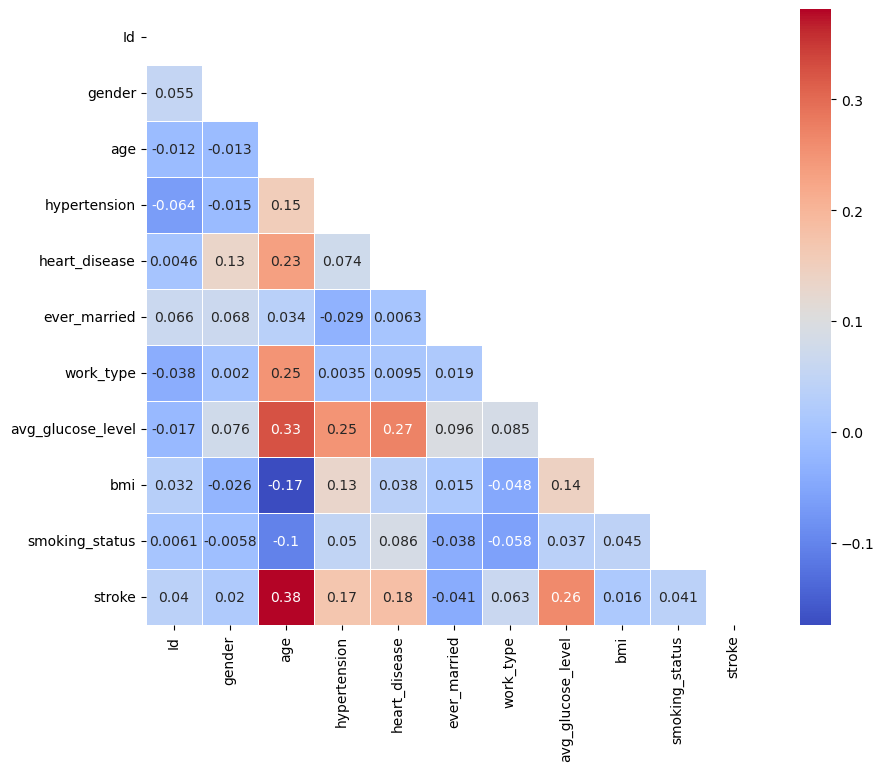

In [20]:
# Calculate correlation between each pair of variables
corr_matrix = df.corr()

# Create a mask for the upper triangle
mask = np.zeros_like(corr_matrix)  # Create a matrix of zeros with the same shape as the correlation matrix
mask[np.triu_indices_from(mask)] = True  # Fill the upper triangle of the matrix with True

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, square=True, annot=True, cmap='coolwarm', linewidths=.5)

# Display the plot
plt.show()


In [99]:
features = df.drop('stroke', axis=1)
labels = df['stroke']

# Model Training and Evaluation
Train-Test Split

In [100]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)
# This splits the data into 70% training and 30% testing sets


In [30]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             401 non-null    int32  
 1   age                401 non-null    float64
 2   hypertension       401 non-null    int64  
 3   heart_disease      401 non-null    int64  
 4   ever_married       401 non-null    int32  
 5   work_type          401 non-null    int32  
 6   avg_glucose_level  401 non-null    float64
 7   bmi                401 non-null    float64
 8   smoking_status     401 non-null    int32  
dtypes: float64(3), int32(4), int64(2)
memory usage: 22.1 KB


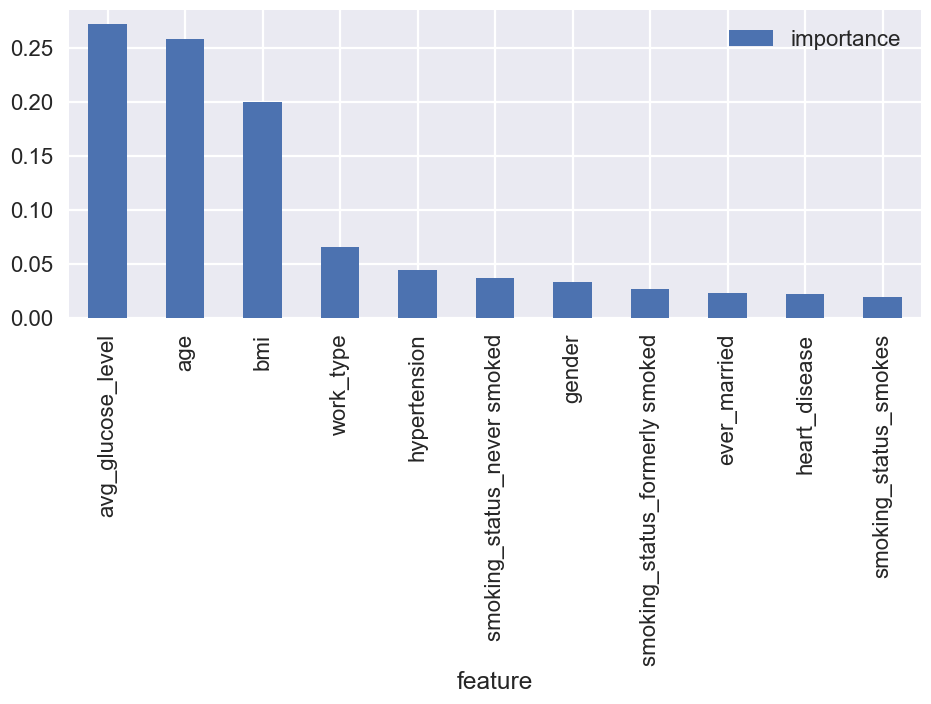

In [46]:
# Import the RandomForestClassifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rfc = RandomForestClassifier()

# Fit the RandomForestClassifier on the training set
rfc.fit(X_train, y_train)

# Extract the feature importances
score = np.round(rfc.feature_importances_, 3)  # Round the feature importances to 3 decimal places

# Create a DataFrame to hold the features and their importances
importances = pd.DataFrame({'feature': X_train.columns, 'importance': score})

# Sort the DataFrame by the importance values in descending order
importances = importances.sort_values('importance', ascending=False).set_index('feature')

# Set the figure size for the plot
plt.rcParams['figure.figsize'] = (11, 4)

# Plot the feature importances as a bar chart
importances.plot.bar()

# Display the plot
plt.show()


In [47]:
from sklearn.metrics import classification_report , confusion_matrix,make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, precision_recall_curve, roc_curve, auc, confusion_matrix, make_scorer, matthews_corrcoef, classification_report, confusion_matrix
from sklearn.inspection import permutation_importance
import warnings
import pickle
rfc.fit(X_train, y_train);
predict = rfc.predict(X_test)
#y_predicted = np.round(predict)
#Confusion_Matrix = ConfusionMatrix(y_val, y_predicted)
#print(Confusion_Matrix)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81        85
           1       0.50      0.25      0.33        36

    accuracy                           0.70       121
   macro avg       0.62      0.57      0.57       121
weighted avg       0.67      0.70      0.67       121



In [48]:
X_train

gender       age  hypertension  heart_disease  ever_married  work_type  \
109       0  1.219974             0              0             1          1   
17        0 -1.116270             0              0             1          0   
265       1 -0.048273             0              0             1          1   
24        0  0.485726             0              0             1          1   
175       0  1.353474             0              0             0          2   
..      ...       ...           ...            ...           ...        ...   
71        0 -0.315272             0              0             1          1   
106       0  0.352226             1              0             1          0   
270       0 -0.715771             0              0             1          1   
348       1  0.018477             0              0             1          1   
102       0  0.886225             1              0             1          1   

     avg_glucose_level       bmi  smoking_status_formerly smoked  \
109          -0.284571  1.038997                               0   
17           -0.491805  0.327039                               0   
265          -0.865739 -0.441876                               0   
24           -0.721303 -0.669702                               0   
175          -0.676203  0.270082                               0   
..                 ...       ...                             ...   
71           -0.194561 -0.484593                               0   
106           1.834198 -1.239269                               0   
270           0.027897 -0.441876                               1   
348          -0.070297  0.184647                               1   
102           2.037245 -0.100136                               0   

     smoking_status_never smoked  smoking_status_smokes  
109                            1                      0  
17                             1                      0  
265                            1                      0  
24                             1                      0  
175                            1                      0  
..                           ...                    ...  
71                             0                      1  
106                            1                      0  
270                            0                      0  
348                            0                      0  
102                            1                      0  

[280 rows x 11 columns]

In [49]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import time
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
import joblib
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn import metrics  # Import metrics from sklearn for scoring
import pandas as pd  # Import pandas for data manipulation

# Define a dictionary of scoring metrics
scorer = {
    'accuracy_score': metrics.make_scorer(metrics.accuracy_score),  # Accuracy
    'precision_macro': metrics.make_scorer(metrics.precision_score, average='macro'),  # Precision (macro-averaged)
    'recall_macro': metrics.make_scorer(metrics.recall_score, average='macro'),  # Recall (macro-averaged)
    'f1_macro': metrics.make_scorer(metrics.f1_score, average='macro'),  # F1 Score (macro-averaged)
    'matthew_corrcoef': metrics.make_scorer(metrics.matthews_corrcoef),  # Matthews Correlation Coefficient
    'roc_auc_macro': metrics.make_scorer(metrics.roc_auc_score, multi_class='ovo', average='macro')  # ROC AUC (macro-averaged, one-vs-one)
}

# Initialize an empty DataFrame to store model performance metrics
models = pd.DataFrame(columns=['model', 'run_time', 'avg_accy', 'avg_accy_std',
                                'avg_precision_macro', 'avg_precision_macro_std',
                                'avg_recall_macro', 'avg_recall_macro_std',
                                'avg_f1_macro', 'avg_f1_macro_std',
                                'avg_matthew_corcoef', 'avg_matthew_corcoef_std'])


In [60]:
# Import necessary libraries
import pandas as pd
import time
import joblib
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score
seed = 42
np.random.seed(seed)

# Define a dictionary of classifiers
classifiers = { "Support Vector Classifier": SVC(),    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Hist Gradient Boosting Classifier": HistGradientBoostingClassifier(),
    'Random Forest Classifier': RandomForestClassifier(n_jobs=-1),    'AdaBoost Classifier': AdaBoostClassifier(),
    "KNeighbors Classifier": KNeighborsClassifier(n_neighbors=5), "Logistic Regression": LogisticRegression(max_iter=1000),
    "XGBoost Classifier": xgb.XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=80, use_label_encoder=False, eval_metric='auc')
}
# Initialize a DataFrame to store model evaluation metrics
models = pd.DataFrame(columns=['model', 'run_time', 'avg_accy', 'avg_accy_std', 'avg_recall', 'avg_recall_std',
                                'avg_precision', 'avg_precision_std', 'avg_f1', 'avg_f1_std', 'avg_matthew_corcoef',
                                'avg_matthew_corcoef_std', 'avg_roc_auc', 'avg_roc_auc_std'])

# Define a scorer dictionary
scorer = {
    'accuracy_score': make_scorer(accuracy_score),
    'precision_score': make_scorer(precision_score, average='weighted'),
    'recall_score': make_scorer(recall_score, average='weighted'),
    'f1_score': make_scorer(f1_score, average='weighted'),
    'matthew_corrcoef': make_scorer(matthews_corrcoef),
    'roc_auc_score': make_scorer(roc_auc_score, average='weighted')
}
# Dictionary to store the best models
best_models = {}
# Loop through each classifier in the dictionary
for key in classifiers:
    print('*', key)
    start_time = time.time()  # Start timer
    classifier = classifiers[key]
    # Apply SMOTE to handle class imbalance
    #sm = SMOTE(random_state=33)
    #X_res, y_res = sm.fit_resample(X_train, y_train)  
    # Train the model
    model = classifier.fit(X_train, y_train)
    # Perform cross-validation
    cvs = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    cv_scores = cross_validate(model, X_test, y_test, cv=cvs, scoring=scorer, n_jobs=-1)
    # Save the best model
    model_filename = f'best_{key}_model.pkl'
    joblib.dump(model, model_filename)
    best_models[key] = model_filename    # Store the evaluation metrics
    row = {
        'model': key,
        'run_time': round((time.time() - start_time) / 60, 2),  # Calculate runtime in minutes
        'avg_accy': cv_scores['test_accuracy_score'].mean(),
        'avg_accy_std': cv_scores['test_accuracy_score'].std(),
        'avg_recall': cv_scores['test_recall_score'].mean(),
        'avg_recall_std': cv_scores['test_recall_score'].std(),
        'avg_precision': cv_scores['test_precision_score'].mean(),
        'avg_precision_std': cv_scores['test_precision_score'].std(),
        'avg_f1': cv_scores['test_f1_score'].mean(),
        'avg_f1_std': cv_scores['test_f1_score'].std(),
        'avg_matthew_corcoef': cv_scores['test_matthew_corrcoef'].mean(),
        'avg_matthew_corcoef_std': cv_scores['test_matthew_corrcoef'].std(),
        'avg_roc_auc': cv_scores['test_roc_auc_score'].mean(),
        'avg_roc_auc_std': cv_scores['test_roc_auc_score'].std()
    }
    
    # Append the metrics to the models DataFrame
    models = models.append(row, ignore_index=True)


* Support Vector Classifier
* Decision Tree Classifier
* Hist Gradient Boosting Classifier
* Random Forest Classifier
* AdaBoost Classifier
* KNeighbors Classifier
* Logistic Regression
* XGBoost Classifier


In [61]:
models

model  run_time  avg_accy  avg_accy_std  \
0          Support Vector Classifier      0.00  0.730556      0.100165   
1           Decision Tree Classifier      0.00  0.658974      0.122192   
2  Hist Gradient Boosting Classifier      0.03  0.703205      0.109790   
3           Random Forest Classifier      0.05  0.738462      0.082547   
4                AdaBoost Classifier      0.02  0.664530      0.104093   
5              KNeighbors Classifier      0.00  0.750427      0.103785   
6                Logistic Regression      0.00  0.783120      0.114264   
7                 XGBoost Classifier      0.01  0.733333      0.090482   

   avg_recall  avg_recall_std  avg_precision  avg_precision_std    avg_f1  \
0    0.730556        0.100165       0.713102           0.160112  0.692703   
1    0.658974        0.122192       0.668593           0.125089  0.654548   
2    0.703205        0.109790       0.687607           0.147094  0.682053   
3    0.738462        0.082547       0.718197           0.126457  0.711209   
4    0.664530        0.104093       0.658154           0.137200  0.646787   
5    0.750427        0.103785       0.748436           0.149880  0.724784   
6    0.783120        0.114264       0.794946           0.135324  0.768681   
7    0.733333        0.090482       0.719726           0.132323  0.712289   

   avg_f1_std  avg_matthew_corcoef  avg_matthew_corcoef_std  avg_roc_auc  \
0    0.115854             0.284279                 0.306106     0.614815   
1    0.120170             0.182325                 0.312601     0.591435   
2    0.121106             0.246978                 0.302552     0.619213   
3    0.093349             0.316198                 0.239227     0.637269   
4    0.111463             0.164316                 0.296192     0.584491   
5    0.121598             0.361688                 0.309699     0.659722   
6    0.121780             0.474062                 0.289858     0.710880   
7    0.104045             0.320781                 0.277310     0.653241   

   avg_roc_auc_std  
0         0.130840  
1         0.154703  
2         0.132796  
3         0.109386  
4         0.141299  
5         0.136766  
6         0.140219  
7         0.132600

In [135]:
# Import necessary libraries
import pandas as pd
import time
import joblib
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score
seed = 42
np.random.seed(seed)

# Define a dictionary of classifiers
classifiers = { "Support Vector Classifier": SVC(),    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Hist Gradient Boosting Classifier": HistGradientBoostingClassifier(),
    'Random Forest Classifier': RandomForestClassifier(n_jobs=-1),    'AdaBoost Classifier': AdaBoostClassifier(),
    "KNeighbors Classifier": KNeighborsClassifier(n_neighbors=5), "Logistic Regression": LogisticRegression(max_iter=1000),
    "XGBoost Classifier": xgb.XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=80, use_label_encoder=False, eval_metric='auc')
}
# Initialize a DataFrame to store model evaluation metrics
models = pd.DataFrame(columns=['model', 'run_time', 'avg_accy', 'avg_accy_std', 'avg_recall', 'avg_recall_std',
                                'avg_precision', 'avg_precision_std', 'avg_f1', 'avg_f1_std', 'avg_matthew_corcoef',
                                'avg_matthew_corcoef_std', 'avg_roc_auc', 'avg_roc_auc_std'])

# Define a scorer dictionary
scorer = {
    'accuracy_score': make_scorer(accuracy_score),
    'precision_score': make_scorer(precision_score, average='weighted'),
    'recall_score': make_scorer(recall_score, average='weighted'),
    'f1_score': make_scorer(f1_score, average='weighted'),
    'matthew_corrcoef': make_scorer(matthews_corrcoef),
    'roc_auc_score': make_scorer(roc_auc_score, average='weighted')
}
# Dictionary to store the best models
best_models = {}
# Loop through each classifier in the dictionary
for key in classifiers:
    print('*', key)
    start_time = time.time()  # Start timer
    classifier = classifiers[key]
    # Apply SMOTE to handle class imbalance
    sm = SMOTE(random_state=33)
    X_res, y_res = sm.fit_resample(X_train, y_train) 
    joblib.dump(sm, f'smote.joblib')
    # Train the model
    model = classifier.fit(X_res, y_res)
    # Perform cross-validation
    cvs = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    cv_scores = cross_validate(model, X_test, y_test, cv=cvs, scoring=scorer, n_jobs=-1)
    # Save the best model
    model_filename = f'best_{key}_model.pkl'
    joblib.dump(model, model_filename)
    best_models[key] = model_filename    # Store the evaluation metrics
    row = {
        'model': key,
        'run_time': round((time.time() - start_time) / 60, 2),  # Calculate runtime in minutes
        'avg_accy': cv_scores['test_accuracy_score'].mean(),
        'avg_accy_std': cv_scores['test_accuracy_score'].std(),
        'avg_recall': cv_scores['test_recall_score'].mean(),
        'avg_recall_std': cv_scores['test_recall_score'].std(),
        'avg_precision': cv_scores['test_precision_score'].mean(),
        'avg_precision_std': cv_scores['test_precision_score'].std(),
        'avg_f1': cv_scores['test_f1_score'].mean(),
        'avg_f1_std': cv_scores['test_f1_score'].std(),
        'avg_matthew_corcoef': cv_scores['test_matthew_corrcoef'].mean(),
        'avg_matthew_corcoef_std': cv_scores['test_matthew_corrcoef'].std(),
        'avg_roc_auc': cv_scores['test_roc_auc_score'].mean(),
        'avg_roc_auc_std': cv_scores['test_roc_auc_score'].std()
    }
    
    # Append the metrics to the models DataFrame
    models = pd.concat([models, pd.DataFrame([row])], ignore_index=True)


* Support Vector Classifier
* Decision Tree Classifier
* Hist Gradient Boosting Classifier
* Random Forest Classifier
* AdaBoost Classifier
* KNeighbors Classifier
* Logistic Regression
* XGBoost Classifier


In [53]:
models

model  run_time  avg_accy  avg_accy_std  \
0          Support Vector Classifier      0.00  0.730556      0.100165   
1           Decision Tree Classifier      0.00  0.664103      0.137660   
2  Hist Gradient Boosting Classifier      0.02  0.703205      0.109790   
3           Random Forest Classifier      0.04  0.744017      0.085874   
4                AdaBoost Classifier      0.02  0.664530      0.104093   
5              KNeighbors Classifier      0.00  0.750427      0.103785   
6                Logistic Regression      0.00  0.783120      0.114264   
7                 XGBoost Classifier      0.01  0.733333      0.090482   

   avg_recall  avg_recall_std  avg_precision  avg_precision_std    avg_f1  \
0    0.730556        0.100165       0.713102           0.160112  0.692703   
1    0.664103        0.137660       0.665840           0.147132  0.656206   
2    0.703205        0.109790       0.687607           0.147094  0.682053   
3    0.744017        0.085874       0.718249           0.145836  0.708501   
4    0.664530        0.104093       0.658154           0.137200  0.646787   
5    0.750427        0.103785       0.748436           0.149880  0.724784   
6    0.783120        0.114264       0.794946           0.135324  0.768681   
7    0.733333        0.090482       0.719726           0.132323  0.712289   

   avg_f1_std  avg_matthew_corcoef  avg_matthew_corcoef_std  avg_roc_auc  \
0    0.115854             0.284279                 0.306106     0.614815   
1    0.139743             0.197359                 0.341469     0.604398   
2    0.121106             0.246978                 0.302552     0.619213   
3    0.103222             0.316020                 0.271337     0.631019   
4    0.111463             0.164316                 0.296192     0.584491   
5    0.121598             0.361688                 0.309699     0.659722   
6    0.121780             0.474062                 0.289858     0.710880   
7    0.104045             0.320781                 0.277310     0.653241   

   avg_roc_auc_std  
0         0.130840  
1         0.177290  
2         0.132796  
3         0.118134  
4         0.141299  
5         0.136766  
6         0.140219  
7         0.132600

In [65]:
# Import necessary libraries
import pandas as pd
import time
import joblib
from imblearn.combine import SMOTETomek
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score
import numpy as np

# Set a seed for reproducibility
seed = 42
np.random.seed(seed)

# Define a dictionary of classifiers
classifiers = {
    "Support Vector Classifier": SVC(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Hist Gradient Boosting Classifier": HistGradientBoostingClassifier(),
    'Random Forest Classifier': RandomForestClassifier(n_jobs=-1),
    'AdaBoost Classifier': AdaBoostClassifier(),
    "KNeighbors Classifier": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "XGBoost Classifier": xgb.XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=80, use_label_encoder=False, eval_metric='auc')
}

# Initialize a DataFrame to store model evaluation metrics
models = pd.DataFrame(columns=['model', 'run_time', 'avg_accy', 'avg_accy_std', 'avg_recall', 'avg_recall_std',
                               'avg_precision', 'avg_precision_std', 'avg_f1', 'avg_f1_std', 'avg_matthew_corcoef',
                               'avg_matthew_corcoef_std', 'avg_roc_auc', 'avg_roc_auc_std'])

# Define a scorer dictionary
scorer = {
    'accuracy_score': make_scorer(accuracy_score),
    'precision_score': make_scorer(precision_score, average='weighted'),
    'recall_score': make_scorer(recall_score, average='weighted'),
    'f1_score': make_scorer(f1_score, average='weighted'),
    'matthew_corrcoef': make_scorer(matthews_corrcoef),
    'roc_auc_score': make_scorer(roc_auc_score, average='weighted')
}
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

best_models = {}

# Loop through each classifier in the dictionary
for key in classifiers:
    print('*', key)
    start_time = time.time()  # Start timer
    classifier = classifiers[key]
    
    # Apply SMOTE combined with Tomek Links to handle class imbalance
    smote_tomek = SMOTETomek(random_state=seed)
    X_res, y_res = smote_tomek.fit_resample(X_train, y_train)
    
    # Train the model
    model = classifier.fit(X_res, y_res)
    
    # Perform cross-validation
    cvs = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
    cv_scores = cross_validate(model, X_test, y_test, cv=cvs, scoring=scorer, n_jobs=-1)
    
    # Save the best model
    model_filename = f'best_{key}_model.pkl'
    #joblib.dump(model, model_filename)
    best_models[key] = model_filename
    
    # Store the evaluation metrics
    row = {
        'model': key,
        'run_time': round((time.time() - start_time) / 60, 2),  # Calculate runtime in minutes
        'avg_accy': cv_scores['test_accuracy_score'].mean(),
        'avg_accy_std': cv_scores['test_accuracy_score'].std(),
        'avg_recall': cv_scores['test_recall_score'].mean(),
        'avg_recall_std': cv_scores['test_recall_score'].std(),
        'avg_precision': cv_scores['test_precision_score'].mean(),
        'avg_precision_std': cv_scores['test_precision_score'].std(),
        'avg_f1': cv_scores['test_f1_score'].mean(),
        'avg_f1_std': cv_scores['test_f1_score'].std(),
        'avg_matthew_corcoef': cv_scores['test_matthew_corrcoef'].mean(),
        'avg_matthew_corcoef_std': cv_scores['test_matthew_corrcoef'].std(),
        'avg_roc_auc': cv_scores['test_roc_auc_score'].mean(),
        'avg_roc_auc_std': cv_scores['test_roc_auc_score'].std()
    }
    
    # Append the metrics to the models DataFrame
    models = models.append(row, ignore_index=True)


* Support Vector Classifier
* Decision Tree Classifier
* Hist Gradient Boosting Classifier
* Random Forest Classifier
* AdaBoost Classifier
* KNeighbors Classifier
* Logistic Regression
* XGBoost Classifier


In [55]:
models

model  run_time  avg_accy  avg_accy_std  \
0          Support Vector Classifier      0.00  0.730556      0.100165   
1           Decision Tree Classifier      0.00  0.647436      0.128632   
2  Hist Gradient Boosting Classifier      0.03  0.703205      0.109790   
3           Random Forest Classifier      0.04  0.749786      0.097939   
4                AdaBoost Classifier      0.02  0.664530      0.104093   
5              KNeighbors Classifier      0.00  0.750427      0.103785   
6                Logistic Regression      0.00  0.783120      0.114264   
7                 XGBoost Classifier      0.01  0.733333      0.090482   

   avg_recall  avg_recall_std  avg_precision  avg_precision_std    avg_f1  \
0    0.730556        0.100165       0.713102           0.160112  0.692703   
1    0.647436        0.128632       0.666264           0.136297  0.645713   
2    0.703205        0.109790       0.687607           0.147094  0.682053   
3    0.749786        0.097939       0.720129           0.149475  0.717381   
4    0.664530        0.104093       0.658154           0.137200  0.646787   
5    0.750427        0.103785       0.748436           0.149880  0.724784   
6    0.783120        0.114264       0.794946           0.135324  0.768681   
7    0.733333        0.090482       0.719726           0.132323  0.712289   

   avg_f1_std  avg_matthew_corcoef  avg_matthew_corcoef_std  avg_roc_auc  \
0    0.115854             0.284279                 0.306106     0.614815   
1    0.125937             0.180334                 0.313359     0.589583   
2    0.121106             0.246978                 0.302552     0.619213   
3    0.115941             0.326784                 0.294579     0.645139   
4    0.111463             0.164316                 0.296192     0.584491   
5    0.121598             0.361688                 0.309699     0.659722   
6    0.121780             0.474062                 0.289858     0.710880   
7    0.104045             0.320781                 0.277310     0.653241   

   avg_roc_auc_std  
0         0.130840  
1         0.157016  
2         0.132796  
3         0.136464  
4         0.141299  
5         0.136766  
6         0.140219  
7         0.132600

In [66]:
# Import necessary libraries
import pandas as pd
import time
import joblib
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score
import numpy as np

# Set a seed for reproducibility
seed = 42
np.random.seed(seed)

# Define a dictionary of classifiers
classifiers = {
    "Support Vector Classifier": SVC(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Hist Gradient Boosting Classifier": HistGradientBoostingClassifier(),
    'Random Forest Classifier': RandomForestClassifier(n_jobs=-1),
    'AdaBoost Classifier': AdaBoostClassifier(),
    "KNeighbors Classifier": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "XGBoost Classifier": xgb.XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=80, use_label_encoder=False, eval_metric='auc')
}

# Initialize a DataFrame to store model evaluation metrics
models = pd.DataFrame(columns=['model', 'run_time', 'avg_accy', 'avg_accy_std', 'avg_recall', 'avg_recall_std',
                               'avg_precision', 'avg_precision_std', 'avg_f1', 'avg_f1_std', 'avg_matthew_corcoef',
                               'avg_matthew_corcoef_std', 'avg_roc_auc', 'avg_roc_auc_std'])

# Define a scorer dictionary
scorer = {
    'accuracy_score': make_scorer(accuracy_score),
    'precision_score': make_scorer(precision_score, average='weighted'),
    'recall_score': make_scorer(recall_score, average='weighted'),
    'f1_score': make_scorer(f1_score, average='weighted'),
    'matthew_corrcoef': make_scorer(matthews_corrcoef),
    'roc_auc_score': make_scorer(roc_auc_score, average='weighted')
}

import pandas as pd
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)


# Dictionary to store the best models
best_models = {}

# Loop through each classifier in the dictionary
for key in classifiers:
    print('*', key)
    start_time = time.time()  # Start timer
    classifier = classifiers[key]
    # Apply random undersampling to further balance the dataset
    rus = RandomUnderSampler(random_state=seed)
    X_res, y_res = rus.fit_resample(X_res, y_res)
    
    # Train the model
    model = classifier.fit(X_res, y_res)
    
    # Perform cross-validation
    cvs = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
    cv_scores = cross_validate(model, X_test, y_test, cv=cvs, scoring=scorer, n_jobs=-1)
    
    # Save the best model
    #model_filename = f'best_{key}_model.pkl'
    joblib.dump(model, model_filename)
    best_models[key] = model_filename
    
    # Store the evaluation metrics
    row = {
        'model': key,
        'run_time': round((time.time() - start_time) / 60, 2),  # Calculate runtime in minutes
        'avg_accy': cv_scores['test_accuracy_score'].mean(),
        'avg_accy_std': cv_scores['test_accuracy_score'].std(),
        'avg_recall': cv_scores['test_recall_score'].mean(),
        'avg_recall_std': cv_scores['test_recall_score'].std(),
        'avg_precision': cv_scores['test_precision_score'].mean(),
        'avg_precision_std': cv_scores['test_precision_score'].std(),
        'avg_f1': cv_scores['test_f1_score'].mean(),
        'avg_f1_std': cv_scores['test_f1_score'].std(),
        'avg_matthew_corcoef': cv_scores['test_matthew_corrcoef'].mean(),
        'avg_matthew_corcoef_std': cv_scores['test_matthew_corrcoef'].std(),
        'avg_roc_auc': cv_scores['test_roc_auc_score'].mean(),
        'avg_roc_auc_std': cv_scores['test_roc_auc_score'].std()
    }
    
    # Append the metrics to the models DataFrame
    models = models.append(row, ignore_index=True)


* Support Vector Classifier
* Decision Tree Classifier
* Hist Gradient Boosting Classifier
* Random Forest Classifier
* AdaBoost Classifier
* KNeighbors Classifier
* Logistic Regression
* XGBoost Classifier


In [57]:
models

model  run_time  avg_accy  avg_accy_std  \
0          Support Vector Classifier      0.00  0.730556      0.100165   
1           Decision Tree Classifier      0.00  0.656197      0.128456   
2  Hist Gradient Boosting Classifier      0.04  0.703205      0.109790   
3           Random Forest Classifier      0.05  0.758120      0.101097   
4                AdaBoost Classifier      0.02  0.664530      0.104093   
5              KNeighbors Classifier      0.00  0.750427      0.103785   
6                Logistic Regression      0.00  0.783120      0.114264   
7                 XGBoost Classifier      0.01  0.733333      0.090482   

   avg_recall  avg_recall_std  avg_precision  avg_precision_std    avg_f1  \
0    0.730556        0.100165       0.713102           0.160112  0.692703   
1    0.656197        0.128456       0.667555           0.145893  0.650023   
2    0.703205        0.109790       0.687607           0.147094  0.682053   
3    0.758120        0.101097       0.750396           0.134967  0.730900   
4    0.664530        0.104093       0.658154           0.137200  0.646787   
5    0.750427        0.103785       0.748436           0.149880  0.724784   
6    0.783120        0.114264       0.794946           0.135324  0.768681   
7    0.733333        0.090482       0.719726           0.132323  0.712289   

   avg_f1_std  avg_matthew_corcoef  avg_matthew_corcoef_std  avg_roc_auc  \
0    0.115854             0.284279                 0.306106     0.614815   
1    0.128557             0.181309                 0.328722     0.587963   
2    0.121106             0.246978                 0.302552     0.619213   
3    0.109887             0.369720                 0.280639     0.655093   
4    0.111463             0.164316                 0.296192     0.584491   
5    0.121598             0.361688                 0.309699     0.659722   
6    0.121780             0.474062                 0.289858     0.710880   
7    0.104045             0.320781                 0.277310     0.653241   

   avg_roc_auc_std  
0         0.130840  
1         0.158726  
2         0.132796  
3         0.130958  
4         0.141299  
5         0.136766  
6         0.140219  
7         0.132600

In [26]:
X_res

Id  gender       age  hypertension  heart_disease  ever_married  \
0    110       0  1.219974             0              0             1   
1     18       0 -1.116270             0              0             1   
2    266       1 -0.048273             0              0             1   
3     25       0  0.485726             0              0             1   
4    176       0  1.353474             0              0             0   
..   ...     ...       ...           ...            ...           ...   
405  359       0  0.864690             0              0             1   
406   87       0 -0.709628             0              0             1   
407  356       0 -0.203037             0              0             1   
408  185       0 -0.118232             0              0             1   
409   34       0  0.456818             0              0             1   

     work_type  avg_glucose_level       bmi  smoking_status  
0            1          -0.284571  1.038997               2  
1            0          -0.491805  0.327039               2  
2            1          -0.865739 -0.441876               2  
3            1          -0.721303 -0.669702               2  
4            2          -0.676203  0.270082               2  
..         ...                ...       ...             ...  
405          0           0.867753 -0.499376               1  
406          1           0.079347  1.722985               1  
407          1          -0.488996 -0.915085               2  
408          0          -0.081579 -0.314560               0  
409          0           0.535128 -0.191323               2  

[410 rows x 10 columns]

In [127]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, matthews_corrcoef
from sklearn.neighbors import KNeighborsClassifier  # Import KNeighborsClassifier

from imblearn.over_sampling import SMOTE
# Define scoring metrics
seed = 42
np.random.seed(seed)
scoring = {
    'accuracy': 'accuracy',
    'recall': 'recall',
    'precision': 'precision',
    'f1': 'f1',
    'matthews_corrcoef': make_scorer(matthews_corrcoef),
    'roc_auc': 'roc_auc'
}
# Define the parameter grids for each model
param_grid_lr = {
    'C': [0.1,1.5,2,5, 10, 100],    'solver': ['liblinear', 'saga'],    'max_iter': [100, 200, 300, 400]
}
param_grid_rf = {
    'n_estimators': [50, 100, 200],'max_depth': [None, 10, 20, 30],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]
}
param_grid_xgb = {
    'n_estimators': [50, 100, 200],    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],    'subsample': [0.7, 0.8, 1.0],    'colsample_bytree': [0.7, 0.8, 1.0]
}
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize models
model_lr = LogisticRegression()
model_rf = RandomForestClassifier()
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_knn = KNeighborsClassifier()  # Initialize KNN model

# Initialize GridSearchCV for each model
grid_search_lr = GridSearchCV(model_lr, param_grid_lr, scoring=scoring, refit='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search_rf = GridSearchCV(model_rf, param_grid_rf, scoring=scoring, refit='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search_xgb = GridSearchCV(model_xgb, param_grid_xgb, scoring=scoring, refit='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search_knn = GridSearchCV(model_knn, param_grid_knn, scoring=scoring, refit='accuracy', cv=5, verbose=1, n_jobs=-1)  # Initialize GridSearchCV for KNN
sm = SMOTE(random_state=33)
#X_res, y_res = sm.fit_resample(X_train, y_train) 
X_res, y_res=X_train,y_train
# Fit the models
grid_search_lr.fit(X_res, y_res)
grid_search_rf.fit(X_res, y_res)
grid_search_xgb.fit(X_res, y_res)
grid_search_knn.fit(X_res, y_res)  # Fit KNN model
    
    
# Get the best parameters and best score for each model
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

# Display the results
print(f"Best parameters for Logistic Regression: {best_params_lr}")
print(f"Best score for Logistic Regression: {best_score_lr}")
print(f"Best parameters for Random Forest: {best_params_rf}")
print(f"Best score for Random Forest: {best_score_rf}")
print(f"Best parameters for XGBoost: {best_params_xgb}")
print(f"Best score for XGBoost: {best_score_xgb}")
print(f"Best parameters for KNN: {best_params_knn}")
print(f"Best score for KNN: {best_score_knn}")

# Get additional metrics for the best models
def get_metrics(grid_search, model_name):
    results = grid_search.cv_results_
    metrics = {
        'mean_test_accuracy': results['mean_test_accuracy'][grid_search.best_index_],
        'mean_test_recall': results['mean_test_recall'][grid_search.best_index_],
        'mean_test_precision': results['mean_test_precision'][grid_search.best_index_],
        'mean_test_f1': results['mean_test_f1'][grid_search.best_index_],
        'mean_test_matthews_corrcoef': results['mean_test_matthews_corrcoef'][grid_search.best_index_],
        'mean_test_roc_auc': results['mean_test_roc_auc'][grid_search.best_index_],
    }
    print(f"\nMetrics for {model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

# Display additional metrics for each model
get_metrics(grid_search_lr, "Logistic Regression")
get_metrics(grid_search_rf, "Random Forest")
get_metrics(grid_search_xgb, "XGBoost")
get_metrics(grid_search_knn, "KNN")  # Display metrics for KNN
joblib.dump(grid_search_lr, 'grid_search_lr.pkl')
joblib.dump(grid_search_rf, 'grid_search_rf.pkl')
joblib.dump(grid_search_xgb, 'grid_search_xgb.pkl')
joblib.dump(grid_search_knn, 'grid_search_knn.pkl')
joblib.dump(sm, 'smote.pkl')


NameError: name 'HistGradientBoostingClassifier' is not defined

In [138]:
label_encoder_smoking_status = joblib.load('label_encoder_smoking_status.joblib')

In [249]:
import joblib

# Load the label encoder for 'work_type'
label_encoder_work_type = joblib.load('label_encoder_work_type.joblib')


# Single value to transform
single_value = "Self-employed"

transformed_value = label_encoder_work_type.transform([single_value])
print(f'Transformed value for "{single_value}":', transformed_value[0])


Transformed value for "Self-employed": 2


In [250]:
transformed_value

array([2])

In [251]:
input_df

{'gender': 'Male',
 'age': 67,
 'hypertension': 1,
 'heart_disease': 1,
 'ever_married': 'Yes',
 'work_type': 'Private',
 'avg_glucose_level': 120.0,
 'bmi': 20.0,
 'smoking_status': 'never smoked'}

In [252]:
features

gender  age  hypertension  heart_disease ever_married work_type  \
0   Male   67             1              1          Yes   Private   

   avg_glucose_level   bmi smoking_status  
0              120.0  20.0   never smoked

In [253]:
df['work_type'].values

array([1])

In [141]:
label_encoder_gender = joblib.load('label_encoder_gender.joblib')
label_encoder_work_type = joblib.load('label_encoder_work_type.joblib')
label_encoder_ever_married = joblib.load('label_encoder_ever_married.joblib')
label_encoder_smoking_status = joblib.load('label_encoder_smoking_status.joblib')
scaler = joblib.load('scaler.joblib')


# Function to preprocess user input
def preprocess_data(df):
    # Encode binary categorical columns
    df['gender'] = label_encoder_gender.transform(df['gender'])
    df['work_type'] = label_encoder_work_type.transform(df['work_type'])
    df['ever_married'] = label_encoder_ever_married.transform(df['ever_married'])
    df['smoking_status']= label_encoder_smoking_status.transform(df['smoking_status'])
    df['age']= df['age']
    df['avg_glucose_level']= df['avg_glucose_level']
    df['bmi']= df['bmi']
    df['hypertension']= df['hypertension']
    df['heart_disease']= df['heart_disease']
    return df


In [101]:
a=pd.read_csv('health_data.csv')

In [112]:
a.head(20)

Id  gender  age  hypertension  heart_disease ever_married      work_type  \
0    1  Female   42             0              0           No        Private   
1    2    Male   31             0              0           No        Private   
2    3    Male   79             0              0          Yes        Private   
3    4  Female   58             0              0          Yes        Private   
4    5    Male   48             1              0          Yes        Private   
5    6  Female   74             0              0          Yes  Self-employed   
6    7    Male   43             0              0          Yes        Private   
7    8    Male   54             0              0          Yes        Private   
8    9  Female   74             0              0           No  Self-employed   
9   10    Male   33             0              0          Yes  Self-employed   
10  11  Female   51             1              0          Yes        Private   
11  12    Male   78             0              1          Yes  Self-employed   
12  13    Male   78             0              0          Yes  Self-employed   
13  14  Female   81             0              0          Yes  Self-employed   
14  15    Male   51             1              0           No       Govt_job   
15  16    Male   32             0              0          Yes        Private   
16  17  Female   61             0              0          Yes        Private   
17  18  Female   42             0              0          Yes       Govt_job   
18  19  Female   79             0              0          Yes  Self-employed   
19  20  Female   58             1              0          Yes        Private   

   Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0           Urban              98.53  18.5     never smoked       0  
1           Urban              72.60  31.6     never smoked       0  
2           Urban             198.79  24.9     never smoked       0  
3           Urban             105.74  26.8  formerly smoked       0  
4           Urban             173.14  37.0           smokes       0  
5           Urban              74.96  26.6     never smoked       1  
6           Urban              87.82  38.8  formerly smoked       0  
7           Urban              71.22  28.5     never smoked       1  
8           Urban             204.77  40.8     never smoked       0  
9           Urban              90.68  31.7           smokes       0  
10          Urban              88.20  28.4     never smoked       1  
11          Urban             169.43  23.5  formerly smoked       0  
12          Urban             116.10  27.1     never smoked       1  
13          Urban              95.84  21.5     never smoked       1  
14          Urban             106.22  29.0     never smoked       0  
15          Urban              93.52  31.9          Unknown       0  
16          Urban             115.42  16.7           smokes       0  
17          Urban              88.89  33.0     never smoked       0  
18          Urban              79.03  11.3          Unknown       0  
19          Urban             194.53  39.5     never smoked       0

## DEEP LEARNING

In [58]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout, BatchNormalization
from keras.utils import to_categorical

In [59]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense, BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef, roc_auc_score

# Normalize data function
def normalize_data(X):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

# Splitting features and labels
X = df.drop('stroke', axis=1).values  # Drop the target variable 'stroke' to create the feature matrix X
y = df['stroke'].values  # Set the target variable 'stroke' as the label vector y

# Handling class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
sm = SMOTE(random_state=42)  # Initialize SMOTE with a fixed random state for reproducibility
X_res, y_res = sm.fit_resample(X, y)  # Apply SMOTE to balance the classes in the dataset

# Normalize the resampled data
#X_res = normalize_data(X_res)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)  # Split 70% train, 30% test

seed = 42
np.random.seed(seed)

# Reshape data to fit into the CNN model (reshape to 3D)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # Reshape training data to (num_samples, num_features, 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)  # Reshape test data to (num_samples, num_features, 1)

# Build the CNN model
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)))  # Add a 1D convolutional layer with 64 filters and a kernel size of 3
model.add(BatchNormalization())
model.add(MaxPooling1D(2))  # Add a max pooling layer with a pool size of 2
model.add(Dropout(0.5))  # Add a dropout layer with a dropout rate of 0.5

model.add(Conv1D(128, 3, activation='relu'))  # Add another 1D convolutional layer with 128 filters and a kernel size of 3
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Flatten())  # Flatten the input
model.add(Dense(100, activation='relu'))  # Add a dense layer with 100 units and ReLU activation
model.add(Dropout(0.5))  # Add another dropout layer
model.add(Dense(1, activation='sigmoid'))  # Add a dense output layer with 1 unit and sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Compile the model with Adam optimizer, binary cross-entropy loss, and accuracy metric

# Implement EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [60]:

history = model.fit(X_train, y_train, validation_data=(X_test,  y_test), epochs=3000, batch_size=512)


Epoch 1/3000
1/1 [==============================] - 3s 3s/step - loss: 1.0824 - accuracy: 0.5640 - val_loss: 0.6928 - val_accuracy: 0.4483
Epoch 2/3000
1/1 [==============================] - 0s 49ms/step - loss: 1.1044 - accuracy: 0.5197 - val_loss: 0.6872 - val_accuracy: 0.6494
Epoch 3/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.9303 - accuracy: 0.6059 - val_loss: 0.6835 - val_accuracy: 0.6437
Epoch 4/3000
1/1 [==============================] - 0s 57ms/step - loss: 1.0424 - accuracy: 0.5443 - val_loss: 0.6806 - val_accuracy: 0.6264
Epoch 5/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.9770 - accuracy: 0.5640 - val_loss: 0.6783 - val_accuracy: 0.6092
Epoch 6/3000
1/1 [==============================] - 0s 51ms/step - loss: 0.9468 - accuracy: 0.5936 - val_loss: 0.6764 - val_accuracy: 0.5977
Epoch 7/3000
1/1 [==============================] - 0s 48ms/step - loss: 0.9298 - accuracy: 0.5813 - val_loss: 0.6748 - val_accuracy: 0.5977
Epoch 8/3000
1/

Epoch 59/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.6425 - accuracy: 0.6281 - val_loss: 0.6692 - val_accuracy: 0.5402
Epoch 60/3000
1/1 [==============================] - 0s 53ms/step - loss: 0.6490 - accuracy: 0.6601 - val_loss: 0.6697 - val_accuracy: 0.5402
Epoch 61/3000
1/1 [==============================] - 0s 51ms/step - loss: 0.6759 - accuracy: 0.6256 - val_loss: 0.6701 - val_accuracy: 0.5402
Epoch 62/3000
1/1 [==============================] - 0s 61ms/step - loss: 0.6679 - accuracy: 0.6256 - val_loss: 0.6708 - val_accuracy: 0.5402
Epoch 63/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.6270 - accuracy: 0.6773 - val_loss: 0.6714 - val_accuracy: 0.5402
Epoch 64/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.6163 - accuracy: 0.6872 - val_loss: 0.6721 - val_accuracy: 0.5402
Epoch 65/3000
1/1 [==============================] - 0s 48ms/step - loss: 0.6943 - accuracy: 0.6305 - val_loss: 0.6726 - val_accuracy: 0.5402
Epoch 

1/1 [==============================] - 0s 41ms/step - loss: 0.5952 - accuracy: 0.6897 - val_loss: 0.8849 - val_accuracy: 0.5747
Epoch 174/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.5778 - accuracy: 0.6995 - val_loss: 0.8864 - val_accuracy: 0.5747
Epoch 175/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.5456 - accuracy: 0.6995 - val_loss: 0.8879 - val_accuracy: 0.5747
Epoch 176/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.5401 - accuracy: 0.7118 - val_loss: 0.8887 - val_accuracy: 0.5747
Epoch 177/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.5458 - accuracy: 0.6995 - val_loss: 0.8886 - val_accuracy: 0.5747
Epoch 178/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.5509 - accuracy: 0.6995 - val_loss: 0.8888 - val_accuracy: 0.5747
Epoch 179/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.5546 - accuracy: 0.6970 - val_loss: 0.8890 - val_accuracy: 0.5747
Epoch 180/3000

1/1 [==============================] - 0s 40ms/step - loss: 0.5287 - accuracy: 0.7463 - val_loss: 0.8420 - val_accuracy: 0.6322
Epoch 288/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.5105 - accuracy: 0.7143 - val_loss: 0.8421 - val_accuracy: 0.6379
Epoch 289/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.5357 - accuracy: 0.7192 - val_loss: 0.8417 - val_accuracy: 0.6379
Epoch 290/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.4993 - accuracy: 0.7586 - val_loss: 0.8418 - val_accuracy: 0.6437
Epoch 291/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.5409 - accuracy: 0.7118 - val_loss: 0.8418 - val_accuracy: 0.6437
Epoch 292/3000
1/1 [==============================] - 0s 47ms/step - loss: 0.5372 - accuracy: 0.7167 - val_loss: 0.8413 - val_accuracy: 0.6552
Epoch 293/3000
1/1 [==============================] - 0s 48ms/step - loss: 0.5175 - accuracy: 0.7291 - val_loss: 0.8406 - val_accuracy: 0.6552
Epoch 294/3000

1/1 [==============================] - 0s 47ms/step - loss: 0.4854 - accuracy: 0.7611 - val_loss: 0.6877 - val_accuracy: 0.7241
Epoch 402/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.4969 - accuracy: 0.7389 - val_loss: 0.6866 - val_accuracy: 0.7241
Epoch 403/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.4891 - accuracy: 0.7414 - val_loss: 0.6857 - val_accuracy: 0.7241
Epoch 404/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.5076 - accuracy: 0.7660 - val_loss: 0.6841 - val_accuracy: 0.7241
Epoch 405/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.4844 - accuracy: 0.7512 - val_loss: 0.6827 - val_accuracy: 0.7241
Epoch 406/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.4790 - accuracy: 0.7438 - val_loss: 0.6811 - val_accuracy: 0.7241
Epoch 407/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.4860 - accuracy: 0.7562 - val_loss: 0.6796 - val_accuracy: 0.7241
Epoch 408/3000

1/1 [==============================] - 0s 44ms/step - loss: 0.4602 - accuracy: 0.7783 - val_loss: 0.5952 - val_accuracy: 0.7471
Epoch 516/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.4582 - accuracy: 0.7438 - val_loss: 0.5939 - val_accuracy: 0.7471
Epoch 517/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.4614 - accuracy: 0.7660 - val_loss: 0.5926 - val_accuracy: 0.7471
Epoch 518/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.4671 - accuracy: 0.7537 - val_loss: 0.5920 - val_accuracy: 0.7471
Epoch 519/3000
1/1 [==============================] - 0s 53ms/step - loss: 0.4579 - accuracy: 0.7586 - val_loss: 0.5916 - val_accuracy: 0.7471
Epoch 520/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.4871 - accuracy: 0.7512 - val_loss: 0.5908 - val_accuracy: 0.7471
Epoch 521/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.4821 - accuracy: 0.7660 - val_loss: 0.5897 - val_accuracy: 0.7471
Epoch 522/3000

1/1 [==============================] - 0s 58ms/step - loss: 0.4441 - accuracy: 0.7808 - val_loss: 0.5024 - val_accuracy: 0.7644
Epoch 630/3000
1/1 [==============================] - 0s 51ms/step - loss: 0.4550 - accuracy: 0.7734 - val_loss: 0.5015 - val_accuracy: 0.7644
Epoch 631/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.4484 - accuracy: 0.7783 - val_loss: 0.5003 - val_accuracy: 0.7701
Epoch 632/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.4485 - accuracy: 0.7660 - val_loss: 0.5004 - val_accuracy: 0.7701
Epoch 633/3000
1/1 [==============================] - 0s 47ms/step - loss: 0.4668 - accuracy: 0.7685 - val_loss: 0.5000 - val_accuracy: 0.7701
Epoch 634/3000
1/1 [==============================] - 0s 53ms/step - loss: 0.4302 - accuracy: 0.7906 - val_loss: 0.4997 - val_accuracy: 0.7644
Epoch 635/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.4438 - accuracy: 0.7635 - val_loss: 0.5000 - val_accuracy: 0.7644
Epoch 636/3000

1/1 [==============================] - 0s 42ms/step - loss: 0.4435 - accuracy: 0.7783 - val_loss: 0.4354 - val_accuracy: 0.8161
Epoch 744/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.4100 - accuracy: 0.8202 - val_loss: 0.4362 - val_accuracy: 0.8103
Epoch 745/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.4188 - accuracy: 0.7931 - val_loss: 0.4369 - val_accuracy: 0.8103
Epoch 746/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.4215 - accuracy: 0.7980 - val_loss: 0.4373 - val_accuracy: 0.8103
Epoch 747/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.4221 - accuracy: 0.7980 - val_loss: 0.4377 - val_accuracy: 0.8103
Epoch 748/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.4193 - accuracy: 0.7956 - val_loss: 0.4385 - val_accuracy: 0.8103
Epoch 749/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.4287 - accuracy: 0.7882 - val_loss: 0.4389 - val_accuracy: 0.8103
Epoch 750/3000

1/1 [==============================] - 0s 40ms/step - loss: 0.3827 - accuracy: 0.8300 - val_loss: 0.4368 - val_accuracy: 0.8046
Epoch 858/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.3946 - accuracy: 0.8276 - val_loss: 0.4376 - val_accuracy: 0.8046
Epoch 859/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.3845 - accuracy: 0.8177 - val_loss: 0.4382 - val_accuracy: 0.8046
Epoch 860/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.3936 - accuracy: 0.8153 - val_loss: 0.4387 - val_accuracy: 0.8046
Epoch 861/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.3668 - accuracy: 0.8325 - val_loss: 0.4393 - val_accuracy: 0.8046
Epoch 862/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.3728 - accuracy: 0.8325 - val_loss: 0.4398 - val_accuracy: 0.8103
Epoch 863/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.3932 - accuracy: 0.8153 - val_loss: 0.4398 - val_accuracy: 0.8161
Epoch 864/3000

1/1 [==============================] - 0s 49ms/step - loss: 0.3980 - accuracy: 0.8399 - val_loss: 0.4219 - val_accuracy: 0.8103
Epoch 972/3000
1/1 [==============================] - 0s 48ms/step - loss: 0.3395 - accuracy: 0.8571 - val_loss: 0.4232 - val_accuracy: 0.8161
Epoch 973/3000
1/1 [==============================] - 0s 81ms/step - loss: 0.3965 - accuracy: 0.8202 - val_loss: 0.4257 - val_accuracy: 0.8161
Epoch 974/3000
1/1 [==============================] - 0s 80ms/step - loss: 0.3358 - accuracy: 0.8498 - val_loss: 0.4279 - val_accuracy: 0.8161
Epoch 975/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.3566 - accuracy: 0.8522 - val_loss: 0.4297 - val_accuracy: 0.8103
Epoch 976/3000
1/1 [==============================] - 0s 61ms/step - loss: 0.3391 - accuracy: 0.8448 - val_loss: 0.4320 - val_accuracy: 0.8103
Epoch 977/3000
1/1 [==============================] - 0s 53ms/step - loss: 0.3417 - accuracy: 0.8571 - val_loss: 0.4339 - val_accuracy: 0.8046
Epoch 978/3000

1/1 [==============================] - 0s 49ms/step - loss: 0.3531 - accuracy: 0.8251 - val_loss: 0.4261 - val_accuracy: 0.8161
Epoch 1086/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.3319 - accuracy: 0.8399 - val_loss: 0.4247 - val_accuracy: 0.8218
Epoch 1087/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.3673 - accuracy: 0.8399 - val_loss: 0.4244 - val_accuracy: 0.8218
Epoch 1088/3000
1/1 [==============================] - 0s 53ms/step - loss: 0.3370 - accuracy: 0.8473 - val_loss: 0.4231 - val_accuracy: 0.8161
Epoch 1089/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.3322 - accuracy: 0.8374 - val_loss: 0.4224 - val_accuracy: 0.8161
Epoch 1090/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.3212 - accuracy: 0.8571 - val_loss: 0.4223 - val_accuracy: 0.8161
Epoch 1091/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.3602 - accuracy: 0.8325 - val_loss: 0.4214 - val_accuracy: 0.8218
Epoch 10

1/1 [==============================] - 0s 54ms/step - loss: 0.3665 - accuracy: 0.8276 - val_loss: 0.4206 - val_accuracy: 0.8218
Epoch 1143/3000
1/1 [==============================] - 0s 47ms/step - loss: 0.3418 - accuracy: 0.8374 - val_loss: 0.4209 - val_accuracy: 0.8333
Epoch 1144/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.3400 - accuracy: 0.8325 - val_loss: 0.4212 - val_accuracy: 0.8218
Epoch 1145/3000
1/1 [==============================] - 0s 48ms/step - loss: 0.3312 - accuracy: 0.8596 - val_loss: 0.4213 - val_accuracy: 0.8276
Epoch 1146/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.3664 - accuracy: 0.8424 - val_loss: 0.4215 - val_accuracy: 0.8276
Epoch 1147/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.2952 - accuracy: 0.8547 - val_loss: 0.4214 - val_accuracy: 0.8276
Epoch 1148/3000
1/1 [==============================] - 0s 48ms/step - loss: 0.3216 - accuracy: 0.8596 - val_loss: 0.4215 - val_accuracy: 0.8276
Epoch 11

1/1 [==============================] - 0s 51ms/step - loss: 0.3083 - accuracy: 0.8399 - val_loss: 0.4203 - val_accuracy: 0.8276
Epoch 1200/3000
1/1 [==============================] - 0s 56ms/step - loss: 0.3289 - accuracy: 0.8596 - val_loss: 0.4209 - val_accuracy: 0.8276
Epoch 1201/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.3185 - accuracy: 0.8227 - val_loss: 0.4226 - val_accuracy: 0.8333
Epoch 1202/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.3118 - accuracy: 0.8596 - val_loss: 0.4244 - val_accuracy: 0.8333
Epoch 1203/3000
1/1 [==============================] - 0s 58ms/step - loss: 0.3331 - accuracy: 0.8276 - val_loss: 0.4267 - val_accuracy: 0.8333
Epoch 1204/3000
1/1 [==============================] - 0s 50ms/step - loss: 0.3304 - accuracy: 0.8399 - val_loss: 0.4281 - val_accuracy: 0.8333
Epoch 1205/3000
1/1 [==============================] - 0s 50ms/step - loss: 0.3802 - accuracy: 0.8251 - val_loss: 0.4290 - val_accuracy: 0.8333
Epoch 12

1/1 [==============================] - 0s 45ms/step - loss: 0.3179 - accuracy: 0.8621 - val_loss: 0.4304 - val_accuracy: 0.8218
Epoch 1257/3000
1/1 [==============================] - 0s 48ms/step - loss: 0.3182 - accuracy: 0.8473 - val_loss: 0.4315 - val_accuracy: 0.8276
Epoch 1258/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.3324 - accuracy: 0.8473 - val_loss: 0.4325 - val_accuracy: 0.8276
Epoch 1259/3000
1/1 [==============================] - 0s 55ms/step - loss: 0.2931 - accuracy: 0.8744 - val_loss: 0.4337 - val_accuracy: 0.8333
Epoch 1260/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.3086 - accuracy: 0.8621 - val_loss: 0.4344 - val_accuracy: 0.8333
Epoch 1261/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.3327 - accuracy: 0.8473 - val_loss: 0.4356 - val_accuracy: 0.8333
Epoch 1262/3000
1/1 [==============================] - 0s 51ms/step - loss: 0.3161 - accuracy: 0.8768 - val_loss: 0.4375 - val_accuracy: 0.8333
Epoch 12

1/1 [==============================] - 0s 42ms/step - loss: 0.3375 - accuracy: 0.8670 - val_loss: 0.4529 - val_accuracy: 0.8391
Epoch 1314/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.3400 - accuracy: 0.8670 - val_loss: 0.4511 - val_accuracy: 0.8391
Epoch 1315/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.3088 - accuracy: 0.8645 - val_loss: 0.4493 - val_accuracy: 0.8391
Epoch 1316/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.3139 - accuracy: 0.8670 - val_loss: 0.4469 - val_accuracy: 0.8391
Epoch 1317/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.3177 - accuracy: 0.8522 - val_loss: 0.4449 - val_accuracy: 0.8276
Epoch 1318/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2974 - accuracy: 0.8744 - val_loss: 0.4434 - val_accuracy: 0.8276
Epoch 1319/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.3109 - accuracy: 0.8842 - val_loss: 0.4409 - val_accuracy: 0.8333
Epoch 13

1/1 [==============================] - 0s 44ms/step - loss: 0.3204 - accuracy: 0.8547 - val_loss: 0.4509 - val_accuracy: 0.8391
Epoch 1371/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.2932 - accuracy: 0.8695 - val_loss: 0.4522 - val_accuracy: 0.8333
Epoch 1372/3000
1/1 [==============================] - 0s 55ms/step - loss: 0.2750 - accuracy: 0.8670 - val_loss: 0.4539 - val_accuracy: 0.8391
Epoch 1373/3000
1/1 [==============================] - 0s 47ms/step - loss: 0.2958 - accuracy: 0.8596 - val_loss: 0.4553 - val_accuracy: 0.8391
Epoch 1374/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.3142 - accuracy: 0.8621 - val_loss: 0.4566 - val_accuracy: 0.8391
Epoch 1375/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.3427 - accuracy: 0.8399 - val_loss: 0.4564 - val_accuracy: 0.8333
Epoch 1376/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.3206 - accuracy: 0.8621 - val_loss: 0.4565 - val_accuracy: 0.8276
Epoch 13

1/1 [==============================] - 0s 60ms/step - loss: 0.3121 - accuracy: 0.8719 - val_loss: 0.4577 - val_accuracy: 0.8391
Epoch 1428/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.2957 - accuracy: 0.8645 - val_loss: 0.4595 - val_accuracy: 0.8391
Epoch 1429/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.3188 - accuracy: 0.8645 - val_loss: 0.4607 - val_accuracy: 0.8391
Epoch 1430/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2980 - accuracy: 0.8768 - val_loss: 0.4618 - val_accuracy: 0.8391
Epoch 1431/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.3054 - accuracy: 0.8768 - val_loss: 0.4618 - val_accuracy: 0.8391
Epoch 1432/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.3024 - accuracy: 0.8498 - val_loss: 0.4615 - val_accuracy: 0.8276
Epoch 1433/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.3124 - accuracy: 0.8596 - val_loss: 0.4613 - val_accuracy: 0.8276
Epoch 14

1/1 [==============================] - 0s 51ms/step - loss: 0.2964 - accuracy: 0.8793 - val_loss: 0.4700 - val_accuracy: 0.8218
Epoch 1485/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.2935 - accuracy: 0.8916 - val_loss: 0.4698 - val_accuracy: 0.8218
Epoch 1486/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.2959 - accuracy: 0.8892 - val_loss: 0.4690 - val_accuracy: 0.8218
Epoch 1487/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.2905 - accuracy: 0.8793 - val_loss: 0.4672 - val_accuracy: 0.8218
Epoch 1488/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.2729 - accuracy: 0.8842 - val_loss: 0.4657 - val_accuracy: 0.8218
Epoch 1489/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.2755 - accuracy: 0.9015 - val_loss: 0.4651 - val_accuracy: 0.8218
Epoch 1490/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.3055 - accuracy: 0.8695 - val_loss: 0.4631 - val_accuracy: 0.8218
Epoch 14

1/1 [==============================] - 0s 42ms/step - loss: 0.2525 - accuracy: 0.8966 - val_loss: 0.4583 - val_accuracy: 0.8276
Epoch 1542/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2549 - accuracy: 0.8990 - val_loss: 0.4584 - val_accuracy: 0.8276
Epoch 1543/3000
1/1 [==============================] - 0s 56ms/step - loss: 0.2752 - accuracy: 0.8744 - val_loss: 0.4565 - val_accuracy: 0.8333
Epoch 1544/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.2637 - accuracy: 0.8867 - val_loss: 0.4542 - val_accuracy: 0.8276
Epoch 1545/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.2670 - accuracy: 0.8695 - val_loss: 0.4532 - val_accuracy: 0.8276
Epoch 1546/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2750 - accuracy: 0.8719 - val_loss: 0.4520 - val_accuracy: 0.8276
Epoch 1547/3000
1/1 [==============================] - 0s 48ms/step - loss: 0.2838 - accuracy: 0.8719 - val_loss: 0.4499 - val_accuracy: 0.8276
Epoch 15

Epoch 1598/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2855 - accuracy: 0.8768 - val_loss: 0.4721 - val_accuracy: 0.8276
Epoch 1599/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.3145 - accuracy: 0.8596 - val_loss: 0.4692 - val_accuracy: 0.8333
Epoch 1600/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.2841 - accuracy: 0.8744 - val_loss: 0.4655 - val_accuracy: 0.8333
Epoch 1601/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.2843 - accuracy: 0.8842 - val_loss: 0.4619 - val_accuracy: 0.8333
Epoch 1602/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.3089 - accuracy: 0.8670 - val_loss: 0.4596 - val_accuracy: 0.8333
Epoch 1603/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2935 - accuracy: 0.8695 - val_loss: 0.4599 - val_accuracy: 0.8276
Epoch 1604/3000
1/1 [==============================] - 0s 47ms/step - loss: 0.2661 - accuracy: 0.8768 - val_loss: 0.4604 - val_accuracy:

Epoch 1655/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2614 - accuracy: 0.8793 - val_loss: 0.4795 - val_accuracy: 0.8391
Epoch 1656/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.2641 - accuracy: 0.8941 - val_loss: 0.4802 - val_accuracy: 0.8391
Epoch 1657/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.2700 - accuracy: 0.8867 - val_loss: 0.4799 - val_accuracy: 0.8391
Epoch 1658/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2605 - accuracy: 0.8892 - val_loss: 0.4778 - val_accuracy: 0.8391
Epoch 1659/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.2550 - accuracy: 0.8744 - val_loss: 0.4757 - val_accuracy: 0.8333
Epoch 1660/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2567 - accuracy: 0.9039 - val_loss: 0.4743 - val_accuracy: 0.8333
Epoch 1661/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2464 - accuracy: 0.8990 - val_loss: 0.4723 - val_accuracy:

Epoch 1712/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.2763 - accuracy: 0.8670 - val_loss: 0.4886 - val_accuracy: 0.8391
Epoch 1713/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.2435 - accuracy: 0.9015 - val_loss: 0.4896 - val_accuracy: 0.8391
Epoch 1714/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.2597 - accuracy: 0.8966 - val_loss: 0.4911 - val_accuracy: 0.8333
Epoch 1715/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.2171 - accuracy: 0.9089 - val_loss: 0.4919 - val_accuracy: 0.8448
Epoch 1716/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.2447 - accuracy: 0.8916 - val_loss: 0.4936 - val_accuracy: 0.8391
Epoch 1717/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.2521 - accuracy: 0.8892 - val_loss: 0.4957 - val_accuracy: 0.8391
Epoch 1718/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.2633 - accuracy: 0.8842 - val_loss: 0.4979 - val_accuracy:

Epoch 1769/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.2378 - accuracy: 0.8867 - val_loss: 0.4853 - val_accuracy: 0.8276
Epoch 1770/3000
1/1 [==============================] - 0s 53ms/step - loss: 0.2517 - accuracy: 0.8842 - val_loss: 0.4866 - val_accuracy: 0.8276
Epoch 1771/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.2279 - accuracy: 0.8941 - val_loss: 0.4875 - val_accuracy: 0.8276
Epoch 1772/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.2723 - accuracy: 0.8966 - val_loss: 0.4898 - val_accuracy: 0.8218
Epoch 1773/3000
1/1 [==============================] - 0s 59ms/step - loss: 0.2823 - accuracy: 0.8695 - val_loss: 0.4913 - val_accuracy: 0.8276
Epoch 1774/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.2841 - accuracy: 0.8719 - val_loss: 0.4920 - val_accuracy: 0.8218
Epoch 1775/3000
1/1 [==============================] - 0s 48ms/step - loss: 0.2465 - accuracy: 0.8818 - val_loss: 0.4920 - val_accuracy:

Epoch 1826/3000
1/1 [==============================] - 0s 47ms/step - loss: 0.2910 - accuracy: 0.8892 - val_loss: 0.5006 - val_accuracy: 0.8218
Epoch 1827/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.2919 - accuracy: 0.8768 - val_loss: 0.4973 - val_accuracy: 0.8276
Epoch 1828/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.2742 - accuracy: 0.8818 - val_loss: 0.4944 - val_accuracy: 0.8218
Epoch 1829/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2321 - accuracy: 0.8990 - val_loss: 0.4932 - val_accuracy: 0.8218
Epoch 1830/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.2236 - accuracy: 0.8867 - val_loss: 0.4920 - val_accuracy: 0.8333
Epoch 1831/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.2771 - accuracy: 0.8768 - val_loss: 0.4910 - val_accuracy: 0.8333
Epoch 1832/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.2662 - accuracy: 0.8793 - val_loss: 0.4905 - val_accuracy:

Epoch 1883/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2433 - accuracy: 0.9187 - val_loss: 0.5073 - val_accuracy: 0.8506
Epoch 1884/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.2704 - accuracy: 0.8916 - val_loss: 0.5049 - val_accuracy: 0.8448
Epoch 1885/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.2596 - accuracy: 0.8768 - val_loss: 0.5027 - val_accuracy: 0.8448
Epoch 1886/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.2227 - accuracy: 0.9261 - val_loss: 0.4992 - val_accuracy: 0.8333
Epoch 1887/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.2647 - accuracy: 0.8719 - val_loss: 0.4946 - val_accuracy: 0.8276
Epoch 1888/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.1948 - accuracy: 0.9310 - val_loss: 0.4920 - val_accuracy: 0.8333
Epoch 1889/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.2500 - accuracy: 0.9015 - val_loss: 0.4907 - val_accuracy:

Epoch 1940/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2776 - accuracy: 0.8892 - val_loss: 0.5117 - val_accuracy: 0.8391
Epoch 1941/3000
1/1 [==============================] - 0s 50ms/step - loss: 0.2376 - accuracy: 0.9163 - val_loss: 0.5108 - val_accuracy: 0.8333
Epoch 1942/3000
1/1 [==============================] - 0s 50ms/step - loss: 0.2270 - accuracy: 0.9089 - val_loss: 0.5101 - val_accuracy: 0.8333
Epoch 1943/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2391 - accuracy: 0.8966 - val_loss: 0.5086 - val_accuracy: 0.8333
Epoch 1944/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.2441 - accuracy: 0.8966 - val_loss: 0.5072 - val_accuracy: 0.8333
Epoch 1945/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2472 - accuracy: 0.9015 - val_loss: 0.5070 - val_accuracy: 0.8333
Epoch 1946/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2355 - accuracy: 0.9015 - val_loss: 0.5067 - val_accuracy:

Epoch 1997/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.2324 - accuracy: 0.8990 - val_loss: 0.4967 - val_accuracy: 0.8506
Epoch 1998/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.1986 - accuracy: 0.9212 - val_loss: 0.4965 - val_accuracy: 0.8506
Epoch 1999/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.2148 - accuracy: 0.9163 - val_loss: 0.4962 - val_accuracy: 0.8506
Epoch 2000/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.2745 - accuracy: 0.8621 - val_loss: 0.4958 - val_accuracy: 0.8506
Epoch 2001/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2255 - accuracy: 0.9015 - val_loss: 0.4953 - val_accuracy: 0.8506
Epoch 2002/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2438 - accuracy: 0.8916 - val_loss: 0.4954 - val_accuracy: 0.8506
Epoch 2003/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.2603 - accuracy: 0.8990 - val_loss: 0.4959 - val_accuracy:

Epoch 2054/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.2210 - accuracy: 0.9236 - val_loss: 0.5062 - val_accuracy: 0.8391
Epoch 2055/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.2504 - accuracy: 0.8916 - val_loss: 0.5083 - val_accuracy: 0.8391
Epoch 2056/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.2259 - accuracy: 0.9015 - val_loss: 0.5099 - val_accuracy: 0.8391
Epoch 2057/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2594 - accuracy: 0.8916 - val_loss: 0.5117 - val_accuracy: 0.8391
Epoch 2058/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.2445 - accuracy: 0.8768 - val_loss: 0.5133 - val_accuracy: 0.8391
Epoch 2059/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.2816 - accuracy: 0.8966 - val_loss: 0.5144 - val_accuracy: 0.8391
Epoch 2060/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.2101 - accuracy: 0.9187 - val_loss: 0.5156 - val_accuracy:

Epoch 2111/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.2272 - accuracy: 0.9113 - val_loss: 0.5139 - val_accuracy: 0.8448
Epoch 2112/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.2476 - accuracy: 0.8892 - val_loss: 0.5108 - val_accuracy: 0.8448
Epoch 2113/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.2273 - accuracy: 0.9015 - val_loss: 0.5078 - val_accuracy: 0.8448
Epoch 2114/3000
1/1 [==============================] - 0s 48ms/step - loss: 0.2199 - accuracy: 0.9089 - val_loss: 0.5057 - val_accuracy: 0.8506
Epoch 2115/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2044 - accuracy: 0.9261 - val_loss: 0.5042 - val_accuracy: 0.8506
Epoch 2116/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2310 - accuracy: 0.8892 - val_loss: 0.5037 - val_accuracy: 0.8506
Epoch 2117/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.2440 - accuracy: 0.8966 - val_loss: 0.5039 - val_accuracy:

Epoch 2168/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.2023 - accuracy: 0.9138 - val_loss: 0.5054 - val_accuracy: 0.8391
Epoch 2169/3000
1/1 [==============================] - 0s 47ms/step - loss: 0.2083 - accuracy: 0.9163 - val_loss: 0.5026 - val_accuracy: 0.8391
Epoch 2170/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.2281 - accuracy: 0.9138 - val_loss: 0.4998 - val_accuracy: 0.8391
Epoch 2171/3000
1/1 [==============================] - 0s 47ms/step - loss: 0.2199 - accuracy: 0.9039 - val_loss: 0.4970 - val_accuracy: 0.8391
Epoch 2172/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.2377 - accuracy: 0.8990 - val_loss: 0.4957 - val_accuracy: 0.8448
Epoch 2173/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.2391 - accuracy: 0.8695 - val_loss: 0.4944 - val_accuracy: 0.8506
Epoch 2174/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.2325 - accuracy: 0.8793 - val_loss: 0.4940 - val_accuracy:

Epoch 2225/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2313 - accuracy: 0.8818 - val_loss: 0.5127 - val_accuracy: 0.8448
Epoch 2226/3000
1/1 [==============================] - 0s 47ms/step - loss: 0.2404 - accuracy: 0.8966 - val_loss: 0.5137 - val_accuracy: 0.8448
Epoch 2227/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2669 - accuracy: 0.8916 - val_loss: 0.5138 - val_accuracy: 0.8448
Epoch 2228/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2412 - accuracy: 0.8892 - val_loss: 0.5143 - val_accuracy: 0.8391
Epoch 2229/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.2088 - accuracy: 0.9138 - val_loss: 0.5142 - val_accuracy: 0.8391
Epoch 2230/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.2607 - accuracy: 0.8744 - val_loss: 0.5125 - val_accuracy: 0.8391
Epoch 2231/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.2406 - accuracy: 0.8966 - val_loss: 0.5107 - val_accuracy:

Epoch 2282/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.2050 - accuracy: 0.9261 - val_loss: 0.5063 - val_accuracy: 0.8333
Epoch 2283/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.2295 - accuracy: 0.9015 - val_loss: 0.5062 - val_accuracy: 0.8333
Epoch 2284/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.2398 - accuracy: 0.8892 - val_loss: 0.5059 - val_accuracy: 0.8333
Epoch 2285/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.2098 - accuracy: 0.9138 - val_loss: 0.5065 - val_accuracy: 0.8333
Epoch 2286/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.2391 - accuracy: 0.8990 - val_loss: 0.5083 - val_accuracy: 0.8333
Epoch 2287/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.1868 - accuracy: 0.9335 - val_loss: 0.5096 - val_accuracy: 0.8333
Epoch 2288/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.1939 - accuracy: 0.9064 - val_loss: 0.5102 - val_accuracy:

Epoch 2339/3000
1/1 [==============================] - 0s 48ms/step - loss: 0.1921 - accuracy: 0.9236 - val_loss: 0.5030 - val_accuracy: 0.8506
Epoch 2340/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.1967 - accuracy: 0.9163 - val_loss: 0.5043 - val_accuracy: 0.8506
Epoch 2341/3000
1/1 [==============================] - 0s 85ms/step - loss: 0.1915 - accuracy: 0.9212 - val_loss: 0.5058 - val_accuracy: 0.8506
Epoch 2342/3000
1/1 [==============================] - 0s 81ms/step - loss: 0.2612 - accuracy: 0.8867 - val_loss: 0.5090 - val_accuracy: 0.8448
Epoch 2343/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.2026 - accuracy: 0.9212 - val_loss: 0.5137 - val_accuracy: 0.8391
Epoch 2344/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.2210 - accuracy: 0.9212 - val_loss: 0.5182 - val_accuracy: 0.8391
Epoch 2345/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.1933 - accuracy: 0.9236 - val_loss: 0.5209 - val_accuracy:

Epoch 2396/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.1903 - accuracy: 0.9310 - val_loss: 0.5490 - val_accuracy: 0.8391
Epoch 2397/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.1854 - accuracy: 0.9138 - val_loss: 0.5464 - val_accuracy: 0.8391
Epoch 2398/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.2375 - accuracy: 0.9113 - val_loss: 0.5445 - val_accuracy: 0.8448
Epoch 2399/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.1970 - accuracy: 0.9310 - val_loss: 0.5430 - val_accuracy: 0.8448
Epoch 2400/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.2161 - accuracy: 0.9064 - val_loss: 0.5415 - val_accuracy: 0.8448
Epoch 2401/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.1834 - accuracy: 0.9360 - val_loss: 0.5392 - val_accuracy: 0.8391
Epoch 2402/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.1874 - accuracy: 0.9138 - val_loss: 0.5361 - val_accuracy:

Epoch 2453/3000
1/1 [==============================] - 0s 47ms/step - loss: 0.1949 - accuracy: 0.9212 - val_loss: 0.5489 - val_accuracy: 0.8506
Epoch 2454/3000
1/1 [==============================] - 0s 48ms/step - loss: 0.2185 - accuracy: 0.9113 - val_loss: 0.5489 - val_accuracy: 0.8391
Epoch 2455/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.2607 - accuracy: 0.8892 - val_loss: 0.5489 - val_accuracy: 0.8391
Epoch 2456/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.1846 - accuracy: 0.9335 - val_loss: 0.5482 - val_accuracy: 0.8391
Epoch 2457/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.2003 - accuracy: 0.9163 - val_loss: 0.5483 - val_accuracy: 0.8506
Epoch 2458/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.2517 - accuracy: 0.9015 - val_loss: 0.5488 - val_accuracy: 0.8506
Epoch 2459/3000
1/1 [==============================] - 0s 47ms/step - loss: 0.1887 - accuracy: 0.9335 - val_loss: 0.5480 - val_accuracy:

Epoch 2510/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.1815 - accuracy: 0.9236 - val_loss: 0.5330 - val_accuracy: 0.8506
Epoch 2511/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.1906 - accuracy: 0.9212 - val_loss: 0.5338 - val_accuracy: 0.8506
Epoch 2512/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.2094 - accuracy: 0.9163 - val_loss: 0.5343 - val_accuracy: 0.8506
Epoch 2513/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.1777 - accuracy: 0.9335 - val_loss: 0.5343 - val_accuracy: 0.8506
Epoch 2514/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.1838 - accuracy: 0.9187 - val_loss: 0.5344 - val_accuracy: 0.8506
Epoch 2515/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.2270 - accuracy: 0.9089 - val_loss: 0.5352 - val_accuracy: 0.8506
Epoch 2516/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.1810 - accuracy: 0.9261 - val_loss: 0.5364 - val_accuracy:

Epoch 2567/3000
1/1 [==============================] - 0s 50ms/step - loss: 0.1914 - accuracy: 0.9089 - val_loss: 0.5383 - val_accuracy: 0.8506
Epoch 2568/3000
1/1 [==============================] - 0s 53ms/step - loss: 0.2117 - accuracy: 0.9039 - val_loss: 0.5385 - val_accuracy: 0.8506
Epoch 2569/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.1905 - accuracy: 0.9138 - val_loss: 0.5388 - val_accuracy: 0.8506
Epoch 2570/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.2588 - accuracy: 0.8941 - val_loss: 0.5384 - val_accuracy: 0.8506
Epoch 2571/3000
1/1 [==============================] - 0s 51ms/step - loss: 0.2148 - accuracy: 0.9113 - val_loss: 0.5379 - val_accuracy: 0.8448
Epoch 2572/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.2054 - accuracy: 0.9138 - val_loss: 0.5379 - val_accuracy: 0.8448
Epoch 2573/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.2037 - accuracy: 0.9212 - val_loss: 0.5390 - val_accuracy:

Epoch 2624/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.1918 - accuracy: 0.9236 - val_loss: 0.5405 - val_accuracy: 0.8448
Epoch 2625/3000
1/1 [==============================] - 0s 48ms/step - loss: 0.1884 - accuracy: 0.9310 - val_loss: 0.5409 - val_accuracy: 0.8391
Epoch 2626/3000
1/1 [==============================] - 0s 47ms/step - loss: 0.1709 - accuracy: 0.9360 - val_loss: 0.5411 - val_accuracy: 0.8448
Epoch 2627/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.1736 - accuracy: 0.9335 - val_loss: 0.5415 - val_accuracy: 0.8448
Epoch 2628/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.2179 - accuracy: 0.9163 - val_loss: 0.5402 - val_accuracy: 0.8448
Epoch 2629/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.1643 - accuracy: 0.9335 - val_loss: 0.5390 - val_accuracy: 0.8506
Epoch 2630/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.2179 - accuracy: 0.8990 - val_loss: 0.5379 - val_accuracy:

Epoch 2681/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.1569 - accuracy: 0.9360 - val_loss: 0.5513 - val_accuracy: 0.8506
Epoch 2682/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.2230 - accuracy: 0.9113 - val_loss: 0.5533 - val_accuracy: 0.8506
Epoch 2683/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.2145 - accuracy: 0.9089 - val_loss: 0.5553 - val_accuracy: 0.8506
Epoch 2684/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.1781 - accuracy: 0.9261 - val_loss: 0.5572 - val_accuracy: 0.8506
Epoch 2685/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.1917 - accuracy: 0.9212 - val_loss: 0.5581 - val_accuracy: 0.8563
Epoch 2686/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.2111 - accuracy: 0.9261 - val_loss: 0.5589 - val_accuracy: 0.8506
Epoch 2687/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.2161 - accuracy: 0.9236 - val_loss: 0.5587 - val_accuracy:

Epoch 2738/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.1826 - accuracy: 0.9310 - val_loss: 0.5474 - val_accuracy: 0.8333
Epoch 2739/3000
1/1 [==============================] - 0s 47ms/step - loss: 0.1883 - accuracy: 0.9187 - val_loss: 0.5487 - val_accuracy: 0.8333
Epoch 2740/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.2332 - accuracy: 0.9163 - val_loss: 0.5504 - val_accuracy: 0.8333
Epoch 2741/3000
1/1 [==============================] - 0s 48ms/step - loss: 0.2053 - accuracy: 0.9286 - val_loss: 0.5508 - val_accuracy: 0.8391
Epoch 2742/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.1862 - accuracy: 0.9212 - val_loss: 0.5510 - val_accuracy: 0.8391
Epoch 2743/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.1698 - accuracy: 0.9360 - val_loss: 0.5518 - val_accuracy: 0.8448
Epoch 2744/3000
1/1 [==============================] - 0s 47ms/step - loss: 0.2005 - accuracy: 0.9163 - val_loss: 0.5526 - val_accuracy:

Epoch 2795/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2198 - accuracy: 0.9089 - val_loss: 0.5583 - val_accuracy: 0.8333
Epoch 2796/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.2161 - accuracy: 0.9015 - val_loss: 0.5600 - val_accuracy: 0.8333
Epoch 2797/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2042 - accuracy: 0.9089 - val_loss: 0.5621 - val_accuracy: 0.8333
Epoch 2798/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.1935 - accuracy: 0.9286 - val_loss: 0.5620 - val_accuracy: 0.8333
Epoch 2799/3000
1/1 [==============================] - 0s 79ms/step - loss: 0.1577 - accuracy: 0.9409 - val_loss: 0.5628 - val_accuracy: 0.8333
Epoch 2800/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.2490 - accuracy: 0.9089 - val_loss: 0.5641 - val_accuracy: 0.8333
Epoch 2801/3000
1/1 [==============================] - 0s 58ms/step - loss: 0.2111 - accuracy: 0.9089 - val_loss: 0.5648 - val_accuracy:

Epoch 2852/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.1884 - accuracy: 0.9212 - val_loss: 0.5593 - val_accuracy: 0.8333
Epoch 2853/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.1701 - accuracy: 0.9409 - val_loss: 0.5621 - val_accuracy: 0.8333
Epoch 2854/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.1849 - accuracy: 0.9310 - val_loss: 0.5645 - val_accuracy: 0.8333
Epoch 2855/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2043 - accuracy: 0.9064 - val_loss: 0.5662 - val_accuracy: 0.8391
Epoch 2856/3000
1/1 [==============================] - 0s 55ms/step - loss: 0.1926 - accuracy: 0.9212 - val_loss: 0.5689 - val_accuracy: 0.8448
Epoch 2857/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.1648 - accuracy: 0.9286 - val_loss: 0.5729 - val_accuracy: 0.8448
Epoch 2858/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.2020 - accuracy: 0.9236 - val_loss: 0.5759 - val_accuracy:

Epoch 2909/3000
1/1 [==============================] - 0s 50ms/step - loss: 0.1850 - accuracy: 0.9163 - val_loss: 0.5543 - val_accuracy: 0.8448
Epoch 2910/3000
1/1 [==============================] - 0s 104ms/step - loss: 0.2062 - accuracy: 0.9113 - val_loss: 0.5543 - val_accuracy: 0.8391
Epoch 2911/3000
1/1 [==============================] - 0s 47ms/step - loss: 0.1949 - accuracy: 0.9212 - val_loss: 0.5546 - val_accuracy: 0.8333
Epoch 2912/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.2112 - accuracy: 0.9089 - val_loss: 0.5552 - val_accuracy: 0.8333
Epoch 2913/3000
1/1 [==============================] - 0s 55ms/step - loss: 0.1874 - accuracy: 0.9212 - val_loss: 0.5551 - val_accuracy: 0.8333
Epoch 2914/3000
1/1 [==============================] - 0s 50ms/step - loss: 0.2031 - accuracy: 0.9212 - val_loss: 0.5558 - val_accuracy: 0.8333
Epoch 2915/3000
1/1 [==============================] - 0s 50ms/step - loss: 0.2639 - accuracy: 0.9113 - val_loss: 0.5553 - val_accuracy

Epoch 2966/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.2063 - accuracy: 0.9064 - val_loss: 0.5763 - val_accuracy: 0.8276
Epoch 2967/3000
1/1 [==============================] - 0s 53ms/step - loss: 0.1833 - accuracy: 0.9261 - val_loss: 0.5782 - val_accuracy: 0.8218
Epoch 2968/3000
1/1 [==============================] - 0s 56ms/step - loss: 0.1856 - accuracy: 0.9286 - val_loss: 0.5784 - val_accuracy: 0.8276
Epoch 2969/3000
1/1 [==============================] - 0s 51ms/step - loss: 0.1973 - accuracy: 0.8966 - val_loss: 0.5768 - val_accuracy: 0.8276
Epoch 2970/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.1937 - accuracy: 0.9113 - val_loss: 0.5756 - val_accuracy: 0.8333
Epoch 2971/3000
1/1 [==============================] - 0s 59ms/step - loss: 0.2202 - accuracy: 0.9138 - val_loss: 0.5731 - val_accuracy: 0.8333
Epoch 2972/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.1520 - accuracy: 0.9409 - val_loss: 0.5712 - val_accuracy:

In [61]:

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)  # Evaluate the model on the test set
print(f"Test Accuracy: {test_accuracy}")

# Predict on the test set
y_pred = model.predict(X_test)  # Predict the probabilities for the test set
y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to binary class labels

# Calculate additional performance metrics
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
mcc = matthews_corrcoef(y_test, y_pred_classes)
roc_auc = roc_auc_score(y_test, y_pred)

# Print performance metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Matthews Correlation Coefficient: {mcc}")
print(f"ROC AUC Score: {roc_auc}")


6/6 [==============================] - 0s 3ms/step - loss: 0.5347 - accuracy: 0.8391
Test Accuracy: 0.8390804529190063
6/6 [==============================] - 0s 3ms/step
Precision: 0.8173076923076923
Recall: 0.9042553191489362
F1 Score: 0.8585858585858587
Matthews Correlation Coefficient: 0.6776566736459683
ROC AUC Score: 0.9178191489361702


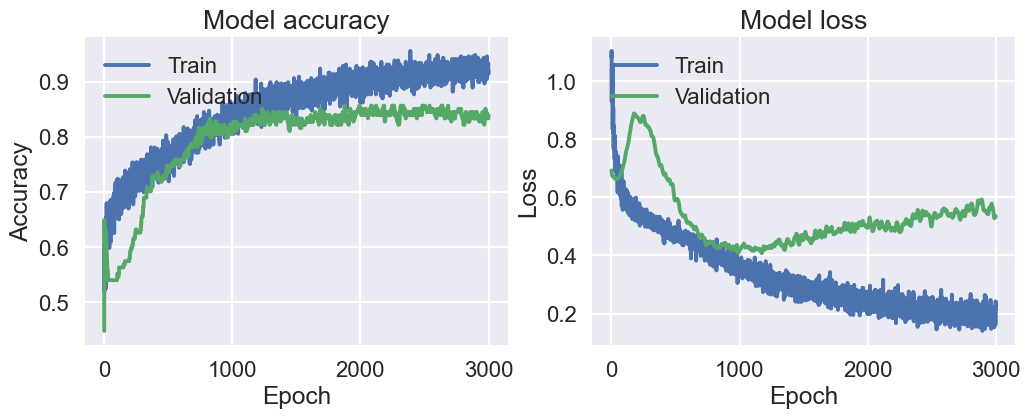

In [62]:
# Plotting training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [277]:
df

gender       age  hypertension  heart_disease  ever_married  work_type  \
0         0 -1.116270             0              0             0          1   
1         1 -1.850519             0              0             0          1   
2         1  1.353474             0              0             1          1   
3         0 -0.048273             0              0             1          1   
4         1 -0.715771             1              0             1          1   
..      ...       ...           ...            ...           ...        ...   
396       0 -0.916021             0              0             1          1   
397       0 -0.382022             1              0             1          1   
398       1  1.153224             0              0             1          1   
399       1  0.352226             0              1             1          1   
400       1 -1.049521             0              0             0          0   

     avg_glucose_level       bmi  smoking_status  stroke  
0            -0.308358 -1.737639               2       0  
1            -0.801799  0.127691               2       0  
2             1.599561 -0.826333               2       0  
3            -0.171154 -0.555789               1       0  
4             1.111449  0.896606               3       0  
..                 ...       ...             ...     ...  
396           1.096035  2.078456               1       0  
397          -0.993048 -0.057418               0       1  
398           0.482707 -0.114375               1       1  
399           1.462928  0.967801               3       1  
400          -0.576677 -0.100136               3       0  

[401 rows x 10 columns]

In [279]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from keras.models import Model
from keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense, BatchNormalization, Input
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef, roc_auc_score
from sklearn.preprocessing import StandardScaler
import joblib


# Normalize data function
def normalize_data(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    joblib.dump(scaler, "norm.joblib")
    return X_scaled

# Assume df is your dataframe
# Splitting features and labels
X = df.drop('stroke', axis=1).values  # Drop the target variable 'stroke' to create the feature matrix X
y = df['stroke'].values  # Set the target variable 'stroke' as the label vector y

# Handling class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
sm = SMOTE(random_state=42)  # Initialize SMOTE with a fixed random state for reproducibility
X_res, y_res = sm.fit_resample(X, y)  # Apply SMOTE to balance the classes in the dataset

# Normalize the resampled data
X_res = normalize_data(X_res)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)  # Split 70% train, 30% test

seed = 42
np.random.seed(seed)

# Reshape data to fit into the CNN model (reshape to 3D)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # Reshape training data to (num_samples, num_features, 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)  # Reshape test data to (num_samples, num_features, 1)

# Input layer
input_layer = Input(shape=(X_train.shape[1], 1))

# First Conv Layer
x = Conv1D(64, 3, activation='relu')(input_layer)
x = BatchNormalization()(x)
if x.shape[1] // 2 > 0:
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.5)(x)

# Second Conv Layer
x = Conv1D(128, 3, activation='relu')(x)
x = BatchNormalization()(x)
if x.shape[1] // 2 > 0:
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.5)(x)

# Flatten and Dense layers
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='sigmoid')(x)

# Create Model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Compile the model with Adam optimizer, binary cross-entropy loss, and accuracy metric

# Implement EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [281]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense, BatchNormalization, Lambda
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef, roc_auc_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import joblib

# Normalize data function
def normalize_data(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    joblib.dump(scaler, "norm.joblib")
    return X_scaled

# Assume df is your dataframe
# Splitting features and labels
X = df.drop('stroke', axis=1).values  # Drop the target variable 'stroke' to create the feature matrix X
y = df['stroke'].values  # Set the target variable 'stroke' as the label vector y

# Handling class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
sm = SMOTE(random_state=42)  # Initialize SMOTE with a fixed random state for reproducibility
X_res, y_res = sm.fit_resample(X, y)  # Apply SMOTE to balance the classes in the dataset

# Normalize the resampled data
X_res = normalize_data(X_res)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)  # Split 70% train, 30% test

seed = 42
np.random.seed(seed)

# Reshape data to fit into the CNN model (reshape to 3D)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # Reshape training data to (num_samples, num_features, 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)  # Reshape test data to (num_samples, num_features, 1)

# Function to conditionally add a MaxPooling layer
def conditional_max_pooling(x):
    if x.shape[1] >= 2:
        x = MaxPooling1D(pool_size=2)(x)
        x = Dropout(0.5)(x)
    return x

# Build the CNN model dynamically
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(Lambda(conditional_max_pooling))

model.add(Conv1D(128, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Lambda(conditional_max_pooling))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Implement EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [282]:

history = model.fit(X_train, y_train, validation_data=(X_test,  y_test), epochs=3000, batch_size=512)


Epoch 1/3000
1/1 [==============================] - 2s 2s/step - loss: 0.9829 - accuracy: 0.5049 - val_loss: 0.6924 - val_accuracy: 0.4540
Epoch 2/3000
1/1 [==============================] - 0s 48ms/step - loss: 0.8186 - accuracy: 0.5172 - val_loss: 0.6827 - val_accuracy: 0.5747
Epoch 3/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.7850 - accuracy: 0.5788 - val_loss: 0.6749 - val_accuracy: 0.6724
Epoch 4/3000
1/1 [==============================] - 0s 50ms/step - loss: 0.7350 - accuracy: 0.6034 - val_loss: 0.6687 - val_accuracy: 0.6897
Epoch 5/3000
1/1 [==============================] - 0s 50ms/step - loss: 0.7373 - accuracy: 0.6281 - val_loss: 0.6642 - val_accuracy: 0.6897
Epoch 6/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.6864 - accuracy: 0.6404 - val_loss: 0.6609 - val_accuracy: 0.6954
Epoch 7/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.7207 - accuracy: 0.6158 - val_loss: 0.6585 - val_accuracy: 0.7184
Epoch 8/3000
1/

1/1 [==============================] - 0s 47ms/step - loss: 0.5725 - accuracy: 0.6921 - val_loss: 0.7753 - val_accuracy: 0.5575
Epoch 174/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.5592 - accuracy: 0.6995 - val_loss: 0.7760 - val_accuracy: 0.5575
Epoch 175/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.5785 - accuracy: 0.7167 - val_loss: 0.7760 - val_accuracy: 0.5575
Epoch 176/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.5845 - accuracy: 0.6921 - val_loss: 0.7760 - val_accuracy: 0.5575
Epoch 177/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.5635 - accuracy: 0.7143 - val_loss: 0.7761 - val_accuracy: 0.5575
Epoch 178/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.5675 - accuracy: 0.7291 - val_loss: 0.7764 - val_accuracy: 0.5632
Epoch 179/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.5313 - accuracy: 0.7192 - val_loss: 0.7763 - val_accuracy: 0.5690
Epoch 180/3000

1/1 [==============================] - 0s 44ms/step - loss: 0.5116 - accuracy: 0.7488 - val_loss: 0.7281 - val_accuracy: 0.6437
Epoch 288/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.5278 - accuracy: 0.6970 - val_loss: 0.7271 - val_accuracy: 0.6437
Epoch 289/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.5053 - accuracy: 0.7537 - val_loss: 0.7261 - val_accuracy: 0.6437
Epoch 290/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.5264 - accuracy: 0.7365 - val_loss: 0.7248 - val_accuracy: 0.6437
Epoch 291/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.5224 - accuracy: 0.7291 - val_loss: 0.7237 - val_accuracy: 0.6437
Epoch 292/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.5314 - accuracy: 0.7094 - val_loss: 0.7225 - val_accuracy: 0.6437
Epoch 293/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.4869 - accuracy: 0.7611 - val_loss: 0.7219 - val_accuracy: 0.6437
Epoch 294/3000

1/1 [==============================] - 0s 42ms/step - loss: 0.4696 - accuracy: 0.7586 - val_loss: 0.5835 - val_accuracy: 0.7069
Epoch 402/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.4745 - accuracy: 0.7586 - val_loss: 0.5826 - val_accuracy: 0.7011
Epoch 403/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.4327 - accuracy: 0.7857 - val_loss: 0.5813 - val_accuracy: 0.7069
Epoch 404/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.4928 - accuracy: 0.7562 - val_loss: 0.5799 - val_accuracy: 0.7069
Epoch 405/3000
1/1 [==============================] - 0s 56ms/step - loss: 0.4504 - accuracy: 0.7734 - val_loss: 0.5791 - val_accuracy: 0.7126
Epoch 406/3000
1/1 [==============================] - 0s 50ms/step - loss: 0.4665 - accuracy: 0.8005 - val_loss: 0.5779 - val_accuracy: 0.7126
Epoch 407/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.4682 - accuracy: 0.7414 - val_loss: 0.5766 - val_accuracy: 0.7126
Epoch 408/3000

1/1 [==============================] - 0s 41ms/step - loss: 0.4340 - accuracy: 0.7833 - val_loss: 0.4956 - val_accuracy: 0.7701
Epoch 516/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.4517 - accuracy: 0.7783 - val_loss: 0.4945 - val_accuracy: 0.7759
Epoch 517/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.4409 - accuracy: 0.7980 - val_loss: 0.4937 - val_accuracy: 0.7759
Epoch 518/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.4562 - accuracy: 0.7635 - val_loss: 0.4932 - val_accuracy: 0.7759
Epoch 519/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.4053 - accuracy: 0.8202 - val_loss: 0.4928 - val_accuracy: 0.7759
Epoch 520/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.4671 - accuracy: 0.7586 - val_loss: 0.4926 - val_accuracy: 0.7759
Epoch 521/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.4293 - accuracy: 0.7833 - val_loss: 0.4921 - val_accuracy: 0.7701
Epoch 522/3000

1/1 [==============================] - 0s 150ms/step - loss: 0.3960 - accuracy: 0.8005 - val_loss: 0.4636 - val_accuracy: 0.7931
Epoch 630/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.4077 - accuracy: 0.8103 - val_loss: 0.4635 - val_accuracy: 0.7931
Epoch 631/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.4043 - accuracy: 0.8128 - val_loss: 0.4635 - val_accuracy: 0.7874
Epoch 632/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.4060 - accuracy: 0.8054 - val_loss: 0.4633 - val_accuracy: 0.7816
Epoch 633/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.4425 - accuracy: 0.7906 - val_loss: 0.4630 - val_accuracy: 0.7816
Epoch 634/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.3702 - accuracy: 0.8300 - val_loss: 0.4628 - val_accuracy: 0.7874
Epoch 635/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.4249 - accuracy: 0.8227 - val_loss: 0.4630 - val_accuracy: 0.7874
Epoch 636/300

1/1 [==============================] - 0s 41ms/step - loss: 0.3588 - accuracy: 0.8399 - val_loss: 0.4579 - val_accuracy: 0.8103
Epoch 744/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.3859 - accuracy: 0.8177 - val_loss: 0.4584 - val_accuracy: 0.8103
Epoch 745/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.3692 - accuracy: 0.8448 - val_loss: 0.4591 - val_accuracy: 0.8161
Epoch 746/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.3399 - accuracy: 0.8424 - val_loss: 0.4599 - val_accuracy: 0.8161
Epoch 747/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.3860 - accuracy: 0.8227 - val_loss: 0.4605 - val_accuracy: 0.8103
Epoch 748/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.3892 - accuracy: 0.8030 - val_loss: 0.4608 - val_accuracy: 0.8103
Epoch 749/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.3965 - accuracy: 0.8153 - val_loss: 0.4607 - val_accuracy: 0.8161
Epoch 750/3000

1/1 [==============================] - 0s 43ms/step - loss: 0.3652 - accuracy: 0.8399 - val_loss: 0.4516 - val_accuracy: 0.8161
Epoch 858/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.3866 - accuracy: 0.8128 - val_loss: 0.4520 - val_accuracy: 0.8161
Epoch 859/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.3673 - accuracy: 0.8399 - val_loss: 0.4523 - val_accuracy: 0.8161
Epoch 860/3000
1/1 [==============================] - 0s 47ms/step - loss: 0.3532 - accuracy: 0.8424 - val_loss: 0.4527 - val_accuracy: 0.8218
Epoch 861/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.3633 - accuracy: 0.8325 - val_loss: 0.4532 - val_accuracy: 0.8218
Epoch 862/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.3587 - accuracy: 0.8473 - val_loss: 0.4534 - val_accuracy: 0.8218
Epoch 863/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.3527 - accuracy: 0.8399 - val_loss: 0.4533 - val_accuracy: 0.8161
Epoch 864/3000

1/1 [==============================] - 0s 49ms/step - loss: 0.3455 - accuracy: 0.8596 - val_loss: 0.4526 - val_accuracy: 0.8333
Epoch 972/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.3322 - accuracy: 0.8498 - val_loss: 0.4531 - val_accuracy: 0.8333
Epoch 973/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.3347 - accuracy: 0.8522 - val_loss: 0.4535 - val_accuracy: 0.8333
Epoch 974/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.3489 - accuracy: 0.8547 - val_loss: 0.4537 - val_accuracy: 0.8333
Epoch 975/3000
1/1 [==============================] - 0s 58ms/step - loss: 0.3377 - accuracy: 0.8498 - val_loss: 0.4535 - val_accuracy: 0.8333
Epoch 976/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.3269 - accuracy: 0.8621 - val_loss: 0.4534 - val_accuracy: 0.8391
Epoch 977/3000
1/1 [==============================] - 0s 51ms/step - loss: 0.3318 - accuracy: 0.8473 - val_loss: 0.4536 - val_accuracy: 0.8391
Epoch 978/3000

1/1 [==============================] - 0s 43ms/step - loss: 0.3348 - accuracy: 0.8596 - val_loss: 0.4597 - val_accuracy: 0.8103
Epoch 1086/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.3403 - accuracy: 0.8473 - val_loss: 0.4596 - val_accuracy: 0.8046
Epoch 1087/3000
1/1 [==============================] - 0s 51ms/step - loss: 0.3223 - accuracy: 0.8596 - val_loss: 0.4593 - val_accuracy: 0.8046
Epoch 1088/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.2995 - accuracy: 0.8596 - val_loss: 0.4591 - val_accuracy: 0.8046
Epoch 1089/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.3138 - accuracy: 0.8473 - val_loss: 0.4594 - val_accuracy: 0.8046
Epoch 1090/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.3201 - accuracy: 0.8645 - val_loss: 0.4603 - val_accuracy: 0.8046
Epoch 1091/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.2854 - accuracy: 0.8719 - val_loss: 0.4617 - val_accuracy: 0.8046
Epoch 10

1/1 [==============================] - 0s 41ms/step - loss: 0.2866 - accuracy: 0.8695 - val_loss: 0.4681 - val_accuracy: 0.8276
Epoch 1143/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.3281 - accuracy: 0.8547 - val_loss: 0.4691 - val_accuracy: 0.8276
Epoch 1144/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.2847 - accuracy: 0.8818 - val_loss: 0.4703 - val_accuracy: 0.8276
Epoch 1145/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.2924 - accuracy: 0.8670 - val_loss: 0.4713 - val_accuracy: 0.8276
Epoch 1146/3000
1/1 [==============================] - 0s 47ms/step - loss: 0.3068 - accuracy: 0.8670 - val_loss: 0.4726 - val_accuracy: 0.8276
Epoch 1147/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.2871 - accuracy: 0.8670 - val_loss: 0.4733 - val_accuracy: 0.8218
Epoch 1148/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.3234 - accuracy: 0.8522 - val_loss: 0.4741 - val_accuracy: 0.8218
Epoch 11

1/1 [==============================] - 0s 44ms/step - loss: 0.3194 - accuracy: 0.8670 - val_loss: 0.4760 - val_accuracy: 0.8276
Epoch 1200/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.3263 - accuracy: 0.8596 - val_loss: 0.4758 - val_accuracy: 0.8276
Epoch 1201/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.3200 - accuracy: 0.8719 - val_loss: 0.4757 - val_accuracy: 0.8276
Epoch 1202/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.2923 - accuracy: 0.8547 - val_loss: 0.4759 - val_accuracy: 0.8218
Epoch 1203/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.3162 - accuracy: 0.8473 - val_loss: 0.4760 - val_accuracy: 0.8276
Epoch 1204/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.3021 - accuracy: 0.8695 - val_loss: 0.4765 - val_accuracy: 0.8276
Epoch 1205/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2809 - accuracy: 0.8793 - val_loss: 0.4767 - val_accuracy: 0.8276
Epoch 12

1/1 [==============================] - 0s 42ms/step - loss: 0.2781 - accuracy: 0.8695 - val_loss: 0.4812 - val_accuracy: 0.8448
Epoch 1257/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.3111 - accuracy: 0.8645 - val_loss: 0.4803 - val_accuracy: 0.8448
Epoch 1258/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2596 - accuracy: 0.8941 - val_loss: 0.4800 - val_accuracy: 0.8448
Epoch 1259/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2634 - accuracy: 0.8867 - val_loss: 0.4798 - val_accuracy: 0.8448
Epoch 1260/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.2632 - accuracy: 0.8867 - val_loss: 0.4797 - val_accuracy: 0.8448
Epoch 1261/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.3026 - accuracy: 0.8695 - val_loss: 0.4810 - val_accuracy: 0.8448
Epoch 1262/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.2925 - accuracy: 0.8645 - val_loss: 0.4826 - val_accuracy: 0.8448
Epoch 12

1/1 [==============================] - 0s 54ms/step - loss: 0.2780 - accuracy: 0.8670 - val_loss: 0.5010 - val_accuracy: 0.8218
Epoch 1314/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.2845 - accuracy: 0.8818 - val_loss: 0.5001 - val_accuracy: 0.8218
Epoch 1315/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2830 - accuracy: 0.8768 - val_loss: 0.4987 - val_accuracy: 0.8218
Epoch 1316/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.2855 - accuracy: 0.8522 - val_loss: 0.4966 - val_accuracy: 0.8218
Epoch 1317/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.2888 - accuracy: 0.8768 - val_loss: 0.4953 - val_accuracy: 0.8276
Epoch 1318/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2906 - accuracy: 0.8670 - val_loss: 0.4941 - val_accuracy: 0.8276
Epoch 1319/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2650 - accuracy: 0.8916 - val_loss: 0.4931 - val_accuracy: 0.8333
Epoch 13

1/1 [==============================] - 0s 42ms/step - loss: 0.2552 - accuracy: 0.8916 - val_loss: 0.4913 - val_accuracy: 0.8333
Epoch 1371/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.2734 - accuracy: 0.8867 - val_loss: 0.4911 - val_accuracy: 0.8276
Epoch 1372/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2824 - accuracy: 0.8768 - val_loss: 0.4910 - val_accuracy: 0.8276
Epoch 1373/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.2586 - accuracy: 0.8867 - val_loss: 0.4910 - val_accuracy: 0.8276
Epoch 1374/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2985 - accuracy: 0.8645 - val_loss: 0.4909 - val_accuracy: 0.8276
Epoch 1375/3000
1/1 [==============================] - 0s 55ms/step - loss: 0.2649 - accuracy: 0.8867 - val_loss: 0.4907 - val_accuracy: 0.8276
Epoch 1376/3000
1/1 [==============================] - 0s 63ms/step - loss: 0.2937 - accuracy: 0.8719 - val_loss: 0.4910 - val_accuracy: 0.8333
Epoch 13

1/1 [==============================] - 0s 44ms/step - loss: 0.2590 - accuracy: 0.8990 - val_loss: 0.4954 - val_accuracy: 0.8448
Epoch 1428/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2603 - accuracy: 0.8916 - val_loss: 0.4960 - val_accuracy: 0.8448
Epoch 1429/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.2754 - accuracy: 0.8744 - val_loss: 0.4963 - val_accuracy: 0.8448
Epoch 1430/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2854 - accuracy: 0.8719 - val_loss: 0.4967 - val_accuracy: 0.8448
Epoch 1431/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.2973 - accuracy: 0.8842 - val_loss: 0.4968 - val_accuracy: 0.8448
Epoch 1432/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.2968 - accuracy: 0.8571 - val_loss: 0.4964 - val_accuracy: 0.8448
Epoch 1433/3000
1/1 [==============================] - 0s 77ms/step - loss: 0.2742 - accuracy: 0.8916 - val_loss: 0.4964 - val_accuracy: 0.8448
Epoch 14

Epoch 1484/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.2735 - accuracy: 0.8966 - val_loss: 0.5054 - val_accuracy: 0.8391
Epoch 1485/3000
1/1 [==============================] - 0s 66ms/step - loss: 0.2873 - accuracy: 0.8768 - val_loss: 0.5029 - val_accuracy: 0.8391
Epoch 1486/3000
1/1 [==============================] - 0s 77ms/step - loss: 0.2921 - accuracy: 0.8842 - val_loss: 0.5015 - val_accuracy: 0.8448
Epoch 1487/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.2853 - accuracy: 0.8719 - val_loss: 0.5006 - val_accuracy: 0.8448
Epoch 1488/3000
1/1 [==============================] - 0s 55ms/step - loss: 0.2661 - accuracy: 0.8916 - val_loss: 0.4995 - val_accuracy: 0.8448
Epoch 1489/3000
1/1 [==============================] - 0s 47ms/step - loss: 0.2778 - accuracy: 0.8892 - val_loss: 0.4998 - val_accuracy: 0.8448
Epoch 1490/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.2911 - accuracy: 0.8621 - val_loss: 0.5004 - val_accuracy:

Epoch 1541/3000
1/1 [==============================] - 0s 51ms/step - loss: 0.2330 - accuracy: 0.8966 - val_loss: 0.5128 - val_accuracy: 0.8621
Epoch 1542/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.2530 - accuracy: 0.8842 - val_loss: 0.5136 - val_accuracy: 0.8621
Epoch 1543/3000
1/1 [==============================] - 0s 50ms/step - loss: 0.2457 - accuracy: 0.9089 - val_loss: 0.5145 - val_accuracy: 0.8621
Epoch 1544/3000
1/1 [==============================] - 0s 65ms/step - loss: 0.2444 - accuracy: 0.8867 - val_loss: 0.5158 - val_accuracy: 0.8621
Epoch 1545/3000
1/1 [==============================] - 0s 72ms/step - loss: 0.2299 - accuracy: 0.9039 - val_loss: 0.5158 - val_accuracy: 0.8621
Epoch 1546/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.2707 - accuracy: 0.8892 - val_loss: 0.5163 - val_accuracy: 0.8621
Epoch 1547/3000
1/1 [==============================] - 0s 58ms/step - loss: 0.2353 - accuracy: 0.9113 - val_loss: 0.5161 - val_accuracy:

Epoch 1598/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.2858 - accuracy: 0.8768 - val_loss: 0.5262 - val_accuracy: 0.8391
Epoch 1599/3000
1/1 [==============================] - 0s 53ms/step - loss: 0.2568 - accuracy: 0.8842 - val_loss: 0.5279 - val_accuracy: 0.8333
Epoch 1600/3000
1/1 [==============================] - 0s 50ms/step - loss: 0.2811 - accuracy: 0.8719 - val_loss: 0.5290 - val_accuracy: 0.8333
Epoch 1601/3000
1/1 [==============================] - 0s 53ms/step - loss: 0.2403 - accuracy: 0.8941 - val_loss: 0.5295 - val_accuracy: 0.8333
Epoch 1602/3000
1/1 [==============================] - 0s 53ms/step - loss: 0.2149 - accuracy: 0.9089 - val_loss: 0.5293 - val_accuracy: 0.8333
Epoch 1603/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.2137 - accuracy: 0.9039 - val_loss: 0.5289 - val_accuracy: 0.8333
Epoch 1604/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.2604 - accuracy: 0.8916 - val_loss: 0.5282 - val_accuracy:

Epoch 1655/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.2346 - accuracy: 0.8990 - val_loss: 0.5230 - val_accuracy: 0.8506
Epoch 1656/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.2361 - accuracy: 0.9039 - val_loss: 0.5203 - val_accuracy: 0.8506
Epoch 1657/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.2576 - accuracy: 0.8793 - val_loss: 0.5182 - val_accuracy: 0.8506
Epoch 1658/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.2375 - accuracy: 0.9015 - val_loss: 0.5163 - val_accuracy: 0.8506
Epoch 1659/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.2231 - accuracy: 0.9163 - val_loss: 0.5147 - val_accuracy: 0.8506
Epoch 1660/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.2399 - accuracy: 0.8867 - val_loss: 0.5126 - val_accuracy: 0.8506
Epoch 1661/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.2475 - accuracy: 0.8990 - val_loss: 0.5115 - val_accuracy:

Epoch 1712/3000
1/1 [==============================] - 0s 48ms/step - loss: 0.2145 - accuracy: 0.9163 - val_loss: 0.5452 - val_accuracy: 0.8391
Epoch 1713/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.2396 - accuracy: 0.8990 - val_loss: 0.5461 - val_accuracy: 0.8391
Epoch 1714/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.2523 - accuracy: 0.8892 - val_loss: 0.5464 - val_accuracy: 0.8391
Epoch 1715/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.2071 - accuracy: 0.9039 - val_loss: 0.5464 - val_accuracy: 0.8391
Epoch 1716/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.2609 - accuracy: 0.8842 - val_loss: 0.5463 - val_accuracy: 0.8391
Epoch 1717/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.2528 - accuracy: 0.8867 - val_loss: 0.5451 - val_accuracy: 0.8391
Epoch 1718/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.2393 - accuracy: 0.8990 - val_loss: 0.5429 - val_accuracy:

Epoch 1769/3000
1/1 [==============================] - 0s 55ms/step - loss: 0.2575 - accuracy: 0.8941 - val_loss: 0.5446 - val_accuracy: 0.8621
Epoch 1770/3000
1/1 [==============================] - 0s 56ms/step - loss: 0.2078 - accuracy: 0.9236 - val_loss: 0.5450 - val_accuracy: 0.8563
Epoch 1771/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.2485 - accuracy: 0.8867 - val_loss: 0.5451 - val_accuracy: 0.8563
Epoch 1772/3000
1/1 [==============================] - 0s 47ms/step - loss: 0.2327 - accuracy: 0.9064 - val_loss: 0.5459 - val_accuracy: 0.8506
Epoch 1773/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.2459 - accuracy: 0.9138 - val_loss: 0.5466 - val_accuracy: 0.8506
Epoch 1774/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.2669 - accuracy: 0.8842 - val_loss: 0.5468 - val_accuracy: 0.8506
Epoch 1775/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.2585 - accuracy: 0.9039 - val_loss: 0.5471 - val_accuracy:

Epoch 1826/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.2592 - accuracy: 0.8842 - val_loss: 0.5432 - val_accuracy: 0.8391
Epoch 1827/3000
1/1 [==============================] - 0s 53ms/step - loss: 0.2162 - accuracy: 0.9113 - val_loss: 0.5450 - val_accuracy: 0.8391
Epoch 1828/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.2685 - accuracy: 0.8892 - val_loss: 0.5447 - val_accuracy: 0.8391
Epoch 1829/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.2368 - accuracy: 0.9039 - val_loss: 0.5432 - val_accuracy: 0.8391
Epoch 1830/3000
1/1 [==============================] - 0s 47ms/step - loss: 0.2105 - accuracy: 0.9138 - val_loss: 0.5411 - val_accuracy: 0.8391
Epoch 1831/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.2684 - accuracy: 0.8768 - val_loss: 0.5390 - val_accuracy: 0.8333
Epoch 1832/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.2235 - accuracy: 0.9187 - val_loss: 0.5373 - val_accuracy:

Epoch 1883/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.2249 - accuracy: 0.8990 - val_loss: 0.5570 - val_accuracy: 0.8506
Epoch 1884/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2272 - accuracy: 0.8892 - val_loss: 0.5556 - val_accuracy: 0.8506
Epoch 1885/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2207 - accuracy: 0.8966 - val_loss: 0.5539 - val_accuracy: 0.8563
Epoch 1886/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2193 - accuracy: 0.9138 - val_loss: 0.5525 - val_accuracy: 0.8563
Epoch 1887/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.2750 - accuracy: 0.8818 - val_loss: 0.5506 - val_accuracy: 0.8563
Epoch 1888/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.2269 - accuracy: 0.9089 - val_loss: 0.5489 - val_accuracy: 0.8563
Epoch 1889/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.2193 - accuracy: 0.9113 - val_loss: 0.5464 - val_accuracy:

Epoch 1940/3000
1/1 [==============================] - 0s 72ms/step - loss: 0.2005 - accuracy: 0.9138 - val_loss: 0.5548 - val_accuracy: 0.8506
Epoch 1941/3000
1/1 [==============================] - 0s 76ms/step - loss: 0.1996 - accuracy: 0.9113 - val_loss: 0.5548 - val_accuracy: 0.8506
Epoch 1942/3000
1/1 [==============================] - 0s 59ms/step - loss: 0.2166 - accuracy: 0.9064 - val_loss: 0.5545 - val_accuracy: 0.8506
Epoch 1943/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.2120 - accuracy: 0.9039 - val_loss: 0.5543 - val_accuracy: 0.8506
Epoch 1944/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.2313 - accuracy: 0.8842 - val_loss: 0.5538 - val_accuracy: 0.8506
Epoch 1945/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.2300 - accuracy: 0.8941 - val_loss: 0.5530 - val_accuracy: 0.8506
Epoch 1946/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.2194 - accuracy: 0.9163 - val_loss: 0.5534 - val_accuracy:

Epoch 1997/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.1980 - accuracy: 0.9236 - val_loss: 0.5392 - val_accuracy: 0.8621
Epoch 1998/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2073 - accuracy: 0.9236 - val_loss: 0.5422 - val_accuracy: 0.8621
Epoch 1999/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.1874 - accuracy: 0.9138 - val_loss: 0.5449 - val_accuracy: 0.8563
Epoch 2000/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2331 - accuracy: 0.8990 - val_loss: 0.5470 - val_accuracy: 0.8506
Epoch 2001/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.2180 - accuracy: 0.9015 - val_loss: 0.5482 - val_accuracy: 0.8506
Epoch 2002/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.1628 - accuracy: 0.9335 - val_loss: 0.5496 - val_accuracy: 0.8506
Epoch 2003/3000
1/1 [==============================] - 0s 55ms/step - loss: 0.2251 - accuracy: 0.8941 - val_loss: 0.5506 - val_accuracy:

Epoch 2054/3000
1/1 [==============================] - 0s 55ms/step - loss: 0.2417 - accuracy: 0.9039 - val_loss: 0.5654 - val_accuracy: 0.8563
Epoch 2055/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2278 - accuracy: 0.9138 - val_loss: 0.5614 - val_accuracy: 0.8563
Epoch 2056/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.1890 - accuracy: 0.9335 - val_loss: 0.5587 - val_accuracy: 0.8563
Epoch 2057/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.2529 - accuracy: 0.8842 - val_loss: 0.5569 - val_accuracy: 0.8506
Epoch 2058/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.2212 - accuracy: 0.9113 - val_loss: 0.5553 - val_accuracy: 0.8506
Epoch 2059/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.1906 - accuracy: 0.9212 - val_loss: 0.5544 - val_accuracy: 0.8506
Epoch 2060/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.2249 - accuracy: 0.9064 - val_loss: 0.5538 - val_accuracy:

Epoch 2111/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.2255 - accuracy: 0.9163 - val_loss: 0.5584 - val_accuracy: 0.8621
Epoch 2112/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2065 - accuracy: 0.8966 - val_loss: 0.5581 - val_accuracy: 0.8621
Epoch 2113/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.2205 - accuracy: 0.8966 - val_loss: 0.5570 - val_accuracy: 0.8621
Epoch 2114/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2076 - accuracy: 0.9310 - val_loss: 0.5560 - val_accuracy: 0.8621
Epoch 2115/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.2136 - accuracy: 0.9015 - val_loss: 0.5543 - val_accuracy: 0.8621
Epoch 2116/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.1760 - accuracy: 0.9310 - val_loss: 0.5523 - val_accuracy: 0.8621
Epoch 2117/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2403 - accuracy: 0.9039 - val_loss: 0.5494 - val_accuracy:

Epoch 2168/3000
1/1 [==============================] - 0s 51ms/step - loss: 0.1764 - accuracy: 0.9261 - val_loss: 0.5544 - val_accuracy: 0.8563
Epoch 2169/3000
1/1 [==============================] - 0s 51ms/step - loss: 0.1892 - accuracy: 0.9212 - val_loss: 0.5522 - val_accuracy: 0.8563
Epoch 2170/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.1944 - accuracy: 0.9163 - val_loss: 0.5505 - val_accuracy: 0.8563
Epoch 2171/3000
1/1 [==============================] - 0s 48ms/step - loss: 0.2418 - accuracy: 0.8966 - val_loss: 0.5494 - val_accuracy: 0.8563
Epoch 2172/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.1965 - accuracy: 0.9261 - val_loss: 0.5485 - val_accuracy: 0.8563
Epoch 2173/3000
1/1 [==============================] - 0s 56ms/step - loss: 0.2165 - accuracy: 0.9212 - val_loss: 0.5482 - val_accuracy: 0.8563
Epoch 2174/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.2124 - accuracy: 0.9138 - val_loss: 0.5476 - val_accuracy:

Epoch 2225/3000
1/1 [==============================] - 0s 61ms/step - loss: 0.1644 - accuracy: 0.9310 - val_loss: 0.5666 - val_accuracy: 0.8678
Epoch 2226/3000
1/1 [==============================] - 0s 50ms/step - loss: 0.1930 - accuracy: 0.9187 - val_loss: 0.5668 - val_accuracy: 0.8678
Epoch 2227/3000
1/1 [==============================] - 0s 51ms/step - loss: 0.2202 - accuracy: 0.9187 - val_loss: 0.5667 - val_accuracy: 0.8678
Epoch 2228/3000
1/1 [==============================] - 0s 56ms/step - loss: 0.1497 - accuracy: 0.9458 - val_loss: 0.5662 - val_accuracy: 0.8678
Epoch 2229/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.2220 - accuracy: 0.9113 - val_loss: 0.5646 - val_accuracy: 0.8678
Epoch 2230/3000
1/1 [==============================] - 0s 51ms/step - loss: 0.2545 - accuracy: 0.8867 - val_loss: 0.5621 - val_accuracy: 0.8678
Epoch 2231/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.2276 - accuracy: 0.9113 - val_loss: 0.5581 - val_accuracy:

Epoch 2282/3000
1/1 [==============================] - 0s 51ms/step - loss: 0.1883 - accuracy: 0.9236 - val_loss: 0.5747 - val_accuracy: 0.8506
Epoch 2283/3000
1/1 [==============================] - 0s 53ms/step - loss: 0.1960 - accuracy: 0.9261 - val_loss: 0.5779 - val_accuracy: 0.8506
Epoch 2284/3000
1/1 [==============================] - 0s 53ms/step - loss: 0.1764 - accuracy: 0.9335 - val_loss: 0.5809 - val_accuracy: 0.8506
Epoch 2285/3000
1/1 [==============================] - 0s 51ms/step - loss: 0.2080 - accuracy: 0.9064 - val_loss: 0.5826 - val_accuracy: 0.8563
Epoch 2286/3000
1/1 [==============================] - 0s 56ms/step - loss: 0.2217 - accuracy: 0.9187 - val_loss: 0.5842 - val_accuracy: 0.8563
Epoch 2287/3000
1/1 [==============================] - 0s 59ms/step - loss: 0.1939 - accuracy: 0.9015 - val_loss: 0.5846 - val_accuracy: 0.8621
Epoch 2288/3000
1/1 [==============================] - 0s 55ms/step - loss: 0.1785 - accuracy: 0.9236 - val_loss: 0.5841 - val_accuracy:

Epoch 2339/3000
1/1 [==============================] - 0s 55ms/step - loss: 0.1711 - accuracy: 0.9360 - val_loss: 0.5776 - val_accuracy: 0.8736
Epoch 2340/3000
1/1 [==============================] - 0s 50ms/step - loss: 0.1942 - accuracy: 0.9212 - val_loss: 0.5780 - val_accuracy: 0.8736
Epoch 2341/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.2023 - accuracy: 0.9187 - val_loss: 0.5793 - val_accuracy: 0.8736
Epoch 2342/3000
1/1 [==============================] - 0s 50ms/step - loss: 0.1842 - accuracy: 0.9384 - val_loss: 0.5797 - val_accuracy: 0.8736
Epoch 2343/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.1935 - accuracy: 0.9163 - val_loss: 0.5807 - val_accuracy: 0.8736
Epoch 2344/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.1800 - accuracy: 0.9335 - val_loss: 0.5823 - val_accuracy: 0.8678
Epoch 2345/3000
1/1 [==============================] - 0s 50ms/step - loss: 0.1993 - accuracy: 0.9236 - val_loss: 0.5832 - val_accuracy:

Epoch 2396/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.2239 - accuracy: 0.9138 - val_loss: 0.6051 - val_accuracy: 0.8736
Epoch 2397/3000
1/1 [==============================] - 0s 50ms/step - loss: 0.1700 - accuracy: 0.9384 - val_loss: 0.6051 - val_accuracy: 0.8736
Epoch 2398/3000
1/1 [==============================] - 0s 50ms/step - loss: 0.1906 - accuracy: 0.9261 - val_loss: 0.6055 - val_accuracy: 0.8678
Epoch 2399/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.1937 - accuracy: 0.9187 - val_loss: 0.6055 - val_accuracy: 0.8678
Epoch 2400/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.1856 - accuracy: 0.9236 - val_loss: 0.6044 - val_accuracy: 0.8678
Epoch 2401/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.1712 - accuracy: 0.9236 - val_loss: 0.6028 - val_accuracy: 0.8678
Epoch 2402/3000
1/1 [==============================] - 0s 48ms/step - loss: 0.1996 - accuracy: 0.9286 - val_loss: 0.5994 - val_accuracy:

Epoch 2453/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.1883 - accuracy: 0.9163 - val_loss: 0.5804 - val_accuracy: 0.8793
Epoch 2454/3000
1/1 [==============================] - 0s 48ms/step - loss: 0.1404 - accuracy: 0.9384 - val_loss: 0.5816 - val_accuracy: 0.8793
Epoch 2455/3000
1/1 [==============================] - 0s 48ms/step - loss: 0.1729 - accuracy: 0.9335 - val_loss: 0.5814 - val_accuracy: 0.8793
Epoch 2456/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.1742 - accuracy: 0.9261 - val_loss: 0.5804 - val_accuracy: 0.8793
Epoch 2457/3000
1/1 [==============================] - 0s 48ms/step - loss: 0.1784 - accuracy: 0.9163 - val_loss: 0.5796 - val_accuracy: 0.8793
Epoch 2458/3000
1/1 [==============================] - 0s 51ms/step - loss: 0.1990 - accuracy: 0.9236 - val_loss: 0.5779 - val_accuracy: 0.8793
Epoch 2459/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.1808 - accuracy: 0.9163 - val_loss: 0.5761 - val_accuracy:

Epoch 2510/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.1786 - accuracy: 0.9236 - val_loss: 0.5929 - val_accuracy: 0.8736
Epoch 2511/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.1482 - accuracy: 0.9433 - val_loss: 0.5919 - val_accuracy: 0.8678
Epoch 2512/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.1686 - accuracy: 0.9360 - val_loss: 0.5907 - val_accuracy: 0.8678
Epoch 2513/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.1963 - accuracy: 0.9261 - val_loss: 0.5900 - val_accuracy: 0.8678
Epoch 2514/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.1690 - accuracy: 0.9335 - val_loss: 0.5887 - val_accuracy: 0.8678
Epoch 2515/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.1820 - accuracy: 0.9360 - val_loss: 0.5868 - val_accuracy: 0.8678
Epoch 2516/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.1490 - accuracy: 0.9557 - val_loss: 0.5854 - val_accuracy:

Epoch 2567/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.1818 - accuracy: 0.9138 - val_loss: 0.6099 - val_accuracy: 0.8678
Epoch 2568/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.1900 - accuracy: 0.9138 - val_loss: 0.6127 - val_accuracy: 0.8678
Epoch 2569/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.2105 - accuracy: 0.9064 - val_loss: 0.6155 - val_accuracy: 0.8678
Epoch 2570/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.1927 - accuracy: 0.8990 - val_loss: 0.6162 - val_accuracy: 0.8678
Epoch 2571/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.1777 - accuracy: 0.9261 - val_loss: 0.6172 - val_accuracy: 0.8621
Epoch 2572/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.1948 - accuracy: 0.9236 - val_loss: 0.6193 - val_accuracy: 0.8621
Epoch 2573/3000
1/1 [==============================] - 0s 48ms/step - loss: 0.1751 - accuracy: 0.9310 - val_loss: 0.6211 - val_accuracy:

Epoch 2624/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.2035 - accuracy: 0.9163 - val_loss: 0.5887 - val_accuracy: 0.8621
Epoch 2625/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.1675 - accuracy: 0.9360 - val_loss: 0.5873 - val_accuracy: 0.8678
Epoch 2626/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.1958 - accuracy: 0.9187 - val_loss: 0.5872 - val_accuracy: 0.8621
Epoch 2627/3000
1/1 [==============================] - 0s 48ms/step - loss: 0.1871 - accuracy: 0.9261 - val_loss: 0.5892 - val_accuracy: 0.8621
Epoch 2628/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.2085 - accuracy: 0.8990 - val_loss: 0.5921 - val_accuracy: 0.8621
Epoch 2629/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.1807 - accuracy: 0.9409 - val_loss: 0.5951 - val_accuracy: 0.8621
Epoch 2630/3000
1/1 [==============================] - 0s 69ms/step - loss: 0.1886 - accuracy: 0.9138 - val_loss: 0.5979 - val_accuracy:

Epoch 2681/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.1828 - accuracy: 0.9261 - val_loss: 0.6173 - val_accuracy: 0.8678
Epoch 2682/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.1938 - accuracy: 0.9163 - val_loss: 0.6164 - val_accuracy: 0.8678
Epoch 2683/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.1756 - accuracy: 0.9212 - val_loss: 0.6156 - val_accuracy: 0.8678
Epoch 2684/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.2127 - accuracy: 0.9113 - val_loss: 0.6152 - val_accuracy: 0.8736
Epoch 2685/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.1664 - accuracy: 0.9458 - val_loss: 0.6158 - val_accuracy: 0.8736
Epoch 2686/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.1954 - accuracy: 0.9187 - val_loss: 0.6170 - val_accuracy: 0.8678
Epoch 2687/3000
1/1 [==============================] - 0s 47ms/step - loss: 0.1984 - accuracy: 0.9113 - val_loss: 0.6176 - val_accuracy:

Epoch 2738/3000
1/1 [==============================] - 0s 50ms/step - loss: 0.1646 - accuracy: 0.9360 - val_loss: 0.6197 - val_accuracy: 0.8678
Epoch 2739/3000
1/1 [==============================] - 0s 51ms/step - loss: 0.1371 - accuracy: 0.9458 - val_loss: 0.6201 - val_accuracy: 0.8678
Epoch 2740/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.1758 - accuracy: 0.9212 - val_loss: 0.6212 - val_accuracy: 0.8621
Epoch 2741/3000
1/1 [==============================] - 0s 48ms/step - loss: 0.2070 - accuracy: 0.9212 - val_loss: 0.6215 - val_accuracy: 0.8621
Epoch 2742/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.1468 - accuracy: 0.9310 - val_loss: 0.6219 - val_accuracy: 0.8621
Epoch 2743/3000
1/1 [==============================] - 0s 47ms/step - loss: 0.2090 - accuracy: 0.9187 - val_loss: 0.6230 - val_accuracy: 0.8621
Epoch 2744/3000
1/1 [==============================] - 0s 50ms/step - loss: 0.1622 - accuracy: 0.9335 - val_loss: 0.6240 - val_accuracy:

Epoch 2795/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.1724 - accuracy: 0.9360 - val_loss: 0.6210 - val_accuracy: 0.8736
Epoch 2796/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.1519 - accuracy: 0.9360 - val_loss: 0.6191 - val_accuracy: 0.8736
Epoch 2797/3000
1/1 [==============================] - 0s 47ms/step - loss: 0.1335 - accuracy: 0.9433 - val_loss: 0.6167 - val_accuracy: 0.8736
Epoch 2798/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.1677 - accuracy: 0.9212 - val_loss: 0.6141 - val_accuracy: 0.8736
Epoch 2799/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.1441 - accuracy: 0.9384 - val_loss: 0.6120 - val_accuracy: 0.8793
Epoch 2800/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.2143 - accuracy: 0.9015 - val_loss: 0.6096 - val_accuracy: 0.8736
Epoch 2801/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.1694 - accuracy: 0.9310 - val_loss: 0.6081 - val_accuracy:

Epoch 2852/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.1244 - accuracy: 0.9483 - val_loss: 0.6528 - val_accuracy: 0.8621
Epoch 2853/3000
1/1 [==============================] - 0s 47ms/step - loss: 0.1908 - accuracy: 0.9236 - val_loss: 0.6513 - val_accuracy: 0.8621
Epoch 2854/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.2160 - accuracy: 0.9236 - val_loss: 0.6499 - val_accuracy: 0.8621
Epoch 2855/3000
1/1 [==============================] - 0s 47ms/step - loss: 0.1700 - accuracy: 0.9261 - val_loss: 0.6493 - val_accuracy: 0.8621
Epoch 2856/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.1477 - accuracy: 0.9433 - val_loss: 0.6491 - val_accuracy: 0.8621
Epoch 2857/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.1578 - accuracy: 0.9384 - val_loss: 0.6491 - val_accuracy: 0.8621
Epoch 2858/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.1595 - accuracy: 0.9360 - val_loss: 0.6476 - val_accuracy:

Epoch 2909/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.1753 - accuracy: 0.9261 - val_loss: 0.6455 - val_accuracy: 0.8506
Epoch 2910/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.1723 - accuracy: 0.9286 - val_loss: 0.6466 - val_accuracy: 0.8563
Epoch 2911/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.1564 - accuracy: 0.9310 - val_loss: 0.6475 - val_accuracy: 0.8563
Epoch 2912/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.1502 - accuracy: 0.9360 - val_loss: 0.6492 - val_accuracy: 0.8563
Epoch 2913/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.1669 - accuracy: 0.9286 - val_loss: 0.6508 - val_accuracy: 0.8563
Epoch 2914/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.1643 - accuracy: 0.9360 - val_loss: 0.6527 - val_accuracy: 0.8621
Epoch 2915/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.1427 - accuracy: 0.9507 - val_loss: 0.6548 - val_accuracy:

Epoch 2966/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.1704 - accuracy: 0.9286 - val_loss: 0.6527 - val_accuracy: 0.8506
Epoch 2967/3000
1/1 [==============================] - 0s 51ms/step - loss: 0.1976 - accuracy: 0.9187 - val_loss: 0.6535 - val_accuracy: 0.8506
Epoch 2968/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.1451 - accuracy: 0.9384 - val_loss: 0.6547 - val_accuracy: 0.8506
Epoch 2969/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.1706 - accuracy: 0.9335 - val_loss: 0.6559 - val_accuracy: 0.8506
Epoch 2970/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2040 - accuracy: 0.9310 - val_loss: 0.6566 - val_accuracy: 0.8506
Epoch 2971/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.1524 - accuracy: 0.9360 - val_loss: 0.6583 - val_accuracy: 0.8506
Epoch 2972/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.1832 - accuracy: 0.9335 - val_loss: 0.6584 - val_accuracy:

In [284]:
model.save('cnn.keras')

In [283]:

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)  # Evaluate the model on the test set
print(f"Test Accuracy: {test_accuracy}")

# Predict on the test set
y_pred = model.predict(X_test)  # Predict the probabilities for the test set
y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to binary class labels

# Calculate additional performance metrics
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
mcc = matthews_corrcoef(y_test, y_pred_classes)
roc_auc = roc_auc_score(y_test, y_pred)

# Print performance metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Matthews Correlation Coefficient: {mcc}")
print(f"ROC AUC Score: {roc_auc}")


6/6 [==============================] - 0s 3ms/step - loss: 0.9298 - accuracy: 0.8161
Test Accuracy: 0.8160919547080994
6/6 [==============================] - 0s 2ms/step
Precision: 0.803921568627451
Recall: 0.8723404255319149
F1 Score: 0.8367346938775511
Matthews Correlation Coefficient: 0.6297535127798599
ROC AUC Score: 0.8761968085106384


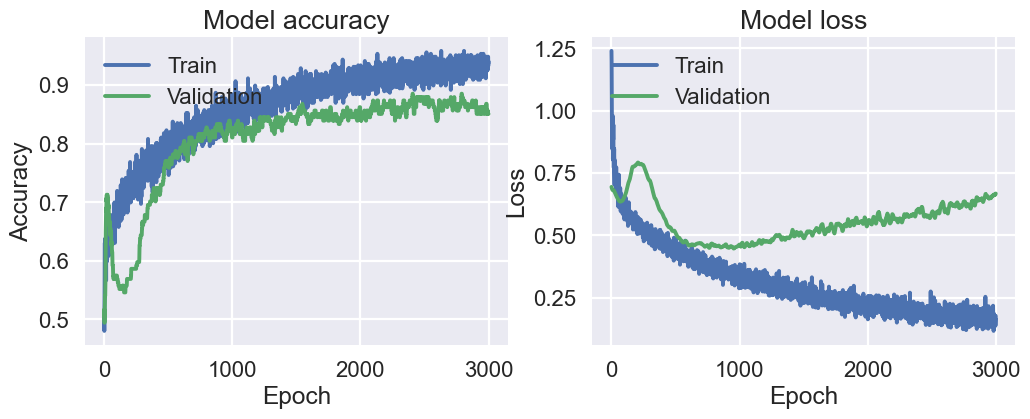

In [68]:
# Plotting training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
model.save('cnn.h5')

In [69]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense, BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef, roc_auc_score

# Normalize data function
def normalize_data(X):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

# Splitting features and labels
X = df.drop('stroke', axis=1).values  # Drop the target variable 'stroke' to create the feature matrix X
y = df['stroke'].values  # Set the target variable 'stroke' as the label vector y

# Handling class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
rus = RandomUnderSampler(random_state=seed)  # Initialize SMOTE with a fixed random state for reproducibility
X_res, y_res = rus.fit_resample(X, y)  # Apply SMOTE to balance the classes in the dataset

# Normalize the resampled data
X_res = normalize_data(X_res)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)  # Split 70% train, 30% test

seed = 42
np.random.seed(seed)

# Reshape data to fit into the CNN model (reshape to 3D)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # Reshape training data to (num_samples, num_features, 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)  # Reshape test data to (num_samples, num_features, 1)

# Build the CNN model
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)))  # Add a 1D convolutional layer with 64 filters and a kernel size of 3
model.add(BatchNormalization())
model.add(MaxPooling1D(2))  # Add a max pooling layer with a pool size of 2
model.add(Dropout(0.5))  # Add a dropout layer with a dropout rate of 0.5

model.add(Conv1D(128, 3, activation='relu'))  # Add another 1D convolutional layer with 128 filters and a kernel size of 3
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Flatten())  # Flatten the input
model.add(Dense(100, activation='relu'))  # Add a dense layer with 100 units and ReLU activation
model.add(Dropout(0.5))  # Add another dropout layer
model.add(Dense(1, activation='sigmoid'))  # Add a dense output layer with 1 unit and sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Compile the model with Adam optimizer, binary cross-entropy loss, and accuracy metric

# Implement EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [70]:

history = model.fit(X_train, y_train, validation_data=(X_test,  y_test), epochs=3000, batch_size=512)


Epoch 1/3000
1/1 [==============================] - 3s 3s/step - loss: 1.2813 - accuracy: 0.4903 - val_loss: 0.6881 - val_accuracy: 0.5224
Epoch 2/3000
1/1 [==============================] - 0s 54ms/step - loss: 1.1357 - accuracy: 0.5290 - val_loss: 0.6864 - val_accuracy: 0.5522
Epoch 3/3000
1/1 [==============================] - 0s 52ms/step - loss: 1.0790 - accuracy: 0.5613 - val_loss: 0.6857 - val_accuracy: 0.5672
Epoch 4/3000
1/1 [==============================] - 0s 49ms/step - loss: 1.0683 - accuracy: 0.5484 - val_loss: 0.6856 - val_accuracy: 0.6269
Epoch 5/3000
1/1 [==============================] - 0s 41ms/step - loss: 1.0592 - accuracy: 0.5742 - val_loss: 0.6863 - val_accuracy: 0.6119
Epoch 6/3000
1/1 [==============================] - 0s 43ms/step - loss: 1.0627 - accuracy: 0.5548 - val_loss: 0.6874 - val_accuracy: 0.6119
Epoch 7/3000
1/1 [==============================] - 0s 47ms/step - loss: 1.2251 - accuracy: 0.5355 - val_loss: 0.6885 - val_accuracy: 0.5373
Epoch 8/3000
1/

Epoch 59/3000
1/1 [==============================] - 0s 63ms/step - loss: 0.6853 - accuracy: 0.6516 - val_loss: 0.6951 - val_accuracy: 0.4776
Epoch 60/3000
1/1 [==============================] - 0s 65ms/step - loss: 0.6842 - accuracy: 0.6387 - val_loss: 0.6955 - val_accuracy: 0.4776
Epoch 61/3000
1/1 [==============================] - 0s 62ms/step - loss: 0.6700 - accuracy: 0.6387 - val_loss: 0.6958 - val_accuracy: 0.4776
Epoch 62/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.7109 - accuracy: 0.6903 - val_loss: 0.6960 - val_accuracy: 0.4776
Epoch 63/3000
1/1 [==============================] - 0s 72ms/step - loss: 0.6564 - accuracy: 0.6645 - val_loss: 0.6961 - val_accuracy: 0.4776
Epoch 64/3000
1/1 [==============================] - 0s 50ms/step - loss: 0.7257 - accuracy: 0.6710 - val_loss: 0.6963 - val_accuracy: 0.4776
Epoch 65/3000
1/1 [==============================] - 0s 48ms/step - loss: 0.7287 - accuracy: 0.6452 - val_loss: 0.6965 - val_accuracy: 0.4776
Epoch 

1/1 [==============================] - 0s 39ms/step - loss: 0.4956 - accuracy: 0.7484 - val_loss: 0.7053 - val_accuracy: 0.5224
Epoch 174/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.5227 - accuracy: 0.7290 - val_loss: 0.7056 - val_accuracy: 0.5224
Epoch 175/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.5115 - accuracy: 0.7548 - val_loss: 0.7059 - val_accuracy: 0.5224
Epoch 176/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.5991 - accuracy: 0.7226 - val_loss: 0.7061 - val_accuracy: 0.5224
Epoch 177/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.5844 - accuracy: 0.7161 - val_loss: 0.7062 - val_accuracy: 0.5224
Epoch 178/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.5486 - accuracy: 0.7161 - val_loss: 0.7063 - val_accuracy: 0.5224
Epoch 179/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.5596 - accuracy: 0.7161 - val_loss: 0.7064 - val_accuracy: 0.5224
Epoch 180/3000

1/1 [==============================] - 0s 44ms/step - loss: 0.4418 - accuracy: 0.8129 - val_loss: 0.7580 - val_accuracy: 0.5522
Epoch 288/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.5028 - accuracy: 0.7484 - val_loss: 0.7584 - val_accuracy: 0.5522
Epoch 289/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.4722 - accuracy: 0.7742 - val_loss: 0.7589 - val_accuracy: 0.5522
Epoch 290/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.4167 - accuracy: 0.8387 - val_loss: 0.7594 - val_accuracy: 0.5373
Epoch 291/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.4685 - accuracy: 0.7935 - val_loss: 0.7600 - val_accuracy: 0.5373
Epoch 292/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.4734 - accuracy: 0.7548 - val_loss: 0.7605 - val_accuracy: 0.5522
Epoch 293/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.5014 - accuracy: 0.7806 - val_loss: 0.7610 - val_accuracy: 0.5522
Epoch 294/3000

1/1 [==============================] - 0s 39ms/step - loss: 0.4629 - accuracy: 0.8065 - val_loss: 0.8677 - val_accuracy: 0.5224
Epoch 402/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.4033 - accuracy: 0.7935 - val_loss: 0.8694 - val_accuracy: 0.5224
Epoch 403/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.4045 - accuracy: 0.8452 - val_loss: 0.8714 - val_accuracy: 0.5224
Epoch 404/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.4221 - accuracy: 0.8194 - val_loss: 0.8731 - val_accuracy: 0.5224
Epoch 405/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.3903 - accuracy: 0.8129 - val_loss: 0.8752 - val_accuracy: 0.5224
Epoch 406/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.4321 - accuracy: 0.8323 - val_loss: 0.8775 - val_accuracy: 0.5224
Epoch 407/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.4483 - accuracy: 0.7355 - val_loss: 0.8797 - val_accuracy: 0.5224
Epoch 408/3000

1/1 [==============================] - 0s 40ms/step - loss: 0.3754 - accuracy: 0.8194 - val_loss: 1.1044 - val_accuracy: 0.5373
Epoch 516/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.3840 - accuracy: 0.8258 - val_loss: 1.1074 - val_accuracy: 0.5373
Epoch 517/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.3874 - accuracy: 0.8645 - val_loss: 1.1097 - val_accuracy: 0.5373
Epoch 518/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.3323 - accuracy: 0.8839 - val_loss: 1.1118 - val_accuracy: 0.5373
Epoch 519/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.4300 - accuracy: 0.7871 - val_loss: 1.1135 - val_accuracy: 0.5373
Epoch 520/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.4114 - accuracy: 0.8000 - val_loss: 1.1147 - val_accuracy: 0.5373
Epoch 521/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.3896 - accuracy: 0.8387 - val_loss: 1.1156 - val_accuracy: 0.5373
Epoch 522/3000

1/1 [==============================] - 0s 39ms/step - loss: 0.3724 - accuracy: 0.8323 - val_loss: 1.3058 - val_accuracy: 0.5224
Epoch 630/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.3543 - accuracy: 0.8516 - val_loss: 1.3084 - val_accuracy: 0.5224
Epoch 631/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.2872 - accuracy: 0.8968 - val_loss: 1.3121 - val_accuracy: 0.5224
Epoch 632/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.3807 - accuracy: 0.8387 - val_loss: 1.3159 - val_accuracy: 0.5224
Epoch 633/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.3314 - accuracy: 0.8516 - val_loss: 1.3188 - val_accuracy: 0.5224
Epoch 634/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.2887 - accuracy: 0.8645 - val_loss: 1.3226 - val_accuracy: 0.5373
Epoch 635/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.3046 - accuracy: 0.8581 - val_loss: 1.3272 - val_accuracy: 0.5373
Epoch 636/3000

1/1 [==============================] - 0s 49ms/step - loss: 0.2717 - accuracy: 0.8710 - val_loss: 1.6074 - val_accuracy: 0.5373
Epoch 744/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.3487 - accuracy: 0.8323 - val_loss: 1.6052 - val_accuracy: 0.5373
Epoch 745/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.2592 - accuracy: 0.8968 - val_loss: 1.6028 - val_accuracy: 0.5373
Epoch 746/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.3245 - accuracy: 0.8645 - val_loss: 1.5992 - val_accuracy: 0.5373
Epoch 747/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.3160 - accuracy: 0.8452 - val_loss: 1.5959 - val_accuracy: 0.5373
Epoch 748/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.3421 - accuracy: 0.8516 - val_loss: 1.5914 - val_accuracy: 0.5373
Epoch 749/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.3766 - accuracy: 0.8387 - val_loss: 1.5875 - val_accuracy: 0.5373
Epoch 750/3000

1/1 [==============================] - 0s 37ms/step - loss: 0.3088 - accuracy: 0.8516 - val_loss: 1.8333 - val_accuracy: 0.5224
Epoch 858/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.2881 - accuracy: 0.8774 - val_loss: 1.8404 - val_accuracy: 0.5224
Epoch 859/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.2392 - accuracy: 0.8968 - val_loss: 1.8452 - val_accuracy: 0.5224
Epoch 860/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.2699 - accuracy: 0.8903 - val_loss: 1.8492 - val_accuracy: 0.5224
Epoch 861/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.2866 - accuracy: 0.9290 - val_loss: 1.8504 - val_accuracy: 0.5224
Epoch 862/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.2284 - accuracy: 0.9032 - val_loss: 1.8505 - val_accuracy: 0.5224
Epoch 863/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.3346 - accuracy: 0.8323 - val_loss: 1.8498 - val_accuracy: 0.5224
Epoch 864/3000

1/1 [==============================] - 0s 39ms/step - loss: 0.2584 - accuracy: 0.9032 - val_loss: 1.9885 - val_accuracy: 0.5224
Epoch 972/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.2298 - accuracy: 0.8903 - val_loss: 1.9936 - val_accuracy: 0.5224
Epoch 973/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.2991 - accuracy: 0.8968 - val_loss: 1.9927 - val_accuracy: 0.5224
Epoch 974/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.2618 - accuracy: 0.9032 - val_loss: 1.9929 - val_accuracy: 0.5224
Epoch 975/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.3006 - accuracy: 0.8710 - val_loss: 1.9933 - val_accuracy: 0.5224
Epoch 976/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.3011 - accuracy: 0.8516 - val_loss: 1.9964 - val_accuracy: 0.5224
Epoch 977/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.2741 - accuracy: 0.8774 - val_loss: 1.9999 - val_accuracy: 0.5224
Epoch 978/3000

1/1 [==============================] - 0s 37ms/step - loss: 0.2336 - accuracy: 0.9032 - val_loss: 2.1431 - val_accuracy: 0.4776
Epoch 1086/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.2467 - accuracy: 0.9161 - val_loss: 2.1505 - val_accuracy: 0.4627
Epoch 1087/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.2864 - accuracy: 0.8774 - val_loss: 2.1572 - val_accuracy: 0.4627
Epoch 1088/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.2070 - accuracy: 0.9097 - val_loss: 2.1607 - val_accuracy: 0.4627
Epoch 1089/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.1969 - accuracy: 0.9226 - val_loss: 2.1645 - val_accuracy: 0.4627
Epoch 1090/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.2337 - accuracy: 0.9032 - val_loss: 2.1674 - val_accuracy: 0.4627
Epoch 1091/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.2172 - accuracy: 0.8903 - val_loss: 2.1711 - val_accuracy: 0.4627
Epoch 10

1/1 [==============================] - 0s 36ms/step - loss: 0.2817 - accuracy: 0.8581 - val_loss: 2.1366 - val_accuracy: 0.4925
Epoch 1143/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.2181 - accuracy: 0.9161 - val_loss: 2.1356 - val_accuracy: 0.4925
Epoch 1144/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.2350 - accuracy: 0.9097 - val_loss: 2.1352 - val_accuracy: 0.5075
Epoch 1145/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.1918 - accuracy: 0.9226 - val_loss: 2.1345 - val_accuracy: 0.5075
Epoch 1146/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.2617 - accuracy: 0.9097 - val_loss: 2.1264 - val_accuracy: 0.5224
Epoch 1147/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.2577 - accuracy: 0.8903 - val_loss: 2.1201 - val_accuracy: 0.5224
Epoch 1148/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.2575 - accuracy: 0.8710 - val_loss: 2.1136 - val_accuracy: 0.5224
Epoch 11

1/1 [==============================] - 0s 36ms/step - loss: 0.2504 - accuracy: 0.8903 - val_loss: 2.2115 - val_accuracy: 0.4925
Epoch 1200/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.2408 - accuracy: 0.8710 - val_loss: 2.2166 - val_accuracy: 0.4925
Epoch 1201/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.2252 - accuracy: 0.9226 - val_loss: 2.2204 - val_accuracy: 0.4925
Epoch 1202/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.2255 - accuracy: 0.9161 - val_loss: 2.2249 - val_accuracy: 0.4925
Epoch 1203/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.2198 - accuracy: 0.8903 - val_loss: 2.2281 - val_accuracy: 0.4925
Epoch 1204/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.2086 - accuracy: 0.9097 - val_loss: 2.2291 - val_accuracy: 0.4925
Epoch 1205/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.2119 - accuracy: 0.9290 - val_loss: 2.2291 - val_accuracy: 0.4925
Epoch 12

1/1 [==============================] - 0s 36ms/step - loss: 0.2096 - accuracy: 0.9032 - val_loss: 2.2004 - val_accuracy: 0.4776
Epoch 1257/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.2159 - accuracy: 0.9097 - val_loss: 2.1946 - val_accuracy: 0.4776
Epoch 1258/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.2761 - accuracy: 0.9097 - val_loss: 2.1936 - val_accuracy: 0.4776
Epoch 1259/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.1997 - accuracy: 0.9097 - val_loss: 2.1909 - val_accuracy: 0.4776
Epoch 1260/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.1874 - accuracy: 0.9290 - val_loss: 2.1870 - val_accuracy: 0.4776
Epoch 1261/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.2307 - accuracy: 0.9097 - val_loss: 2.1821 - val_accuracy: 0.4776
Epoch 1262/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.1472 - accuracy: 0.9355 - val_loss: 2.1842 - val_accuracy: 0.4776
Epoch 12

1/1 [==============================] - 0s 45ms/step - loss: 0.1941 - accuracy: 0.9419 - val_loss: 2.2566 - val_accuracy: 0.4925
Epoch 1314/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.2195 - accuracy: 0.9226 - val_loss: 2.2469 - val_accuracy: 0.4925
Epoch 1315/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.2553 - accuracy: 0.8839 - val_loss: 2.2377 - val_accuracy: 0.4925
Epoch 1316/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.1538 - accuracy: 0.9484 - val_loss: 2.2324 - val_accuracy: 0.4925
Epoch 1317/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.2058 - accuracy: 0.9097 - val_loss: 2.2299 - val_accuracy: 0.4925
Epoch 1318/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.2186 - accuracy: 0.9097 - val_loss: 2.2286 - val_accuracy: 0.4925
Epoch 1319/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.1500 - accuracy: 0.9355 - val_loss: 2.2285 - val_accuracy: 0.4925
Epoch 13

Epoch 1370/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.1743 - accuracy: 0.9161 - val_loss: 2.2877 - val_accuracy: 0.4925
Epoch 1371/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.1970 - accuracy: 0.9161 - val_loss: 2.2844 - val_accuracy: 0.4776
Epoch 1372/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.2028 - accuracy: 0.9161 - val_loss: 2.2848 - val_accuracy: 0.4776
Epoch 1373/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.1910 - accuracy: 0.9226 - val_loss: 2.2851 - val_accuracy: 0.4776
Epoch 1374/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.2382 - accuracy: 0.8774 - val_loss: 2.2898 - val_accuracy: 0.4776
Epoch 1375/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.1736 - accuracy: 0.9226 - val_loss: 2.2947 - val_accuracy: 0.4776
Epoch 1376/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.2031 - accuracy: 0.9161 - val_loss: 2.3022 - val_accuracy:

Epoch 1427/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.1624 - accuracy: 0.9355 - val_loss: 2.3569 - val_accuracy: 0.5075
Epoch 1428/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.2056 - accuracy: 0.9032 - val_loss: 2.3491 - val_accuracy: 0.5075
Epoch 1429/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.1746 - accuracy: 0.9355 - val_loss: 2.3437 - val_accuracy: 0.5075
Epoch 1430/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.2892 - accuracy: 0.9161 - val_loss: 2.3344 - val_accuracy: 0.5075
Epoch 1431/3000
1/1 [==============================] - 0s 48ms/step - loss: 0.1940 - accuracy: 0.9419 - val_loss: 2.3326 - val_accuracy: 0.5075
Epoch 1432/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.2499 - accuracy: 0.8774 - val_loss: 2.3321 - val_accuracy: 0.5075
Epoch 1433/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.1880 - accuracy: 0.9226 - val_loss: 2.3310 - val_accuracy:

Epoch 1484/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.1951 - accuracy: 0.9226 - val_loss: 2.3733 - val_accuracy: 0.5522
Epoch 1485/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.1716 - accuracy: 0.9290 - val_loss: 2.3708 - val_accuracy: 0.5522
Epoch 1486/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.1700 - accuracy: 0.9355 - val_loss: 2.3652 - val_accuracy: 0.5522
Epoch 1487/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.1660 - accuracy: 0.9355 - val_loss: 2.3623 - val_accuracy: 0.5522
Epoch 1488/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.2365 - accuracy: 0.8774 - val_loss: 2.3595 - val_accuracy: 0.5522
Epoch 1489/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.1402 - accuracy: 0.9419 - val_loss: 2.3599 - val_accuracy: 0.5522
Epoch 1490/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.1976 - accuracy: 0.9097 - val_loss: 2.3650 - val_accuracy:

Epoch 1541/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.1696 - accuracy: 0.9290 - val_loss: 2.4375 - val_accuracy: 0.4925
Epoch 1542/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.1591 - accuracy: 0.9419 - val_loss: 2.4316 - val_accuracy: 0.4925
Epoch 1543/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.1740 - accuracy: 0.9290 - val_loss: 2.4273 - val_accuracy: 0.4925
Epoch 1544/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.1636 - accuracy: 0.9290 - val_loss: 2.4244 - val_accuracy: 0.4925
Epoch 1545/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.1805 - accuracy: 0.9097 - val_loss: 2.4225 - val_accuracy: 0.4925
Epoch 1546/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.1861 - accuracy: 0.9484 - val_loss: 2.4196 - val_accuracy: 0.4925
Epoch 1547/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.1773 - accuracy: 0.9419 - val_loss: 2.4200 - val_accuracy:

Epoch 1598/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.2496 - accuracy: 0.9097 - val_loss: 2.4755 - val_accuracy: 0.5075
Epoch 1599/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.2307 - accuracy: 0.9032 - val_loss: 2.4852 - val_accuracy: 0.5075
Epoch 1600/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.2346 - accuracy: 0.9226 - val_loss: 2.5001 - val_accuracy: 0.5075
Epoch 1601/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.1550 - accuracy: 0.9419 - val_loss: 2.5120 - val_accuracy: 0.4925
Epoch 1602/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.2360 - accuracy: 0.9097 - val_loss: 2.5302 - val_accuracy: 0.4925
Epoch 1603/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.2150 - accuracy: 0.9161 - val_loss: 2.5444 - val_accuracy: 0.4776
Epoch 1604/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.2565 - accuracy: 0.8968 - val_loss: 2.5593 - val_accuracy:

Epoch 1655/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.1701 - accuracy: 0.9097 - val_loss: 2.4869 - val_accuracy: 0.5373
Epoch 1656/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.2329 - accuracy: 0.9355 - val_loss: 2.4875 - val_accuracy: 0.5224
Epoch 1657/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.2122 - accuracy: 0.9355 - val_loss: 2.4857 - val_accuracy: 0.5224
Epoch 1658/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.1789 - accuracy: 0.9097 - val_loss: 2.4877 - val_accuracy: 0.5224
Epoch 1659/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.1440 - accuracy: 0.9419 - val_loss: 2.4884 - val_accuracy: 0.5075
Epoch 1660/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.1869 - accuracy: 0.9226 - val_loss: 2.4946 - val_accuracy: 0.4925
Epoch 1661/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.2037 - accuracy: 0.9097 - val_loss: 2.5038 - val_accuracy:

Epoch 1712/3000
1/1 [==============================] - 0s 84ms/step - loss: 0.1549 - accuracy: 0.9484 - val_loss: 2.5664 - val_accuracy: 0.5075
Epoch 1713/3000
1/1 [==============================] - 0s 80ms/step - loss: 0.1603 - accuracy: 0.9355 - val_loss: 2.5822 - val_accuracy: 0.5075
Epoch 1714/3000
1/1 [==============================] - 0s 72ms/step - loss: 0.2279 - accuracy: 0.8968 - val_loss: 2.5934 - val_accuracy: 0.5075
Epoch 1715/3000
1/1 [==============================] - 0s 85ms/step - loss: 0.1858 - accuracy: 0.9355 - val_loss: 2.5976 - val_accuracy: 0.5075
Epoch 1716/3000
1/1 [==============================] - 0s 77ms/step - loss: 0.1989 - accuracy: 0.9161 - val_loss: 2.6007 - val_accuracy: 0.5224
Epoch 1717/3000
1/1 [==============================] - 0s 78ms/step - loss: 0.1765 - accuracy: 0.9419 - val_loss: 2.6017 - val_accuracy: 0.5075
Epoch 1718/3000
1/1 [==============================] - 0s 81ms/step - loss: 0.1879 - accuracy: 0.9613 - val_loss: 2.5991 - val_accuracy:

Epoch 1769/3000
1/1 [==============================] - 0s 99ms/step - loss: 0.1930 - accuracy: 0.9161 - val_loss: 2.6015 - val_accuracy: 0.5075
Epoch 1770/3000
1/1 [==============================] - 0s 103ms/step - loss: 0.1509 - accuracy: 0.9355 - val_loss: 2.5986 - val_accuracy: 0.5075
Epoch 1771/3000
1/1 [==============================] - 0s 101ms/step - loss: 0.1540 - accuracy: 0.9419 - val_loss: 2.5984 - val_accuracy: 0.5075
Epoch 1772/3000
1/1 [==============================] - 0s 108ms/step - loss: 0.2095 - accuracy: 0.9226 - val_loss: 2.5985 - val_accuracy: 0.5075
Epoch 1773/3000
1/1 [==============================] - 0s 104ms/step - loss: 0.1607 - accuracy: 0.9226 - val_loss: 2.5985 - val_accuracy: 0.5075
Epoch 1774/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.1095 - accuracy: 0.9742 - val_loss: 2.6002 - val_accuracy: 0.5075
Epoch 1775/3000
1/1 [==============================] - 0s 63ms/step - loss: 0.1645 - accuracy: 0.9355 - val_loss: 2.6032 - val_accur

Epoch 1826/3000
1/1 [==============================] - 0s 67ms/step - loss: 0.1826 - accuracy: 0.9355 - val_loss: 2.7149 - val_accuracy: 0.4925
Epoch 1827/3000
1/1 [==============================] - 0s 66ms/step - loss: 0.1550 - accuracy: 0.9290 - val_loss: 2.7161 - val_accuracy: 0.4925
Epoch 1828/3000
1/1 [==============================] - 0s 92ms/step - loss: 0.2114 - accuracy: 0.9226 - val_loss: 2.7143 - val_accuracy: 0.4925
Epoch 1829/3000
1/1 [==============================] - 0s 83ms/step - loss: 0.1612 - accuracy: 0.9419 - val_loss: 2.7090 - val_accuracy: 0.4925
Epoch 1830/3000
1/1 [==============================] - 0s 82ms/step - loss: 0.1836 - accuracy: 0.9355 - val_loss: 2.7033 - val_accuracy: 0.4925
Epoch 1831/3000
1/1 [==============================] - 0s 97ms/step - loss: 0.1932 - accuracy: 0.9161 - val_loss: 2.6971 - val_accuracy: 0.4925
Epoch 1832/3000
1/1 [==============================] - 0s 100ms/step - loss: 0.1433 - accuracy: 0.9290 - val_loss: 2.6869 - val_accuracy

Epoch 1883/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.1444 - accuracy: 0.9484 - val_loss: 2.6271 - val_accuracy: 0.5224
Epoch 1884/3000
1/1 [==============================] - 0s 61ms/step - loss: 0.1967 - accuracy: 0.9097 - val_loss: 2.6316 - val_accuracy: 0.5224
Epoch 1885/3000
1/1 [==============================] - 0s 66ms/step - loss: 0.1842 - accuracy: 0.9226 - val_loss: 2.6372 - val_accuracy: 0.5224
Epoch 1886/3000
1/1 [==============================] - 0s 61ms/step - loss: 0.1228 - accuracy: 0.9548 - val_loss: 2.6419 - val_accuracy: 0.5224
Epoch 1887/3000
1/1 [==============================] - 0s 77ms/step - loss: 0.1465 - accuracy: 0.9290 - val_loss: 2.6485 - val_accuracy: 0.5224
Epoch 1888/3000
1/1 [==============================] - 0s 67ms/step - loss: 0.2119 - accuracy: 0.9290 - val_loss: 2.6579 - val_accuracy: 0.5224
Epoch 1889/3000
1/1 [==============================] - 0s 78ms/step - loss: 0.1760 - accuracy: 0.9355 - val_loss: 2.6649 - val_accuracy:

Epoch 1940/3000
1/1 [==============================] - 0s 92ms/step - loss: 0.1661 - accuracy: 0.9226 - val_loss: 2.7183 - val_accuracy: 0.5075
Epoch 1941/3000
1/1 [==============================] - 0s 97ms/step - loss: 0.2065 - accuracy: 0.9226 - val_loss: 2.7137 - val_accuracy: 0.5075
Epoch 1942/3000
1/1 [==============================] - 0s 97ms/step - loss: 0.1455 - accuracy: 0.9290 - val_loss: 2.7071 - val_accuracy: 0.5075
Epoch 1943/3000
1/1 [==============================] - 0s 97ms/step - loss: 0.1629 - accuracy: 0.9419 - val_loss: 2.7034 - val_accuracy: 0.5075
Epoch 1944/3000
1/1 [==============================] - 0s 84ms/step - loss: 0.1646 - accuracy: 0.9484 - val_loss: 2.6960 - val_accuracy: 0.4925
Epoch 1945/3000
1/1 [==============================] - 0s 81ms/step - loss: 0.1531 - accuracy: 0.9419 - val_loss: 2.6909 - val_accuracy: 0.4925
Epoch 1946/3000
1/1 [==============================] - 0s 95ms/step - loss: 0.1785 - accuracy: 0.9290 - val_loss: 2.6840 - val_accuracy:

Epoch 1997/3000
1/1 [==============================] - 0s 78ms/step - loss: 0.1600 - accuracy: 0.9355 - val_loss: 2.7205 - val_accuracy: 0.4776
Epoch 1998/3000
1/1 [==============================] - 0s 112ms/step - loss: 0.2081 - accuracy: 0.9161 - val_loss: 2.7076 - val_accuracy: 0.4776
Epoch 1999/3000
1/1 [==============================] - 0s 106ms/step - loss: 0.1508 - accuracy: 0.9355 - val_loss: 2.6966 - val_accuracy: 0.4776
Epoch 2000/3000
1/1 [==============================] - 0s 82ms/step - loss: 0.1330 - accuracy: 0.9419 - val_loss: 2.6870 - val_accuracy: 0.4776
Epoch 2001/3000
1/1 [==============================] - 0s 71ms/step - loss: 0.1931 - accuracy: 0.9226 - val_loss: 2.6767 - val_accuracy: 0.4776
Epoch 2002/3000
1/1 [==============================] - 0s 106ms/step - loss: 0.2028 - accuracy: 0.9032 - val_loss: 2.6699 - val_accuracy: 0.4776
Epoch 2003/3000
1/1 [==============================] - 0s 109ms/step - loss: 0.1608 - accuracy: 0.9484 - val_loss: 2.6629 - val_accur

Epoch 2054/3000
1/1 [==============================] - 0s 61ms/step - loss: 0.1596 - accuracy: 0.9355 - val_loss: 2.8171 - val_accuracy: 0.5075
Epoch 2055/3000
1/1 [==============================] - 0s 65ms/step - loss: 0.0888 - accuracy: 0.9677 - val_loss: 2.8284 - val_accuracy: 0.5075
Epoch 2056/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.1115 - accuracy: 0.9613 - val_loss: 2.8377 - val_accuracy: 0.5075
Epoch 2057/3000
1/1 [==============================] - 0s 91ms/step - loss: 0.1642 - accuracy: 0.9355 - val_loss: 2.8433 - val_accuracy: 0.5075
Epoch 2058/3000
1/1 [==============================] - 0s 107ms/step - loss: 0.1217 - accuracy: 0.9548 - val_loss: 2.8495 - val_accuracy: 0.5075
Epoch 2059/3000
1/1 [==============================] - 0s 98ms/step - loss: 0.1685 - accuracy: 0.9419 - val_loss: 2.8542 - val_accuracy: 0.5224
Epoch 2060/3000
1/1 [==============================] - 0s 104ms/step - loss: 0.1574 - accuracy: 0.9419 - val_loss: 2.8525 - val_accurac

Epoch 2111/3000
1/1 [==============================] - 0s 121ms/step - loss: 0.1045 - accuracy: 0.9677 - val_loss: 3.0154 - val_accuracy: 0.4925
Epoch 2112/3000
1/1 [==============================] - 0s 177ms/step - loss: 0.1613 - accuracy: 0.9097 - val_loss: 3.0010 - val_accuracy: 0.4925
Epoch 2113/3000
1/1 [==============================] - 0s 158ms/step - loss: 0.2243 - accuracy: 0.9290 - val_loss: 2.9776 - val_accuracy: 0.4925
Epoch 2114/3000
1/1 [==============================] - 0s 141ms/step - loss: 0.1077 - accuracy: 0.9484 - val_loss: 2.9623 - val_accuracy: 0.4925
Epoch 2115/3000
1/1 [==============================] - 0s 61ms/step - loss: 0.1131 - accuracy: 0.9613 - val_loss: 2.9489 - val_accuracy: 0.4925
Epoch 2116/3000
1/1 [==============================] - 0s 63ms/step - loss: 0.1947 - accuracy: 0.9290 - val_loss: 2.9291 - val_accuracy: 0.4925
Epoch 2117/3000
1/1 [==============================] - 0s 62ms/step - loss: 0.1074 - accuracy: 0.9419 - val_loss: 2.9108 - val_accur

Epoch 2168/3000
1/1 [==============================] - 0s 65ms/step - loss: 0.1429 - accuracy: 0.9290 - val_loss: 2.8485 - val_accuracy: 0.5224
Epoch 2169/3000
1/1 [==============================] - 0s 98ms/step - loss: 0.2332 - accuracy: 0.9161 - val_loss: 2.8448 - val_accuracy: 0.5373
Epoch 2170/3000
1/1 [==============================] - 0s 59ms/step - loss: 0.1972 - accuracy: 0.9355 - val_loss: 2.8392 - val_accuracy: 0.5373
Epoch 2171/3000
1/1 [==============================] - 0s 66ms/step - loss: 0.1322 - accuracy: 0.9419 - val_loss: 2.8361 - val_accuracy: 0.5373
Epoch 2172/3000
1/1 [==============================] - 0s 91ms/step - loss: 0.1967 - accuracy: 0.9355 - val_loss: 2.8333 - val_accuracy: 0.5373
Epoch 2173/3000
1/1 [==============================] - 0s 95ms/step - loss: 0.1444 - accuracy: 0.9419 - val_loss: 2.8344 - val_accuracy: 0.5373
Epoch 2174/3000
1/1 [==============================] - 0s 92ms/step - loss: 0.1275 - accuracy: 0.9355 - val_loss: 2.8368 - val_accuracy:

Epoch 2225/3000
1/1 [==============================] - 0s 69ms/step - loss: 0.1573 - accuracy: 0.9290 - val_loss: 2.9746 - val_accuracy: 0.5075
Epoch 2226/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.1039 - accuracy: 0.9548 - val_loss: 2.9724 - val_accuracy: 0.5075
Epoch 2227/3000
1/1 [==============================] - 0s 73ms/step - loss: 0.1207 - accuracy: 0.9484 - val_loss: 2.9718 - val_accuracy: 0.5075
Epoch 2228/3000
1/1 [==============================] - 0s 69ms/step - loss: 0.0888 - accuracy: 0.9613 - val_loss: 2.9733 - val_accuracy: 0.5075
Epoch 2229/3000
1/1 [==============================] - 0s 59ms/step - loss: 0.1531 - accuracy: 0.9290 - val_loss: 2.9770 - val_accuracy: 0.5075
Epoch 2230/3000
1/1 [==============================] - 0s 56ms/step - loss: 0.1516 - accuracy: 0.9419 - val_loss: 2.9798 - val_accuracy: 0.5075
Epoch 2231/3000
1/1 [==============================] - 0s 63ms/step - loss: 0.1260 - accuracy: 0.9613 - val_loss: 2.9844 - val_accuracy:

Epoch 2282/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.1054 - accuracy: 0.9613 - val_loss: 2.8818 - val_accuracy: 0.5224
Epoch 2283/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.1178 - accuracy: 0.9613 - val_loss: 2.8932 - val_accuracy: 0.5224
Epoch 2284/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.1058 - accuracy: 0.9548 - val_loss: 2.9092 - val_accuracy: 0.5224
Epoch 2285/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.1534 - accuracy: 0.9419 - val_loss: 2.9206 - val_accuracy: 0.5224
Epoch 2286/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.1238 - accuracy: 0.9548 - val_loss: 2.9306 - val_accuracy: 0.5373
Epoch 2287/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.1890 - accuracy: 0.9484 - val_loss: 2.9491 - val_accuracy: 0.5373
Epoch 2288/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.1007 - accuracy: 0.9806 - val_loss: 2.9662 - val_accuracy:

Epoch 2339/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.1277 - accuracy: 0.9484 - val_loss: 2.8755 - val_accuracy: 0.5075
Epoch 2340/3000
1/1 [==============================] - 0s 47ms/step - loss: 0.1355 - accuracy: 0.9355 - val_loss: 2.8689 - val_accuracy: 0.5075
Epoch 2341/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.1305 - accuracy: 0.9419 - val_loss: 2.8630 - val_accuracy: 0.4925
Epoch 2342/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.1475 - accuracy: 0.9419 - val_loss: 2.8553 - val_accuracy: 0.4925
Epoch 2343/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.0954 - accuracy: 0.9548 - val_loss: 2.8471 - val_accuracy: 0.5075
Epoch 2344/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.1204 - accuracy: 0.9484 - val_loss: 2.8433 - val_accuracy: 0.5075
Epoch 2345/3000
1/1 [==============================] - 0s 67ms/step - loss: 0.1424 - accuracy: 0.9484 - val_loss: 2.8444 - val_accuracy:

Epoch 2396/3000
1/1 [==============================] - 0s 76ms/step - loss: 0.1529 - accuracy: 0.9484 - val_loss: 2.9737 - val_accuracy: 0.4627
Epoch 2397/3000
1/1 [==============================] - 0s 58ms/step - loss: 0.1181 - accuracy: 0.9484 - val_loss: 2.9892 - val_accuracy: 0.4627
Epoch 2398/3000
1/1 [==============================] - 0s 59ms/step - loss: 0.1163 - accuracy: 0.9613 - val_loss: 3.0008 - val_accuracy: 0.4627
Epoch 2399/3000
1/1 [==============================] - 0s 48ms/step - loss: 0.1465 - accuracy: 0.9613 - val_loss: 3.0105 - val_accuracy: 0.4627
Epoch 2400/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.1036 - accuracy: 0.9613 - val_loss: 3.0167 - val_accuracy: 0.4627
Epoch 2401/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.1711 - accuracy: 0.9484 - val_loss: 3.0218 - val_accuracy: 0.4627
Epoch 2402/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.1810 - accuracy: 0.9419 - val_loss: 3.0265 - val_accuracy:

Epoch 2453/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.1727 - accuracy: 0.9226 - val_loss: 2.8909 - val_accuracy: 0.5224
Epoch 2454/3000
1/1 [==============================] - 0s 48ms/step - loss: 0.1663 - accuracy: 0.9355 - val_loss: 2.9083 - val_accuracy: 0.5224
Epoch 2455/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.1336 - accuracy: 0.9419 - val_loss: 2.9210 - val_accuracy: 0.5224
Epoch 2456/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.1314 - accuracy: 0.9484 - val_loss: 2.9276 - val_accuracy: 0.5224
Epoch 2457/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.1586 - accuracy: 0.9484 - val_loss: 2.9313 - val_accuracy: 0.5224
Epoch 2458/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.1592 - accuracy: 0.9290 - val_loss: 2.9340 - val_accuracy: 0.5224
Epoch 2459/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.1436 - accuracy: 0.9290 - val_loss: 2.9320 - val_accuracy:

Epoch 2510/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.1177 - accuracy: 0.9613 - val_loss: 2.9179 - val_accuracy: 0.5075
Epoch 2511/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.1019 - accuracy: 0.9742 - val_loss: 2.9235 - val_accuracy: 0.5075
Epoch 2512/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.1589 - accuracy: 0.9548 - val_loss: 2.9345 - val_accuracy: 0.5075
Epoch 2513/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.1331 - accuracy: 0.9290 - val_loss: 2.9413 - val_accuracy: 0.5075
Epoch 2514/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.1903 - accuracy: 0.9419 - val_loss: 2.9364 - val_accuracy: 0.5075
Epoch 2515/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.1322 - accuracy: 0.9548 - val_loss: 2.9286 - val_accuracy: 0.5075
Epoch 2516/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.1481 - accuracy: 0.9419 - val_loss: 2.9256 - val_accuracy:

Epoch 2567/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.0767 - accuracy: 0.9742 - val_loss: 3.0349 - val_accuracy: 0.4776
Epoch 2568/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.1333 - accuracy: 0.9613 - val_loss: 3.0470 - val_accuracy: 0.4776
Epoch 2569/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.1215 - accuracy: 0.9548 - val_loss: 3.0551 - val_accuracy: 0.4776
Epoch 2570/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.1158 - accuracy: 0.9613 - val_loss: 3.0590 - val_accuracy: 0.4776
Epoch 2571/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.1535 - accuracy: 0.9484 - val_loss: 3.0575 - val_accuracy: 0.4776
Epoch 2572/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.1965 - accuracy: 0.9097 - val_loss: 3.0486 - val_accuracy: 0.4925
Epoch 2573/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.0976 - accuracy: 0.9548 - val_loss: 3.0388 - val_accuracy:

Epoch 2624/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.1953 - accuracy: 0.9355 - val_loss: 3.0310 - val_accuracy: 0.4925
Epoch 2625/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.1030 - accuracy: 0.9613 - val_loss: 3.0283 - val_accuracy: 0.4925
Epoch 2626/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.1656 - accuracy: 0.9161 - val_loss: 3.0245 - val_accuracy: 0.4925
Epoch 2627/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.1475 - accuracy: 0.9484 - val_loss: 3.0192 - val_accuracy: 0.4925
Epoch 2628/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.1485 - accuracy: 0.9290 - val_loss: 3.0135 - val_accuracy: 0.4925
Epoch 2629/3000
1/1 [==============================] - 0s 55ms/step - loss: 0.1367 - accuracy: 0.9484 - val_loss: 3.0076 - val_accuracy: 0.4925
Epoch 2630/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.0969 - accuracy: 0.9613 - val_loss: 3.0008 - val_accuracy:

Epoch 2681/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.1375 - accuracy: 0.9548 - val_loss: 3.0607 - val_accuracy: 0.5224
Epoch 2682/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.1017 - accuracy: 0.9484 - val_loss: 3.0718 - val_accuracy: 0.5224
Epoch 2683/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.1520 - accuracy: 0.9161 - val_loss: 3.0794 - val_accuracy: 0.5224
Epoch 2684/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.0984 - accuracy: 0.9548 - val_loss: 3.0846 - val_accuracy: 0.5224
Epoch 2685/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.1528 - accuracy: 0.9484 - val_loss: 3.0843 - val_accuracy: 0.5224
Epoch 2686/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.1314 - accuracy: 0.9548 - val_loss: 3.0810 - val_accuracy: 0.5224
Epoch 2687/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.0714 - accuracy: 0.9806 - val_loss: 3.0782 - val_accuracy:

Epoch 2738/3000
1/1 [==============================] - 0s 47ms/step - loss: 0.1712 - accuracy: 0.9355 - val_loss: 2.9449 - val_accuracy: 0.5075
Epoch 2739/3000
1/1 [==============================] - 0s 53ms/step - loss: 0.0871 - accuracy: 0.9742 - val_loss: 2.9533 - val_accuracy: 0.5224
Epoch 2740/3000
1/1 [==============================] - 0s 51ms/step - loss: 0.1366 - accuracy: 0.9548 - val_loss: 2.9577 - val_accuracy: 0.5224
Epoch 2741/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.1028 - accuracy: 0.9613 - val_loss: 2.9647 - val_accuracy: 0.5224
Epoch 2742/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.1287 - accuracy: 0.9290 - val_loss: 2.9729 - val_accuracy: 0.5224
Epoch 2743/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.1621 - accuracy: 0.9355 - val_loss: 2.9765 - val_accuracy: 0.5224
Epoch 2744/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.1009 - accuracy: 0.9613 - val_loss: 2.9827 - val_accuracy:

Epoch 2795/3000
1/1 [==============================] - 0s 55ms/step - loss: 0.1118 - accuracy: 0.9677 - val_loss: 2.9170 - val_accuracy: 0.5373
Epoch 2796/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.1442 - accuracy: 0.9419 - val_loss: 2.9109 - val_accuracy: 0.5373
Epoch 2797/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.1473 - accuracy: 0.9355 - val_loss: 2.9075 - val_accuracy: 0.5373
Epoch 2798/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.1325 - accuracy: 0.9355 - val_loss: 2.9038 - val_accuracy: 0.5373
Epoch 2799/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.1566 - accuracy: 0.9355 - val_loss: 2.8988 - val_accuracy: 0.5373
Epoch 2800/3000
1/1 [==============================] - 0s 48ms/step - loss: 0.1194 - accuracy: 0.9548 - val_loss: 2.8980 - val_accuracy: 0.5373
Epoch 2801/3000
1/1 [==============================] - 0s 47ms/step - loss: 0.1360 - accuracy: 0.9484 - val_loss: 2.8975 - val_accuracy:

Epoch 2852/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.0984 - accuracy: 0.9613 - val_loss: 2.9920 - val_accuracy: 0.5224
Epoch 2853/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.1080 - accuracy: 0.9548 - val_loss: 2.9971 - val_accuracy: 0.5224
Epoch 2854/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.0726 - accuracy: 0.9806 - val_loss: 3.0027 - val_accuracy: 0.5224
Epoch 2855/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.1152 - accuracy: 0.9613 - val_loss: 2.9995 - val_accuracy: 0.5224
Epoch 2856/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.1126 - accuracy: 0.9677 - val_loss: 2.9979 - val_accuracy: 0.5224
Epoch 2857/3000
1/1 [==============================] - 0s 51ms/step - loss: 0.1052 - accuracy: 0.9613 - val_loss: 2.9996 - val_accuracy: 0.5224
Epoch 2858/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.1584 - accuracy: 0.9419 - val_loss: 3.0001 - val_accuracy:

Epoch 2909/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.1444 - accuracy: 0.9548 - val_loss: 3.0233 - val_accuracy: 0.5224
Epoch 2910/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.1159 - accuracy: 0.9677 - val_loss: 3.0328 - val_accuracy: 0.5224
Epoch 2911/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.0769 - accuracy: 0.9742 - val_loss: 3.0404 - val_accuracy: 0.5224
Epoch 2912/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.1607 - accuracy: 0.9419 - val_loss: 3.0407 - val_accuracy: 0.5224
Epoch 2913/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.1043 - accuracy: 0.9548 - val_loss: 3.0328 - val_accuracy: 0.5224
Epoch 2914/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.1484 - accuracy: 0.9355 - val_loss: 3.0230 - val_accuracy: 0.5224
Epoch 2915/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.1103 - accuracy: 0.9613 - val_loss: 3.0135 - val_accuracy:

Epoch 2966/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.1820 - accuracy: 0.9226 - val_loss: 3.0365 - val_accuracy: 0.5075
Epoch 2967/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.1279 - accuracy: 0.9548 - val_loss: 3.0303 - val_accuracy: 0.5075
Epoch 2968/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.1305 - accuracy: 0.9419 - val_loss: 3.0240 - val_accuracy: 0.5075
Epoch 2969/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.1034 - accuracy: 0.9548 - val_loss: 3.0146 - val_accuracy: 0.5075
Epoch 2970/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.1356 - accuracy: 0.9613 - val_loss: 3.0101 - val_accuracy: 0.4925
Epoch 2971/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.1379 - accuracy: 0.9355 - val_loss: 3.0142 - val_accuracy: 0.4925
Epoch 2972/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.1124 - accuracy: 0.9548 - val_loss: 3.0117 - val_accuracy:

In [71]:

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)  # Evaluate the model on the test set
print(f"Test Accuracy: {test_accuracy}")

# Predict on the test set
y_pred = model.predict(X_test)  # Predict the probabilities for the test set
y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to binary class labels

# Calculate additional performance metrics
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
mcc = matthews_corrcoef(y_test, y_pred_classes)
roc_auc = roc_auc_score(y_test, y_pred)

# Print performance metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Matthews Correlation Coefficient: {mcc}")
print(f"ROC AUC Score: {roc_auc}")


3/3 [==============================] - 0s 3ms/step - loss: 3.2696 - accuracy: 0.4776
Test Accuracy: 0.4776119291782379
3/3 [==============================] - 0s 2ms/step
Precision: 0.5217391304347826
Recall: 0.3333333333333333
F1 Score: 0.4067796610169491
Matthews Correlation Coefficient: -0.02258337718668734
ROC AUC Score: 0.5161290322580645


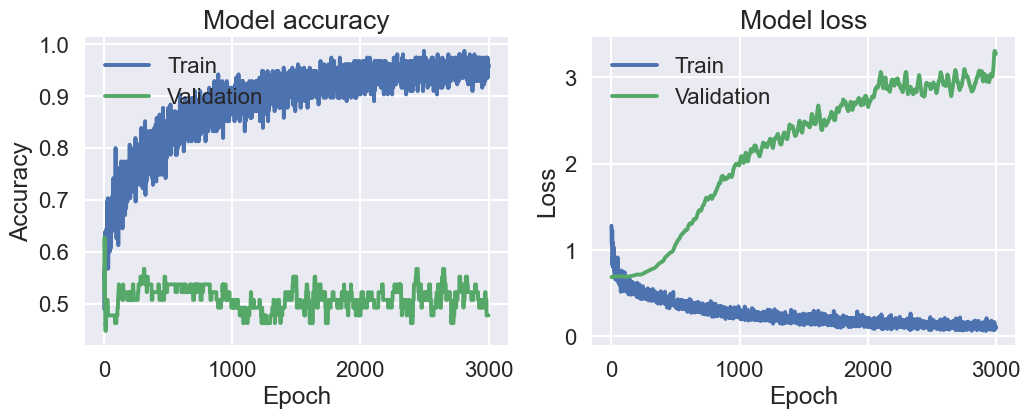

In [72]:
# Plotting training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [2]:
import joblib

In [3]:
models = {
    'Random Forest Classifier': "grid_search_rf.pkl",
    "KNeighbors Classifier": "grid_search_knn.pkl",
    "Logistic Regression": "grid_search_lr.pkl",
    "XGBoost Classifier": "grid_search_xgb.pkl",
    "Convolutional Neural Network": "cnn.h5"
}
label_encoder_gender = joblib.load('label_encoder_gender.joblib')
label_encoder_work_type = joblib.load('label_encoder_work_type.joblib')
label_encoder_ever_married = joblib.load('label_encoder_ever_married.joblib')
label_encoder_smoking_status = joblib.load('label_encoder_smoking_status.joblib')
scaler = joblib.load('scaler.joblib')

# Load models from files
loaded_models = {name: joblib.load(filename) for name, filename in models.items() if name != "Convolutional Neural Network"}


In [131]:
def conditional_max_pooling(x):
    if x.shape[1] >= 2:
        x = MaxPooling1D(pool_size=2)(x)
        x = Dropout(0.5)(x)
    return x

custom_objects = {
    'MaxPooling1D': MaxPooling1D,
    'Dropout': Dropout,
    'conditional_max_pooling': Lambda(conditional_max_pooling)
}

# Load CNN model
cnn_model = load_model("cnn.h5", custom_objects=custom_objects, compile=False, safe_mode=False)


In [129]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import load_model
from keras.layers import Conv1D, MaxPooling1D, Dropout, Lambda
import joblib

# Define new data with the correct features
new_data = [
    ['Male', 89, 1, 1, 'Yes', 'Private', 300.0, 79.0, 'never smoked'],
    ['Female', 20, 0, 0, 'No', 'Self-employed', 30.0, 5.0, 'smokes'],
    ['Male', 55, 1, 0, 'No', 'Govt_job', 130.0, 22.0, 'formerly smoked'],
    ['Female', 60, 0, 0, 'Yes', 'Private', 110.0, 19.0, 'never smoked'],
    ['Male', 20, 1, 1, 'No', 'Self-employed', 10.0, 28.0, 'smokes'],
    ['Female', 34, 0, 0, 'No', 'Govt_job', 140.0, 24.0, 'never smoked'],
    ['Male', 42, 1, 0, 'Yes', 'Private', 170.0, 26.0, 'formerly smoked'],
    ['Female', 63, 1, 1, 'Yes', 'Self-employed', 180.0, 30.0, 'smokes'],
    ['Male', 28, 0, 0, 'No', 'Private', 125.0, 21.0, 'never smoked'],
    ['Female', 47, 1, 1, 'No', 'Govt_job', 135.0, 23.0, 'smokes'],
    ['Female', 30, 0, 0, 'No', 'Private', 3.0, 1.0, 'never smoked']
]

# Convert new data to DataFrame for better readability
new_data_df = pd.DataFrame(new_data, columns=[
    'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
    'work_type', 'avg_glucose_level', 'bmi', 'smoking_status'
])

print("New Data for Prediction")
print(new_data_df)

# Convert categorical features to numerical values using LabelEncoder
label_encoders = {
    'gender': label_encoder_gender,
    'ever_married': label_encoder_ever_married,
    'work_type': label_encoder_work_type,
    'smoking_status': label_encoder_smoking_status
}

# Encode categorical features
for col, encoder in label_encoders.items():
    new_data_df[col] = encoder.transform(new_data_df[col])

# Scale numerical features
numerical_features = ['age', 'avg_glucose_level', 'bmi']
new_data_df[numerical_features] = scaler.transform(new_data_df[numerical_features])

# Convert DataFrame to numpy array
processed_df = new_data_df.to_numpy()

# Reshape data for CNN model
cnn_input = processed_df.reshape(processed_df.shape[0], processed_df.shape[1], 1)

# Load CNN model
def conditional_max_pooling(x):
    if x.shape[1] >= 2:
        x = MaxPooling1D(pool_size=2)(x)
        x = Dropout(0.5)(x)
    return x

custom_objects = {
    'MaxPooling1D': MaxPooling1D,
    'Dropout': Dropout,
    'conditional_max_pooling': Lambda(conditional_max_pooling)
}
cnn_scale = joblib.load('norm.joblib')
cnn_model = load_model("cnn.h5", custom_objects=custom_objects, compile=False)

# Apply scaling
processed_df = cnn_scale.transform(processed_df)

# Make predictions
cnn_input = processed_df.reshape(processed_df.shape[0], processed_df.shape[1], 1)
cnn_proba = cnn_model.predict(cnn_input)

print("\nPredictions and Risk Scores")
for i, proba in enumerate(cnn_proba):
    prediction = 'Presence of Stroke' if proba[0] > 0.5 else 'Absence of Stroke'
    risk_score = proba[0]
    print(f"Data point {i + 1}")
    print(f"Features:")
    print(f"Gender: {new_data[i][0]}")
    print(f"Age: {new_data[i][1]}")
    print(f"Hypertension: {new_data[i][2]}")
    print(f"Heart Disease: {new_data[i][3]}")
    print(f"Ever Married: {new_data[i][4]}")
    print(f"Work Type: {new_data[i][5]}")
    print(f"Average Glucose Level: {new_data[i][6]}")
    print(f"BMI: {new_data[i][7]}")
    print(f"Smoking Status: {new_data[i][8]}")
    print(f"Prediction: {prediction}")
    print(f"Risk Score: {risk_score:.2f}")
    print("\n" + "--" * 30 + "\n")


New Data for Prediction
    gender  age  hypertension  heart_disease ever_married      work_type  \
0     Male   89             1              1          Yes        Private   
1   Female   20             0              0           No  Self-employed   
2     Male   55             1              0           No       Govt_job   
3   Female   60             0              0          Yes        Private   
4     Male   20             1              1           No  Self-employed   
5   Female   34             0              0           No       Govt_job   
6     Male   42             1              0          Yes        Private   
7   Female   63             1              1          Yes  Self-employed   
8     Male   28             0              0           No        Private   
9   Female   47             1              1           No       Govt_job   
10  Female   30             0              0           No        Private   

    avg_glucose_level   bmi   smoking_status  
0               

In [ ]:
X = np.array(processed_df)

# Create a SHAP explainer
explainer = shap.KernelExplainer(cnn_model.predict, X)

# Compute SHAP values
shap_values = explainer.shap_values(X)

# Visualize the SHAP values
shap.summary_plot(shap_values, X, feature_names=[
    'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 
    'avg_glucose_level', 'bmi', 'smoking_status'
])

1/1 [==============================] - 0s 388ms/step


  0%|          | 0/11 [00:00<?, ?it/s]

176/176 [==============================] - 1s 5ms/step
SHAP values shape: (11, 9)
Data shape: (11, 9)


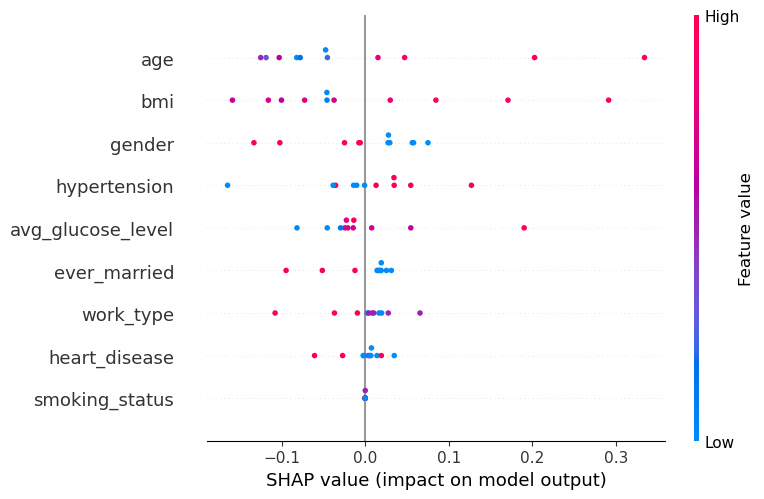

In [115]:
import numpy as np
import pandas as pd
import shap
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import load_model
import joblib

# Sample Data
new_data = [
    ['Male', 67, 1, 1, 'No', 'Private', 120.0, 20.0, 'never smoked'],
    ['Female', 20, 0, 0, 'No', 'Self-employed', 30.0, 5.0, 'smokes'],
    ['Male', 55, 1, 0, 'No', 'Govt_job', 130.0, 22.0, 'formerly smoked'],
    ['Female', 60, 0, 0, 'Yes', 'Private', 110.0, 19.0, 'never smoked'],
    ['Male', 20, 1, 1, 'No', 'Self-employed', 10.0, 28.0, 'smokes'],
    ['Female', 34, 0, 0, 'No', 'Govt_job', 140.0, 24.0, 'never smoked'],
    ['Male', 42, 1, 0, 'Yes', 'Private', 170.0, 26.0, 'formerly smoked'],
    ['Female', 63, 1, 1, 'Yes', 'Self-employed', 180.0, 30.0, 'smokes'],
    ['Male', 28, 0, 0, 'No', 'Private', 125.0, 21.0, 'never smoked'],
    ['Female', 47, 1, 1, 'No', 'Govt_job', 135.0, 23.0, 'smokes'],
    ['Female', 30, 0, 0, 'No', 'Private', 3.0, 1.0, 'never smoked']
]

# Convert to DataFrame
new_data_df = pd.DataFrame(new_data, columns=[
    'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
    'work_type', 'avg_glucose_level', 'bmi', 'smoking_status'
])

# Load encoders and scaler
label_encoder_gender = joblib.load('label_encoder_gender.joblib')
label_encoder_work_type = joblib.load('label_encoder_work_type.joblib')
label_encoder_ever_married = joblib.load('label_encoder_ever_married.joblib')
label_encoder_smoking_status = joblib.load('label_encoder_smoking_status.joblib')
scaler = joblib.load('scaler.joblib')

# Apply encoding
label_encoders = {
    'gender': label_encoder_gender,
    'ever_married': label_encoder_ever_married,
    'work_type': label_encoder_work_type,
    'smoking_status': label_encoder_smoking_status
}
for col, encoder in label_encoders.items():
    new_data_df[col] = encoder.transform(new_data_df[col])

# Scale numerical features
numerical_features = ['age', 'avg_glucose_level', 'bmi']
new_data_df[numerical_features] = scaler.transform(new_data_df[numerical_features])

# Convert DataFrame to numpy array
X = new_data_df.to_numpy()

# Load the model
cnn_model = load_model('cnn.h5')

# Define a function to predict with your model
def model_predict(data):
    return cnn_model.predict(data)

# Create SHAP explainer
background = X[:100]  # Use a sample of X for background data
explainer = shap.KernelExplainer(model_predict, background)

# Compute SHAP values
shap_values = explainer.shap_values(X)

# Handle possible output from explainer
if isinstance(shap_values, list):
    # For binary classification, we often get two sets of SHAP values
    shap_values = shap_values[1]  # Select the SHAP values for the positive class

# Reshape SHAP values to match the number of features
shap_values = np.squeeze(shap_values)  # Remove single-dimensional entries

# Check the shape of SHAP values and X
print(f"SHAP values shape: {np.shape(shap_values)}")
print(f"Data shape: {X.shape}")

# Ensure feature names match the order and number of features in X
feature_names = [
    'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
    'work_type', 'avg_glucose_level', 'bmi', 'smoking_status'
]

# Visualize SHAP values
shap.summary_plot(shap_values, X, feature_names=feature_names)


In [116]:
best_model_xgb = joblib.load('grid_search_xgb.pkl')
best_model_rf = joblib.load('grid_search_rf.pkl')
best_model_lr = joblib.load('grid_search_lr.pkl')
best_model_knn = joblib.load('grid_search_knn.pkl')

# Load preprocessing tools
scaler = joblib.load('scaler.joblib')
label_encoders = {
    'gender': joblib.load('label_encoder_gender.joblib'),
    'work_type': joblib.load('label_encoder_work_type.joblib'),
    'ever_married': joblib.load('label_encoder_ever_married.joblib'),
    'smoking_status': joblib.load('label_encoder_smoking_status.joblib')
}

In [117]:

X_train_preprocessed = X_train

In [118]:
# Prepare data for SHAP
X_res, y_res = X_train_preprocessed, y_train


In [119]:
print(f"Feature names length: {len(numerical_features + ['gender', 'work_type', 'ever_married', 'smoking_status'])}")
print(f"Feature names: {numerical_features + ['gender', 'work_type', 'ever_married', 'smoking_status']}")
print(f"SHAP values shape: {shap_values_class_0.shape}")


Feature names length: 7
Feature names: ['age', 'avg_glucose_level', 'bmi', 'gender', 'work_type', 'ever_married', 'smoking_status']
SHAP values shape: (11, 9)


In [120]:
# Define prediction function for XGBoost
def predict_xgb(data):
    return best_model_xgb.predict_proba(data)

# Define prediction function for Random Forest
def predict_rf(data):
    return best_model_rf.predict_proba(data)

# Define prediction function for Logistic Regression
def predict_lr(data):
    return best_model_lr.predict_proba(data)

# Define prediction function for KNN
def predict_knn(data):
    return best_model_knn.predict_proba(data)

# Create SHAP explainers
explainer_xgb = shap.Explainer(predict_xgb, X_res)
explainer_rf = shap.Explainer(predict_rf, X_res)
explainer_lr = shap.Explainer(predict_lr, X_res)
explainer_knn = shap.Explainer(predict_knn, X_res)

# Compute SHAP values
shap_values_xgb = explainer_xgb(X_res)
shap_values_rf = explainer_rf(X_res)
shap_values_lr = explainer_lr(X_res)
shap_values_knn = explainer_knn(X_res)


ExactExplainer explainer: 281it [00:18, 11.09it/s]                                                                     
ExactExplainer explainer: 281it [03:20,  1.33it/s]                                                                     
ExactExplainer explainer: 281it [02:55,  1.51it/s]                                                                     


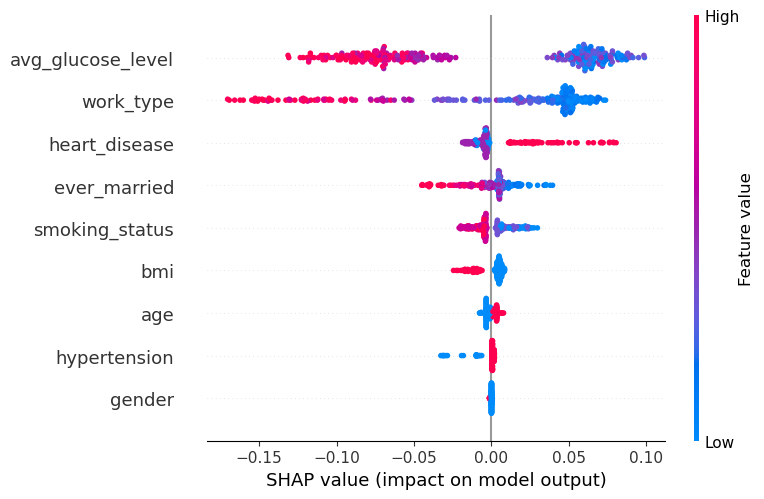

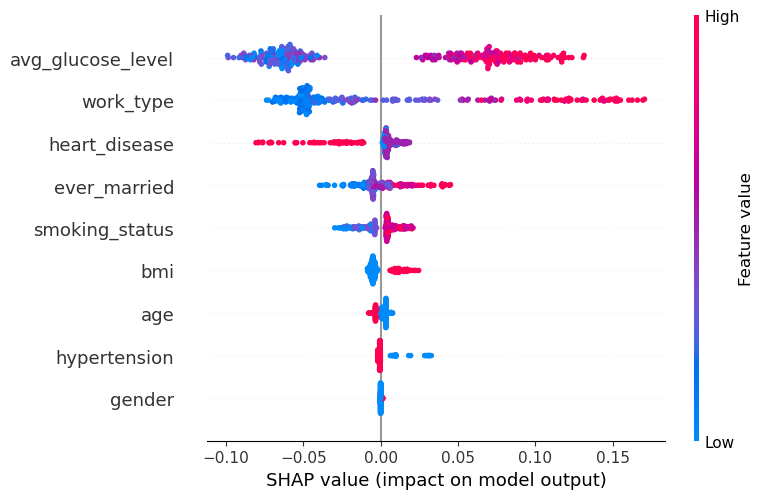

In [121]:
import shap

# Check if the SHAP values are in the correct format for plotting
if isinstance(shap_values_xgb, shap.explainers._tree.TreeExplainer):
    shap_values_xgb = shap_values_xgb(X_res)

# Extract SHAP values for each class
shap_values_class_0 = shap_values_xgb.values[:, :, 0]  # SHAP values for class 0
shap_values_class_1 = shap_values_xgb.values[:, :, 1]  # SHAP values for class 1

# Visualize SHAP values for each class
shap.summary_plot(shap_values_class_0, X_res, feature_names=numerical_features + ['gender','hypertension', 'heart_disease','work_type', 'ever_married', 'smoking_status'], title='SHAP Summary Plot for Class 0')
shap.summary_plot(shap_values_class_1, X_res, feature_names=numerical_features + ['gender','hypertension', 'heart_disease', 'work_type', 'ever_married', 'smoking_status'], title='SHAP Summary Plot for Class 1')


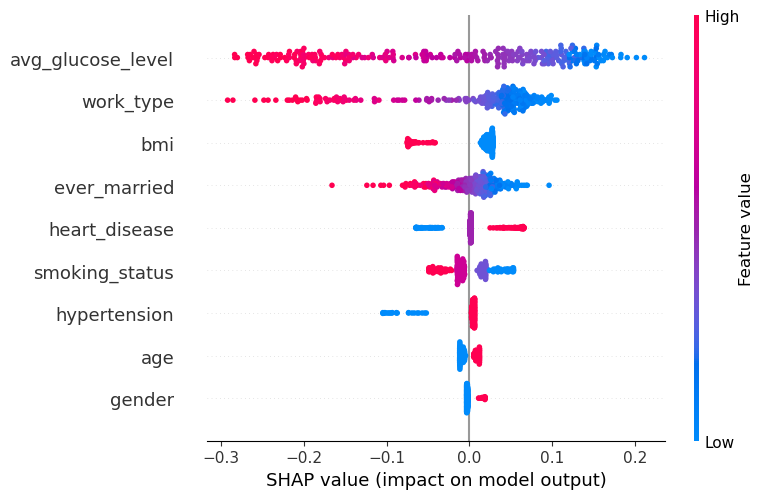

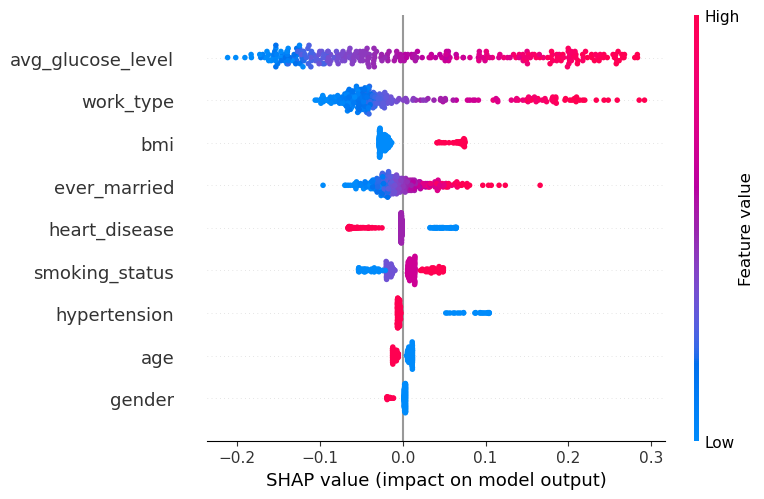

In [124]:
import shap

# Check if the SHAP values are in the correct format for plotting
if isinstance(shap_values_lr, shap.explainers._tree.TreeExplainer):
    shap_values_lr = shap_values_lr(X_res)

# Extract SHAP values for each class
shap_values_class_0 = shap_values_lr.values[:, :, 0]  # SHAP values for class 0
shap_values_class_1 = shap_values_lr.values[:, :, 1]  # SHAP values for class 1

# Visualize SHAP values for each class
shap.summary_plot(shap_values_class_0, X_res, feature_names=numerical_features + ['gender','hypertension', 'heart_disease','work_type', 'ever_married', 'smoking_status'], title='SHAP Summary Plot for Class 0')
shap.summary_plot(shap_values_class_1, X_res, feature_names=numerical_features + ['gender','hypertension', 'heart_disease', 'work_type', 'ever_married', 'smoking_status'], title='SHAP Summary Plot for Class 1')


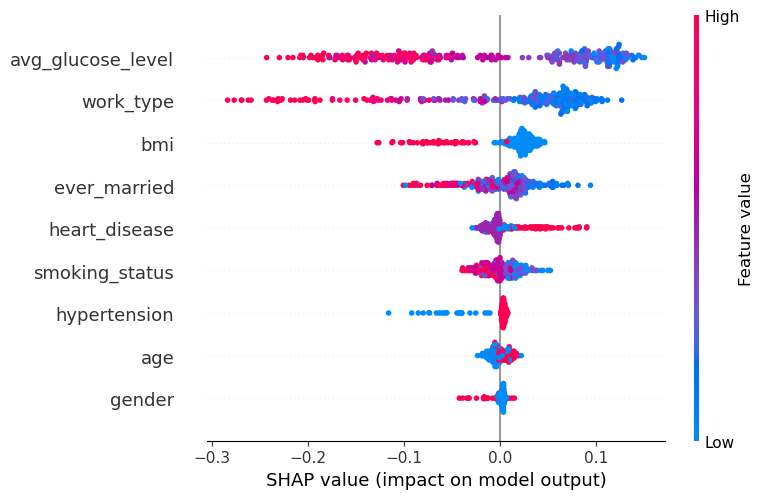

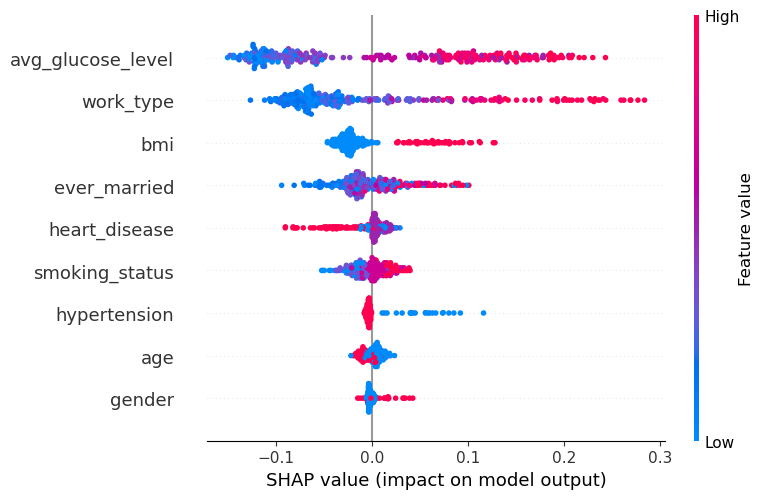

In [125]:
import shap

# Check if the SHAP values are in the correct format for plotting
if isinstance(shap_values_rf, shap.explainers._tree.TreeExplainer):
    shap_values_rf = shap_values_rf(X_res)

# Extract SHAP values for each class
shap_values_class_0 = shap_values_rf.values[:, :, 0]  # SHAP values for class 0
shap_values_class_1 = shap_values_rf.values[:, :, 1]  # SHAP values for class 1

# Visualize SHAP values for each class
shap.summary_plot(shap_values_class_0, X_res, feature_names=numerical_features + ['gender','hypertension', 'heart_disease','work_type', 'ever_married', 'smoking_status'], title='SHAP Summary Plot for Class 0')
shap.summary_plot(shap_values_class_1, X_res, feature_names=numerical_features + ['gender','hypertension', 'heart_disease', 'work_type', 'ever_married', 'smoking_status'], title='SHAP Summary Plot for Class 1')


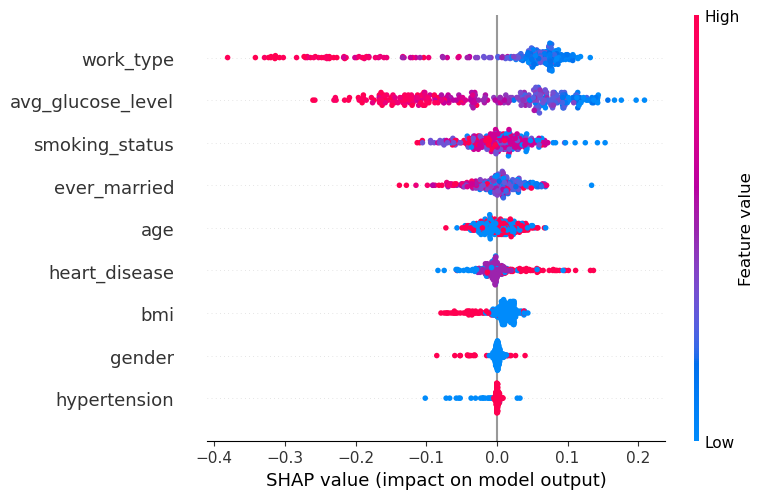

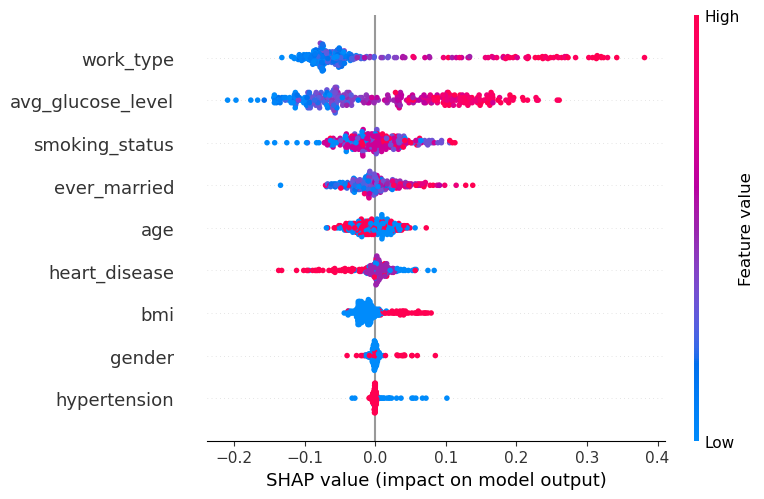

In [126]:
import shap

# Check if the SHAP values are in the correct format for plotting
if isinstance(shap_values_knn, shap.explainers._tree.TreeExplainer):
    shap_values_knn = shap_values_knn(X_res)

# Extract SHAP values for each class
shap_values_class_0 = shap_values_knn.values[:, :, 0]  # SHAP values for class 0
shap_values_class_1 = shap_values_knn.values[:, :, 1]  # SHAP values for class 1

# Visualize SHAP values for each class
shap.summary_plot(shap_values_class_0, X_res, feature_names=numerical_features + ['gender','hypertension', 'heart_disease','work_type', 'ever_married', 'smoking_status'], title='SHAP Summary Plot for Class 0')
shap.summary_plot(shap_values_class_1, X_res, feature_names=numerical_features + ['gender','hypertension', 'heart_disease', 'work_type', 'ever_married', 'smoking_status'], title='SHAP Summary Plot for Class 1')
